In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv('/Users/suxuanrong/Desktop/关于横市啊/GCI/I社/data.csv')

In [3]:
df.head()

Age Attrition BusinessTravel  DailyAchievement              Department  \
0   25        No  Travel_Rarely              1280  Research & Development   
1   27        No  Travel_Rarely              1167  Research & Development   
2   25       Yes  Travel_Rarely               240                   Sales   
3   28        No  Travel_Rarely               440  Research & Development   
4   28       Yes  Travel_Rarely               529  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 7          1        Medical              1             143   
1                 4          2  Life Sciences              1            1259   
2                 5          3      Marketing              1             142   
3                21          3        Medical              1             221   
4                 2          4  Life Sciences              1             364   

   ...  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0  ...                  2                     2                3   
1  ...                  5                     2                3   
2  ...                  6                     1                3   
3  ...                  5                     2                1   
4  ...                  5                     5                1   

   YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
0               2                   2                       2   
1               5                   3                       0   
2               6                   4                       0   
3               5                   2                       0   
4               0                   0                       0   

   YearsWithCurrManager               HowToEmploy  Incentive  RemoteWork  
0                     1                    intern          0           4  
1                     3                    intern          0           1  
2                     3                   agent_A          0           2  
3                     2  New_graduate_recruitment          0           5  
4                     0  New_graduate_recruitment          0           1  

[5 rows x 38 columns]

In [4]:
df.isnull().sum().sum()

0

In [10]:
df.shape

(1470, 38)

# EDA

In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyAchievement', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyAchievement', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyAchievement', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'HowToEmploy', 'Incentive', 'RemoteWork'],
      dtype='object')

In [12]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyAchievement             int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyAchievement            int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyAchievement           int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
# dfがDataFrameの変数であると仮定しています
table_result = pd.DataFrame(df.dtypes.value_counts()).reset_index()
table_result.columns = ['DataType', 'Count']
print(table_result)

  DataType  Count
0    int64     28
1   object     10


## object

In [6]:
df_object = df.select_dtypes(include='object')

In [7]:
df_object.head()

Attrition BusinessTravel              Department EducationField Gender  \
0        No  Travel_Rarely  Research & Development        Medical   Male   
1        No  Travel_Rarely  Research & Development  Life Sciences   Male   
2       Yes  Travel_Rarely                   Sales      Marketing   Male   
3        No  Travel_Rarely  Research & Development        Medical   Male   
4       Yes  Travel_Rarely  Research & Development  Life Sciences   Male   

                 JobRole MaritalStatus Over18 OverTime  \
0     Research Scientist       Married      Y       No   
1     Research Scientist      Divorced      Y       No   
2        Sales Executive        Single      Y      Yes   
3     Research Scientist       Married      Y       No   
4  Laboratory Technician        Single      Y       No   

                HowToEmploy  
0                    intern  
1                    intern  
2                   agent_A  
3  New_graduate_recruitment  
4  New_graduate_recruitment

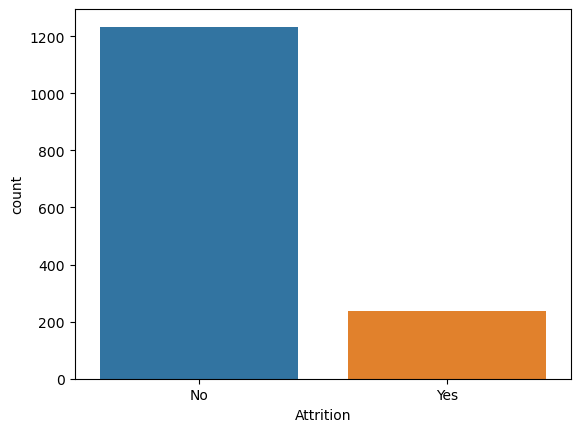

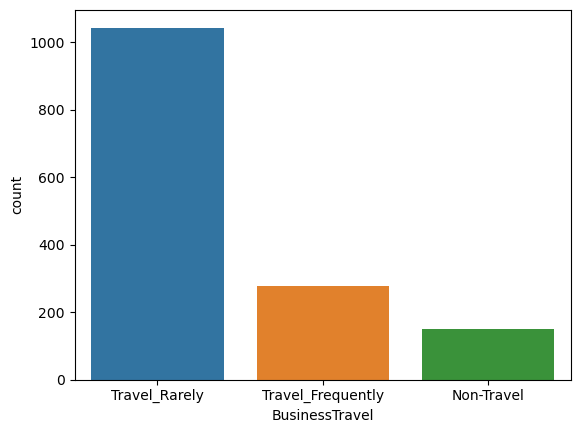

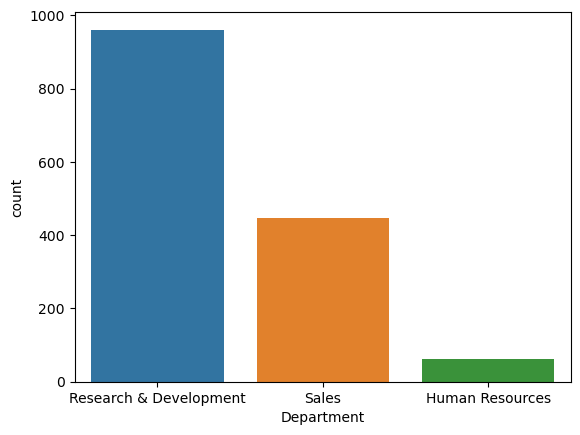

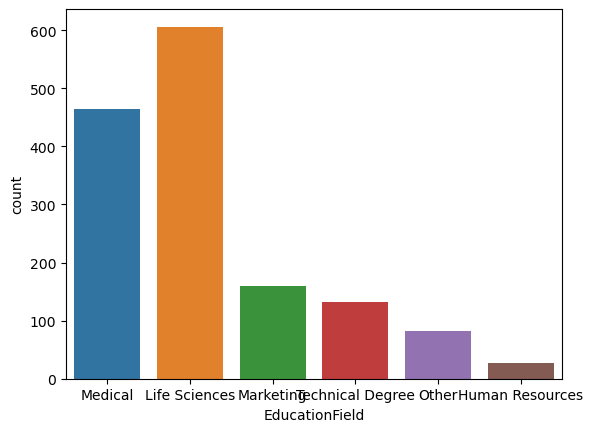

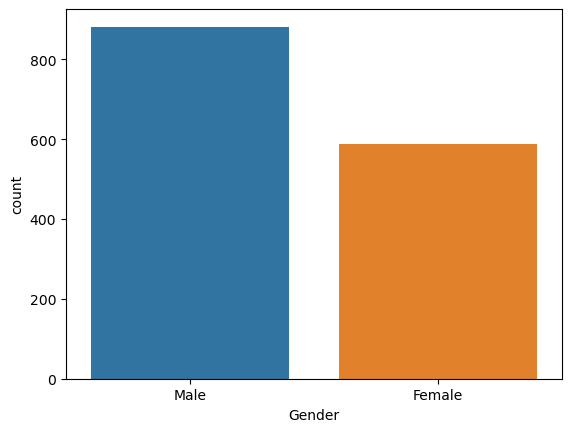

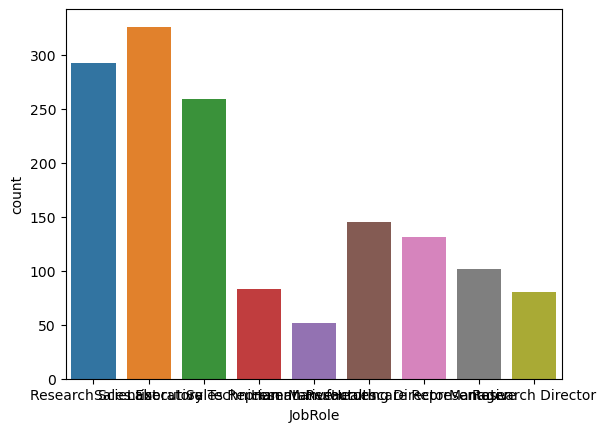

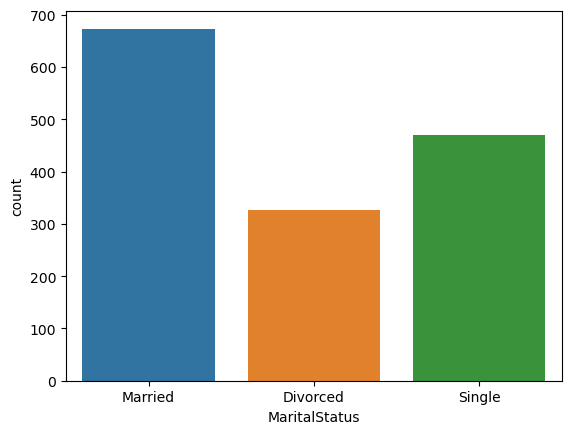

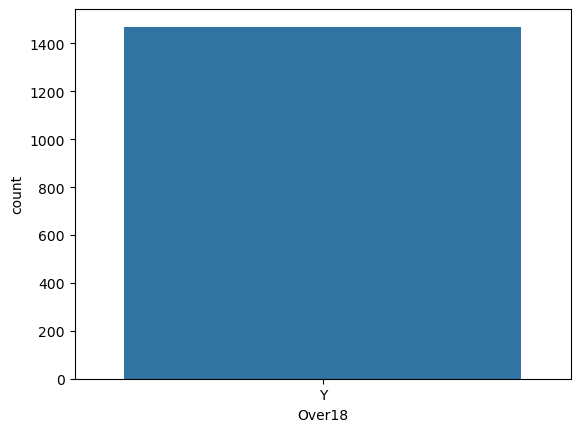

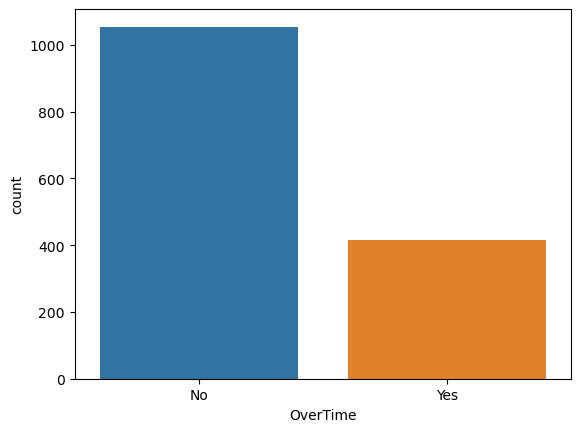

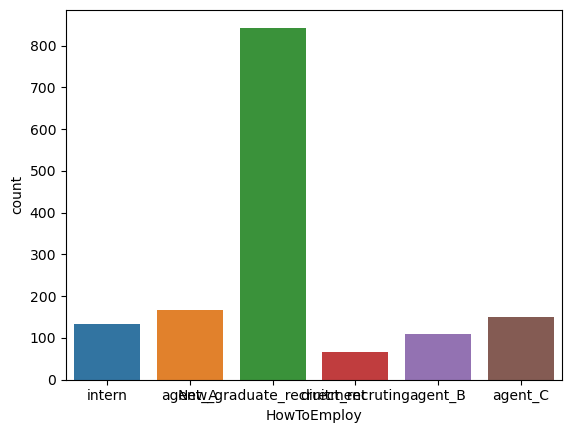

In [8]:
for i in df_object.columns:
    sns.countplot(data = df_object, x = i)
    plt.show()

In [9]:
df_object.groupby('EducationField').count().index.to_list()

['Human Resources',
 'Life Sciences',
 'Marketing',
 'Medical',
 'Other',
 'Technical Degree']

In [10]:
df_object.groupby('JobRole').count().index.to_list()

['Healthcare Representative',
 'Human Resources',
 'Laboratory Technician',
 'Manager',
 'Manufacturing Director',
 'Research Director',
 'Research Scientist',
 'Sales Executive',
 'Sales Representative']

In [11]:
df_object.groupby('HowToEmploy').count().index.to_list()

['New_graduate_recruitment',
 'agent_A',
 'agent_B',
 'agent_C',
 'direct_recruting',
 'intern']

In [12]:
print(237/(1233+237))
df_object['Attrition'].value_counts()

0.16122448979591836


No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:
print(588/(882+588))
df_object['Gender'].value_counts()

0.4


Male      882
Female    588
Name: Gender, dtype: int64

In [14]:
df_object['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [15]:
print(416/(1054+416))
df_object['OverTime'].value_counts()

0.2829931972789116


No     1054
Yes     416
Name: OverTime, dtype: int64

In [16]:
df_object['HowToEmploy'].value_counts()

New_graduate_recruitment    843
agent_A                     167
agent_C                     151
intern                      133
agent_B                     109
direct_recruting             67
Name: HowToEmploy, dtype: int64

In [17]:
df_object['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

## int

In [18]:
df_int= df.select_dtypes(include='int64')

In [19]:
df_int.columns

Index(['Age', 'DailyAchievement', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyAchievement', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyAchievement', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Incentive', 'RemoteWork'],
      dtype='object')

In [20]:
print(df_int.head())

   Age  DailyAchievement  DistanceFromHome  Education  EmployeeCount  \
0   25              1280                 7          1              1   
1   27              1167                 4          2              1   
2   25               240                 5          3              1   
3   28               440                21          3              1   
4   28               529                 2          4              1   

   EmployeeNumber  EnvironmentSatisfaction  HourlyAchievement  JobInvolvement  \
0             143                        4                 64               2   
1            1259                        1                 76               3   
2             142                        3                 46               2   
3             221                        3                 42               3   
4             364                        1                 79               3   

   JobLevel  ...  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \


### a: カテゴリ

11


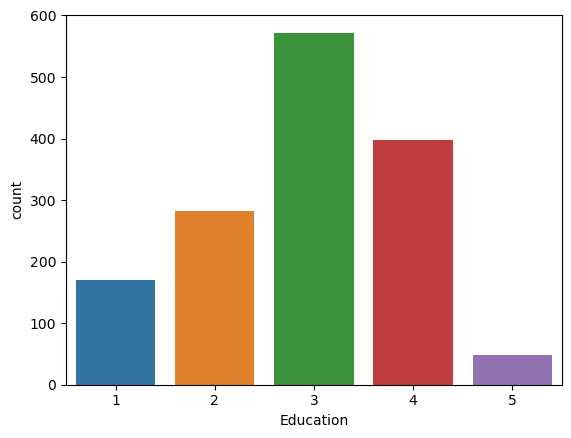

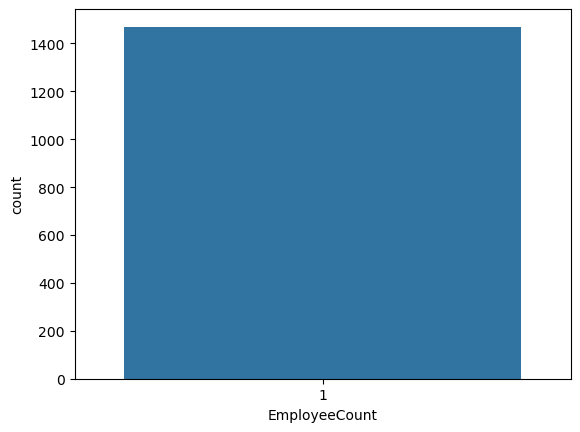

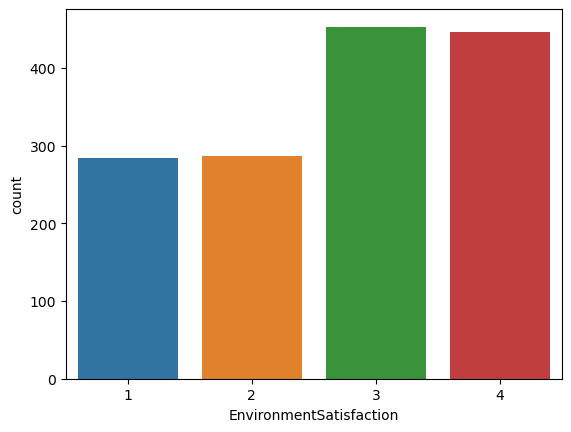

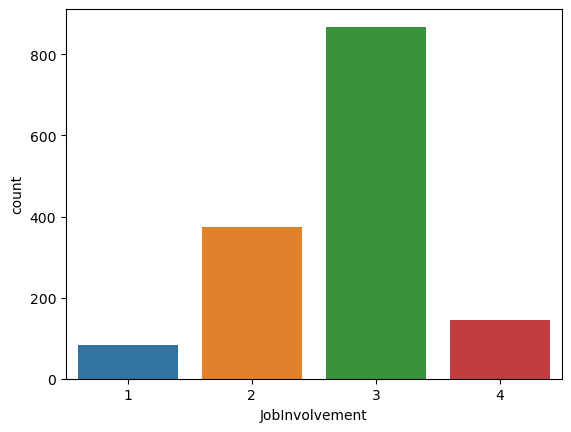

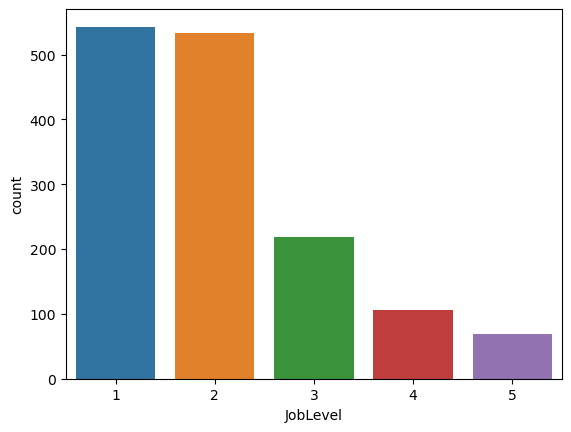

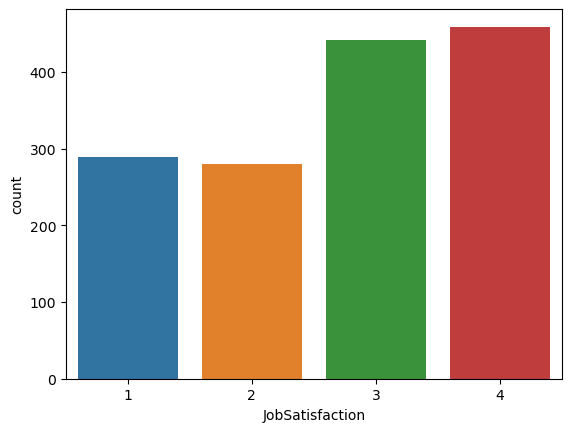

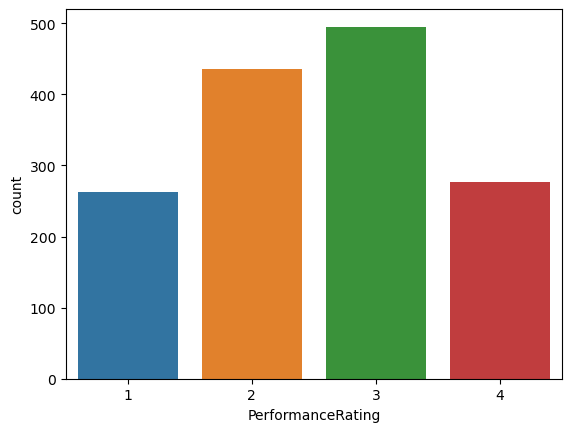

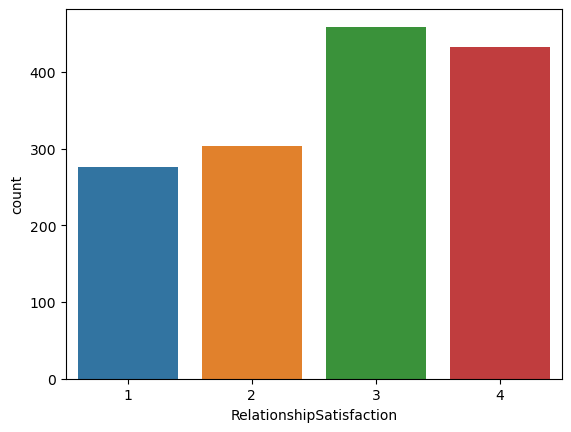

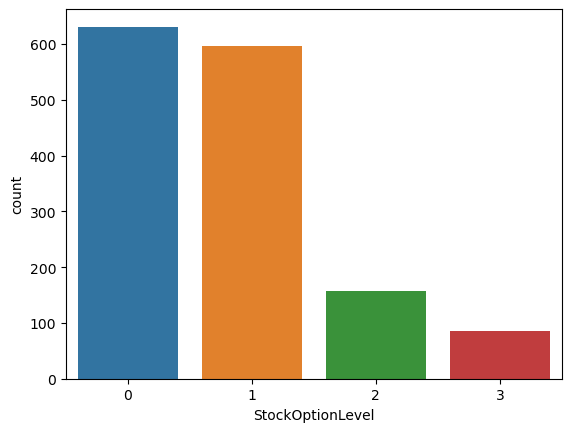

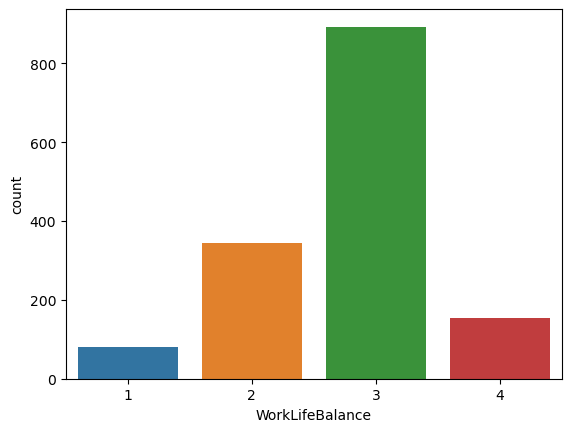

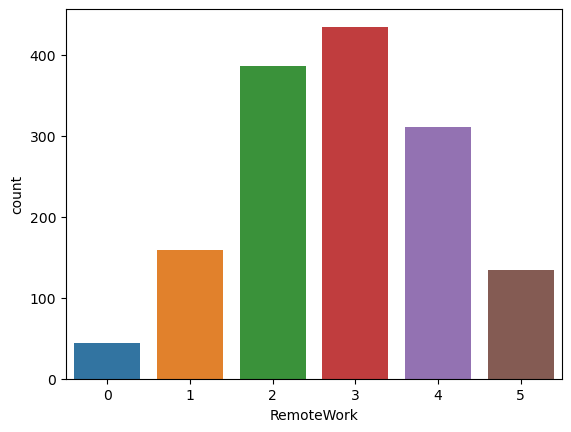

In [21]:
a = ['Education', 'EmployeeCount', 'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
     'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance','RemoteWork']
print(len(a))
for i in range(len(a)):
    sns.countplot(data = df_int, x = a[i])
    plt.show()

In [22]:
df_int['Incentive'].describe()

count    1470.000000
mean     1183.386395
std      1429.687536
min         0.000000
25%         0.000000
50%       727.500000
75%      1817.000000
max      8584.000000
Name: Incentive, dtype: float64

### b:連続

In [23]:
int_column = list(df_int.columns.values)
print(int_column)
print(a)

['Age', 'DailyAchievement', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyAchievement', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyAchievement', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Incentive', 'RemoteWork']
['Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'RemoteWork']


In [24]:
b = [item for item in int_column if item not in a]
print(b)
print(len(b))

['Age', 'DailyAchievement', 'DistanceFromHome', 'EmployeeNumber', 'HourlyAchievement', 'MonthlyIncome', 'MonthlyAchievement', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Incentive']
17


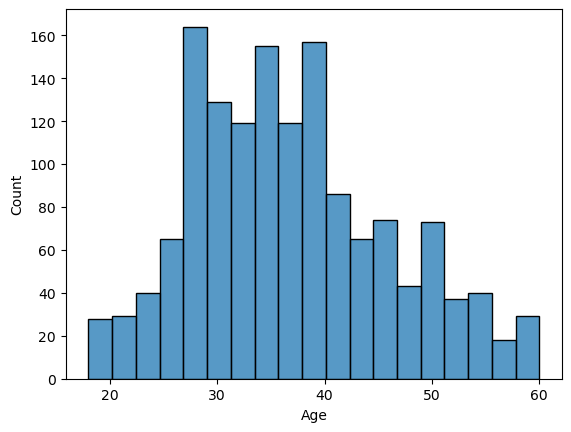

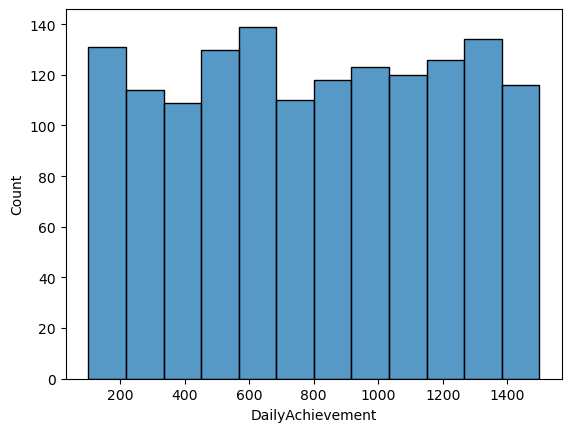

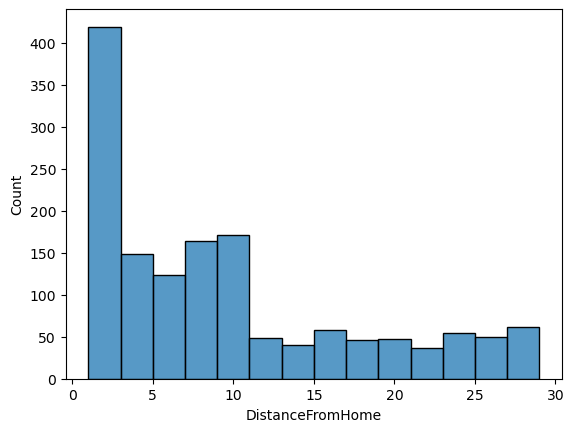

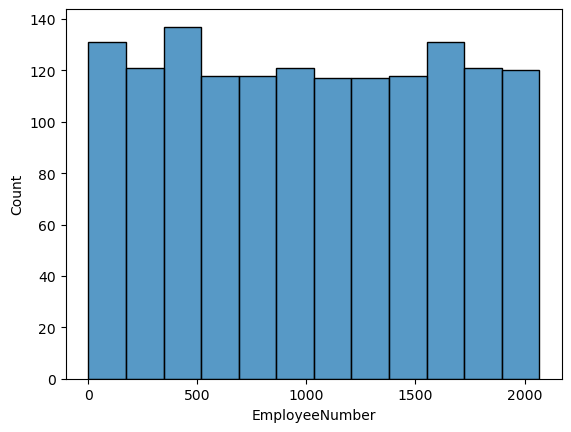

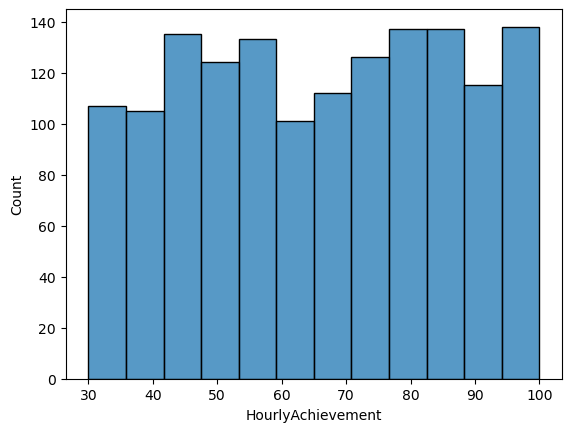

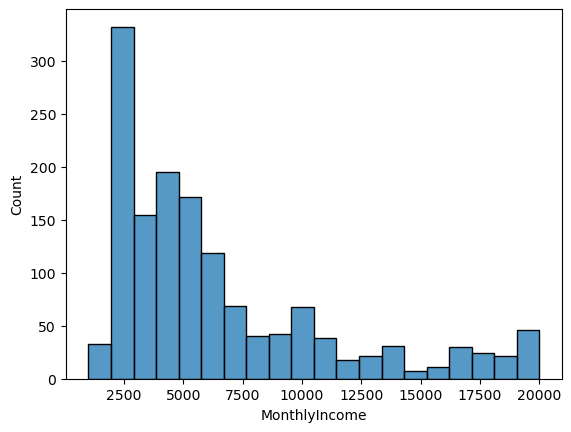

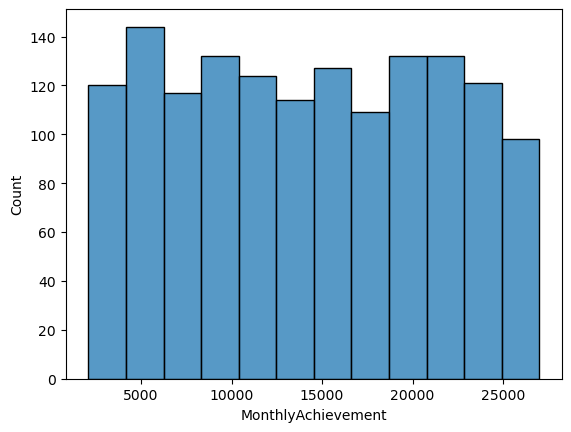

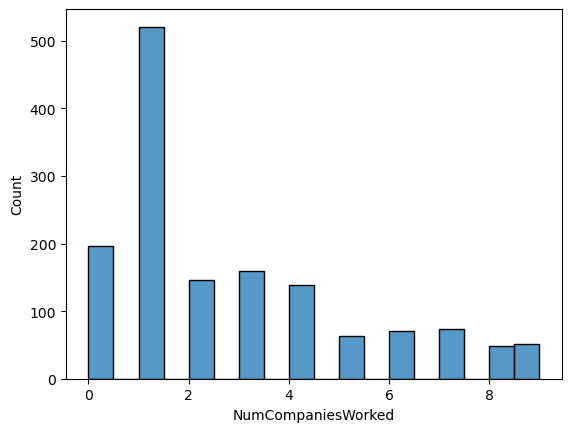

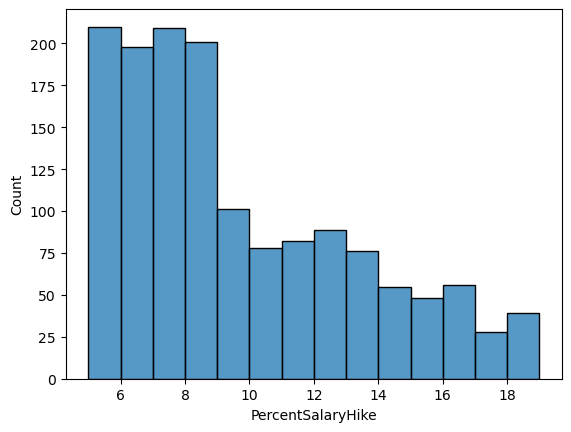

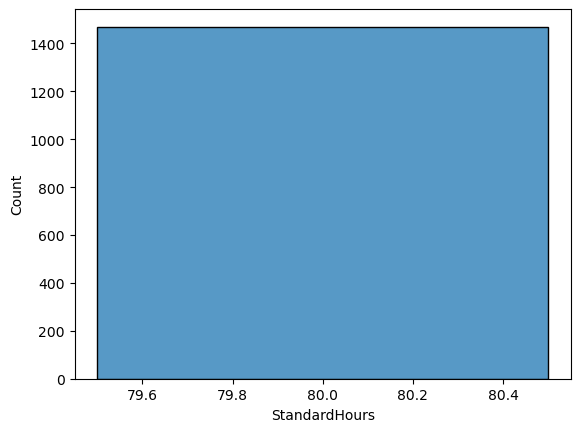

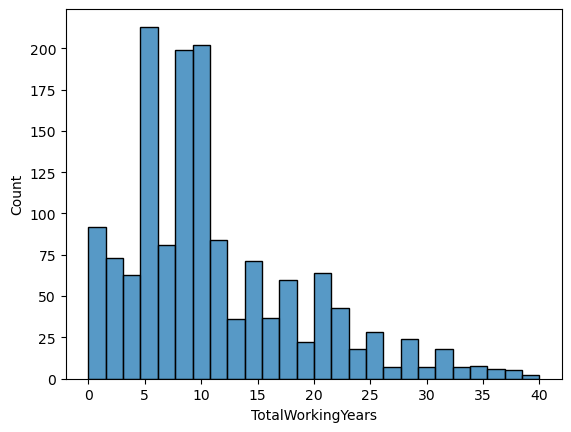

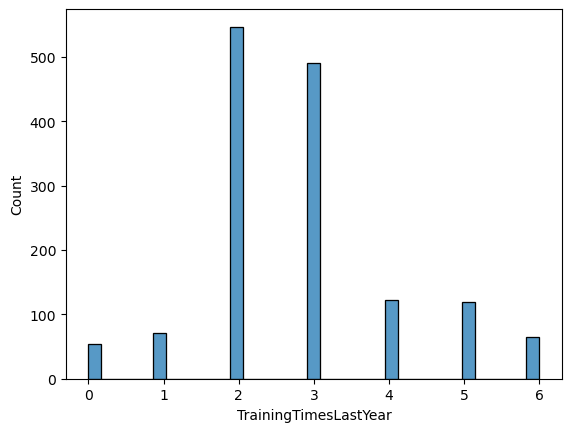

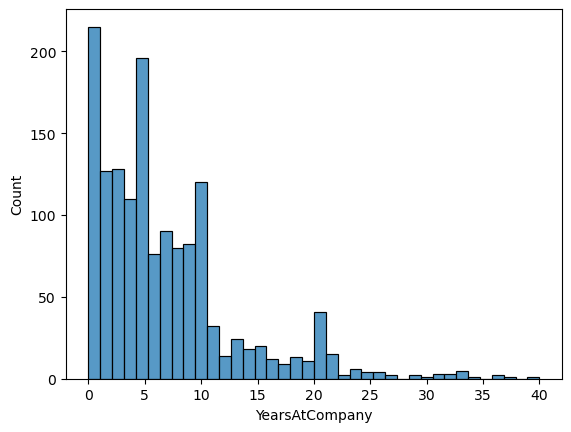

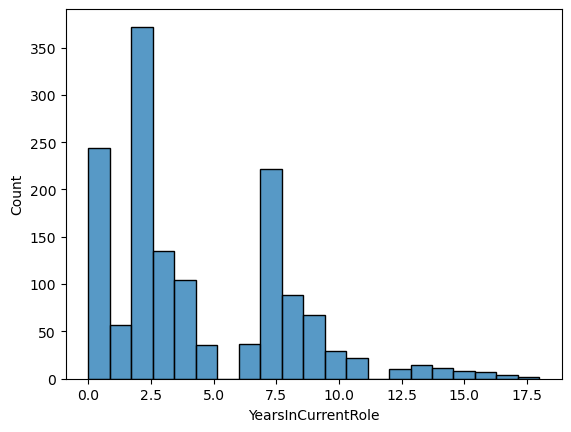

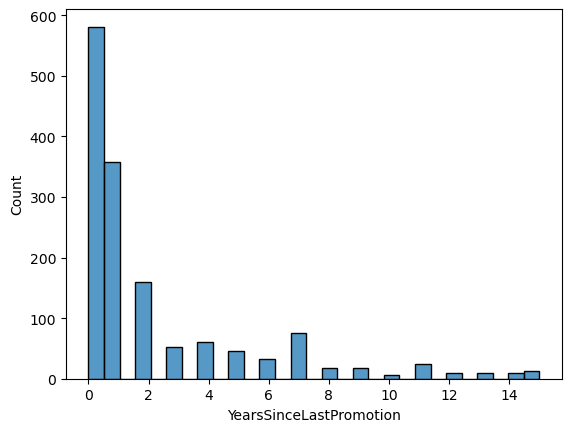

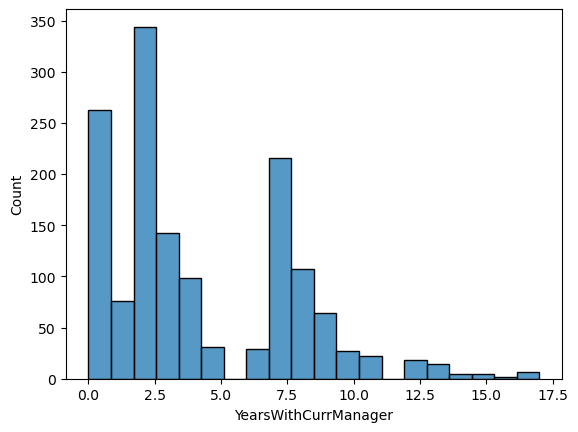

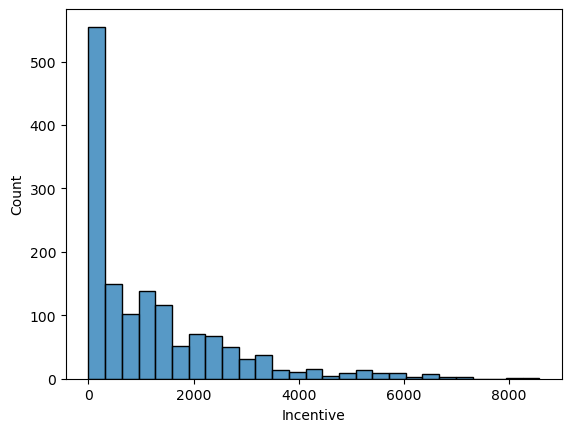

In [25]:
for i in range(len(b)):
    sns.histplot(data = df_int, x = b[i])
    plt.show()

In [26]:
# 三つのカラムの統計情報を取得
describe_achievement = df_int[['DailyAchievement', 'HourlyAchievement', 'MonthlyAchievement']].describe()

# describeの結果を表示
print(describe_achievement)


       DailyAchievement  HourlyAchievement  MonthlyAchievement
count       1470.000000        1470.000000         1470.000000
mean         802.485714          65.891156        14313.103401
std          403.509100          20.329428         7117.786044
min          102.000000          30.000000         2094.000000
25%          465.000000          48.000000         8047.000000
50%          802.000000          66.000000        14235.500000
75%         1157.000000          83.750000        20461.500000
max         1499.000000         100.000000        26999.000000


In [27]:
describe_unknowns = df_int[['EmployeeNumber','StandardHours']].describe()
print(describe_unknowns)

       EmployeeNumber  StandardHours
count     1470.000000         1470.0
mean      1024.865306           80.0
std        602.024335            0.0
min          1.000000           80.0
25%        491.250000           80.0
50%       1020.500000           80.0
75%       1555.750000           80.0
max       2068.000000           80.0


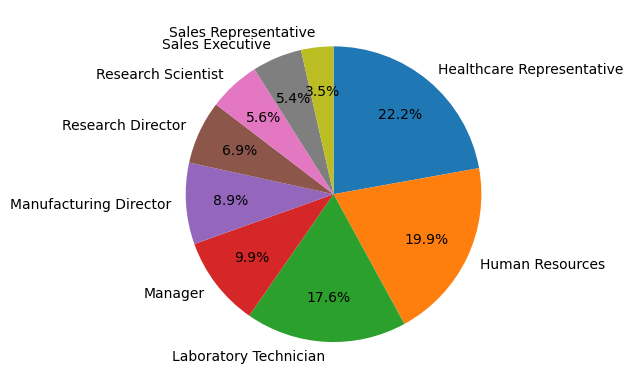

In [28]:
label = df.groupby('JobRole').count().index.to_list()
 
plt.pie(df['JobRole'].value_counts(),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
 
plt.show()

In [29]:
print(df['JobRole'].value_counts())


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


In [30]:

label = df.groupby('JobRole').count().index.to_list()
label_j = ['']
 
plt.pie(yes_df['JobRole'].value_counts(),
        counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=1.5)
plt.rcParams['font.size'] = 9

plt.legend(label, fontsize=12,
                 bbox_to_anchor=(0.9, 0.7)) 
plt.show()

NameError: name 'yes_df' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(plot_dataset)):
    ax.bar(plot_dataset.columns, 
           plot_dataset.iloc[i], 
           bottom=plot_dataset.iloc[:i].sum()
          )
    for j in range(len(plot_dataset.columns)):
        plt.text(x=j, 
                 y=plot_dataset.iloc[:i, j].sum()+(plot_dataset.iloc[i, j]/2), 
                 s=f'{plot_dataset.iloc[i, j]}%', 
                 ha='center', 
                 va='bottom'
                )
ax.set(xlabel='支店名', ylabel='売り上げ')
ax.legend(plot_dataset.index)
plt.show()

In [ ]:
print( yes_df['JobRole'].value_counts())


In [31]:
per = yes_df['JobRole'].value_counts()/df['JobRole'].value_counts()
print(per.sort_values())


NameError: name 'yes_df' is not defined

In [32]:
sales_df['JobRole'].value_counts()

NameError: name 'sales_df' is not defined

In [33]:
sales_df[sales_df['JobRole']=='Sales Representative' ]['Age'].mean()

NameError: name 'sales_df' is not defined

In [34]:
sales_df[sales_df['JobRole']=='Sales Representative' ][sales_df['Attrition']=='Yes']['Age'].mean()

NameError: name 'sales_df' is not defined

In [35]:
sales_df[sales_df['JobRole']=='Sales Representative' ][sales_df['Attrition']=='No']['Age'].mean()

NameError: name 'sales_df' is not defined

In [36]:
rd_df['JobRole'].value_counts()

NameError: name 'rd_df' is not defined

In [ ]:
rd_df[rd_df['JobRole']=='Laboratory Technician']['Age'].mean()

In [ ]:
rd_df[rd_df['JobRole']=='Laboratory Technician'][rd_df['Attrition']=='Yes']['Age'].mean()

In [ ]:
rd_df[rd_df['JobRole']=='Laboratory Technician'][rd_df['Attrition']=='No']['Age'].mean()

In [ ]:
hr_df['JobRole'].value_counts()

In [ ]:
hr_df[hr_df['JobRole']=='Human Resources']['Age'].mean()

In [ ]:
hr_df[hr_df['JobRole']=='Human Resources'][hr_df['Attrition']=='Yes']['Age'].mean()

In [ ]:
hr_df[hr_df['JobRole']=='Human Resources'][hr_df['Attrition']=='No']['Age'].mean()

In [ ]:
plt.pie(no_df['JobRole'].value_counts(),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
plt.show()

In [ ]:
print( no_df['JobRole'].value_counts())

## クロス集計

In [37]:
# Attrition & Gender
gender_cross = pd.crosstab(df["Attrition"], df["Gender"])
print(gender_cross)
import scipy as sp
import scipy.stats

x2, p, dof, expected = sp.stats.chi2_contingency(gender_cross)

print("カイ二乗値は %(x2)s" %locals() )
print("確率は %(p)s" %locals() )
print("自由度は %(dof)s" %locals() )
print( expected )

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

Gender     Female  Male
Attrition              
No            501   732
Yes            87   150
カイ二乗値は 1.1169671241970975
確率は 0.29057244902890855
自由度は 1
[[493.2 739.8]
 [ 94.8 142.2]]
有意な差がありません


In [38]:
# Attrition & Department
department_cross = pd.crosstab(df["Attrition"], df["Department"])
print(department_cross)
x2, p, dof, expected = sp.stats.chi2_contingency(department_cross)

print("カイ二乗値は %(x2)s" %locals() )
print("確率は %(p)s" %locals() )
print("自由度は %(dof)s" %locals() )
print( expected )

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                       51                     828    354
Yes                      12                     133     92
カイ二乗値は 10.79600732241067
確率は 0.004525606574479633
自由度は 2
[[ 52.84285714 806.06326531 374.09387755]
 [ 10.15714286 154.93673469  71.90612245]]
有意な差があります


In [39]:
print(12/(51+12), 133/(828+133), 92/(354+92),4)

0.19047619047619047 0.1383975026014568 0.2062780269058296 4


In [40]:
# Attrition & BusinessTravel
travle_cross = pd.crosstab(df["Attrition"], df["BusinessTravel"])
print(travle_cross)
x2, p, dof, expected = sp.stats.chi2_contingency(travle_cross)

print("カイ二乗値は %(x2)s" %locals() )
print("確率は %(p)s" %locals() )
print("自由度は %(dof)s" %locals() )
print( expected )

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                     138                208            887
Yes                     12                 69            156
カイ二乗値は 24.182413685655174
確率は 5.608614476449931e-06
自由度は 2
[[125.81632653 232.34081633 874.84285714]
 [ 24.18367347  44.65918367 168.15714286]]
有意な差があります


In [41]:
# Attrition &  EducationField
field_cross = pd.crosstab(df["Attrition"], df["EducationField"])
print(field_cross)
x2, p, dof, expected = sp.stats.chi2_contingency(field_cross)

print("カイ二乗値は %(x2)s" %locals() )
print("確率は %(p)s" %locals() )
print("自由度は %(dof)s" %locals() )
print( expected )

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
No                           20            517        124      401     71   
Yes                           7             89         35       63     11   

EducationField  Technical Degree  
Attrition                         
No                           100  
Yes                           32  
カイ二乗値は 16.024674119585423
確率は 0.006773980139025222
自由度は 5
[[ 22.64693878 508.29795918 133.36530612 389.19183673  68.77959184
  110.71836735]
 [  4.35306122  97.70204082  25.63469388  74.80816327  13.22040816
   21.28163265]]
有意な差があります


In [61]:
# JobRole & Attrition
department_jobrole_cross = pd.crosstab(df["JobRole"], df["Attrition"])
print(department_jobrole_cross)
x2, p, dof, expected = sp.stats.chi2_contingency(department_jobrole_cross)

print("カイ二乗値は %(x2)s" %locals() )
print("確率は %(p)s" %locals() )
print("自由度は %(dof)s" %locals() )
print( expected )

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33
カイ二乗値は 86.19025367670434
確率は 2.752481638050657e-15
自由度は 8
[[109.87959184  21.12040816]
 [ 43.61632653   8.38367347]
 [217.24285714  41.75714286]
 [ 85.55510204  16.44489796]
 [121.62244898  23.37755102]
 [ 67.10204082  12.89795918]
 [244.92244898  47.07755102]
 [273.44081633  52.55918367]
 [ 69.61836735  13.38163265]]
有意な差があります


In [64]:
# Joblevel& Attrition
department_jobrole_cross = pd.crosstab(df["JobLevel"], df["Attrition"])
print(department_jobrole_cross)
x2, p, dof, expected = sp.stats.chi2_contingency(department_jobrole_cross)

print("カイ二乗値は %(x2)s" %locals() )
print("確率は %(p)s" %locals() )
print("自由度は %(dof)s" %locals() )
print( expected )

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

Attrition   No  Yes
JobLevel           
1          400  143
2          482   52
3          186   32
4          101    5
5           64    5
カイ二乗値は 72.5290131066739
確率は 6.634684715458957e-15
自由度は 4
[[455.45510204  87.54489796]
 [447.90612245  86.09387755]
 [182.85306122  35.14693878]
 [ 88.91020408  17.08979592]
 [ 57.8755102   11.1244898 ]]
有意な差があります


In [42]:
# Department  &  EducationField
department_field_cross = pd.crosstab(df["Department"], df["EducationField"])
print(department_field_cross )
x2, p, dof, expected = sp.stats.chi2_contingency(department_field_cross )

print("カイ二乗値は %(x2)s" %locals() )
print("確率は %(p)s" %locals() )
print("自由度は %(dof)s" %locals() )
print( expected )

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

EducationField          Human Resources  Life Sciences  Marketing  Medical  \
Department                                                                   
Human Resources                      27             16          0       13   
Research & Development                0            440          0      363   
Sales                                 0            150        159       88   

EducationField          Other  Technical Degree  
Department                                       
Human Resources             3                 4  
Research & Development     64                94  
Sales                      15                34  
カイ二乗値は 1024.979247330766
確率は 7.771587911206295e-214
自由度は 10
[[  1.15714286  25.97142857   6.81428571  19.88571429   3.51428571
    5.65714286]
 [ 17.65102041 396.16734694 103.94489796 303.33605442  53.60680272
   86.29387755]
 [  8.19183673 183.86122449  48.24081633 140.77823129  24.87891156
   40.04897959]]
有意な差があります


In [43]:
# JobRole & Department
department_jobrole_cross = pd.crosstab(df["Department"], df["JobRole"])
print(department_jobrole_cross)
x2, p, dof, expected = sp.stats.chi2_contingency(department_jobrole_cross)

print("カイ二乗値は %(x2)s" %locals() )
print("確率は %(p)s" %locals() )
print("自由度は %(dof)s" %locals() )
print( expected )

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

JobRole                 Healthcare Representative  Human Resources  \
Department                                                           
Human Resources                                 0               52   
Research & Development                        131                0   
Sales                                           0                0   

JobRole                 Laboratory Technician  Manager  \
Department                                               
Human Resources                             0       11   
Research & Development                    259       54   
Sales                                       0       37   

JobRole                 Manufacturing Director  Research Director  \
Department                                                          
Human Resources                              0                  0   
Research & Development                     145                 80   
Sales                                        0                  0   

JobRole     

In [44]:
# JobRole & EF
field_jobrole_cross = pd.crosstab(df["EducationField"], df["JobRole"])
print(field_jobrole_cross )
x2, p, dof, expected = sp.stats.chi2_contingency(field_jobrole_cross )

print("カイ二乗値は %(x2)s" %locals() )
print("確率は %(p)s" %locals() )
print("自由度は %(dof)s" %locals() )
print( expected )

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

JobRole           Healthcare Representative  Human Resources  \
EducationField                                                 
Human Resources                           0               21   
Life Sciences                            60               13   
Marketing                                 0                0   
Medical                                  48               11   
Other                                     9                3   
Technical Degree                         14                4   

JobRole           Laboratory Technician  Manager  Manufacturing Director  \
EducationField                                                             
Human Resources                       0        6                       0   
Life Sciences                       119       40                      71   
Marketing                             0       14                       0   
Medical                              99       32                      53   
Other                          

In [45]:
# Attrition &  OverTime
overtime_cross = pd.crosstab(df["Attrition"], df["OverTime"])
print(overtime_cross)
x2, p, dof, expected = sp.stats.chi2_contingency(overtime_cross)

print("カイ二乗値は %(x2)s" %locals() )
print("確率は %(p)s" %locals() )
print("自由度は %(dof)s" %locals() )
print( expected )

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

OverTime    No  Yes
Attrition          
No         944  289
Yes        110  127
カイ二乗値は 87.56429365828768
確率は 8.15842372153832e-21
自由度は 1
[[884.06938776 348.93061224]
 [169.93061224  67.06938776]]
有意な差があります


In [46]:
# Attrition &  HowToEmploy
howto_cross = pd.crosstab(df["Attrition"], df["HowToEmploy"])
print(howto_cross)
x2, p, dof, expected = sp.stats.chi2_contingency(howto_cross )

print("カイ二乗値は %(x2)s" %locals() )
print("確率は %(p)s" %locals() )
print("自由度は %(dof)s" %locals() )
print( expected )

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

HowToEmploy  New_graduate_recruitment  agent_A  agent_B  agent_C  \
Attrition                                                          
No                                721      141       92      112   
Yes                               122       26       17       39   

HowToEmploy  direct_recruting  intern  
Attrition                              
No                         56     111  
Yes                        11      22  
カイ二乗値は 12.297331622650967
確率は 0.030933138591949873
自由度は 5
[[707.0877551  140.0755102   91.42653061 126.65510204  56.19795918
  111.55714286]
 [135.9122449   26.9244898   17.57346939  24.34489796  10.80204082
   21.44285714]]
有意な差があります


In [47]:
# Attrition & Total Working Years
workyears_cross = pd.crosstab(df["Attrition"], df["TotalWorkingYears"])
print(workyears_cross)
x2, p, dof, expected = sp.stats.chi2_contingency(workyears_cross)

print("カイ二乗値は %(x2)s" %locals() )
print("確率は %(p)s" %locals() )
print("自由度は %(dof)s" %locals() )
print( expected )

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

TotalWorkingYears  0   1   2   3   4   5    6   7   8   9   ...  30  31  32  \
Attrition                                                   ...               
No                  6  41  22  33  51  72  103  63  87  86  ...   7   8   9   
Yes                 5  40   9   9  12  16   22  18  16  10  ...   0   1   0   

TotalWorkingYears  33  34  35  36  37  38  40  
Attrition                                      
No                  6   4   3   6   4   1   0  
Yes                 1   1   0   0   0   0   2  

[2 rows x 40 columns]
カイ二乗値は 122.30224255272788
確率は 1.586242199709547e-10
自由度は 39
[[9.22653061e+00 6.79408163e+01 2.60020408e+01 3.52285714e+01
  5.28428571e+01 7.38122449e+01 1.04846939e+02 6.79408163e+01
  8.63938776e+01 8.05224490e+01 1.69432653e+02 3.01959184e+01
  4.02612245e+01 3.01959184e+01 2.60020408e+01 3.35510204e+01
  3.10346939e+01 2.76795918e+01 2.26469388e+01 1.84530612e+01
  2.51632653e+01 2.85183673e+01 1.76142857e+01 1.84530612e+01
  1.50979592e+01 1.17428571e+01 1.17

In [48]:
# Attrition & Age
age_yes = df['Age']

In [49]:
# Attritionより分ける
grouped_df = df.groupby('Attrition')
yes_df = grouped_df.get_group('Yes').reset_index()
yes_df = yes_df.drop(['index'], axis = 1)
no_df = grouped_df.get_group('No').reset_index()
no_df = no_df.drop(['index'], axis = 1)

<Axes: xlabel='TotalWorkingYears', ylabel='count'>

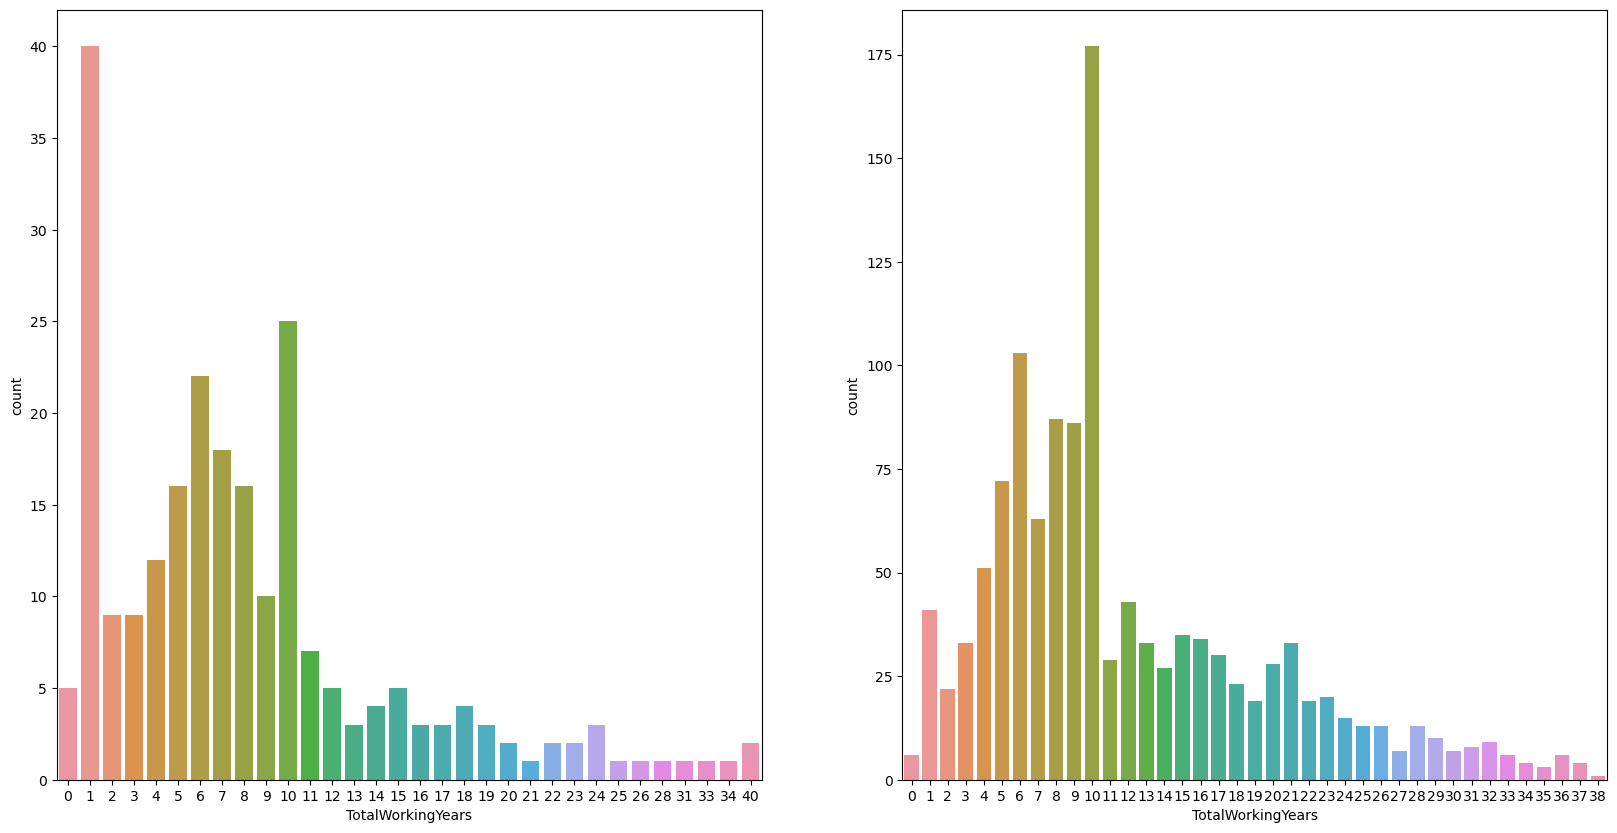

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(20,10))

sns.countplot(data = yes_df, x = 'TotalWorkingYears', ax=ax1)
sns.countplot(data = no_df, x = 'TotalWorkingYears', ax=ax2)

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

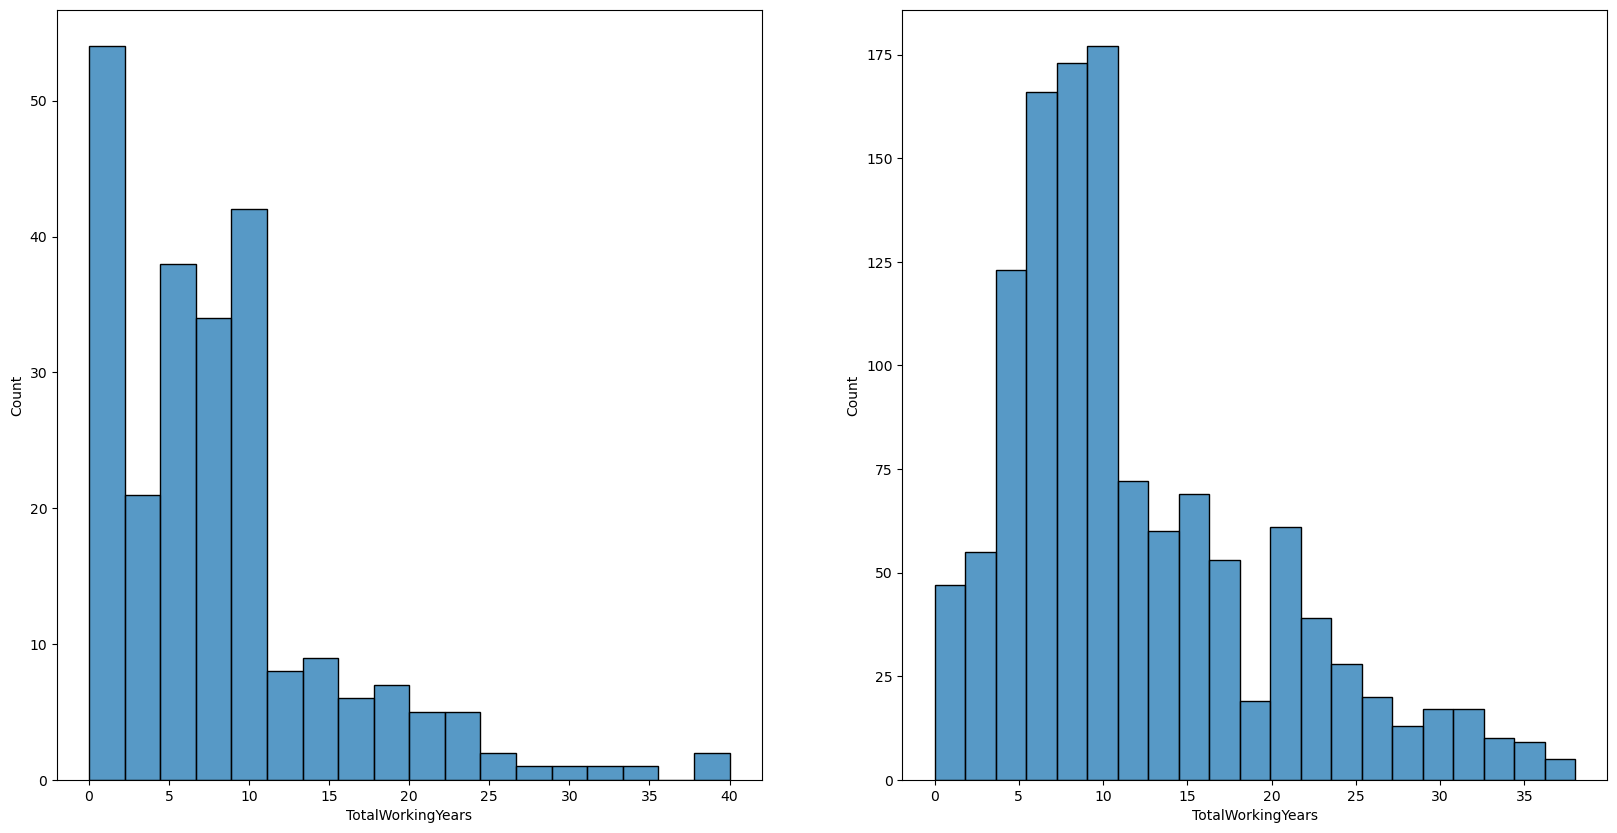

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(20,10))

sns.histplot(data = yes_df, x = 'TotalWorkingYears', ax=ax1)
sns.histplot(data = no_df, x = 'TotalWorkingYears', ax=ax2)

<Axes: xlabel='YearsAtCompany', ylabel='count'>

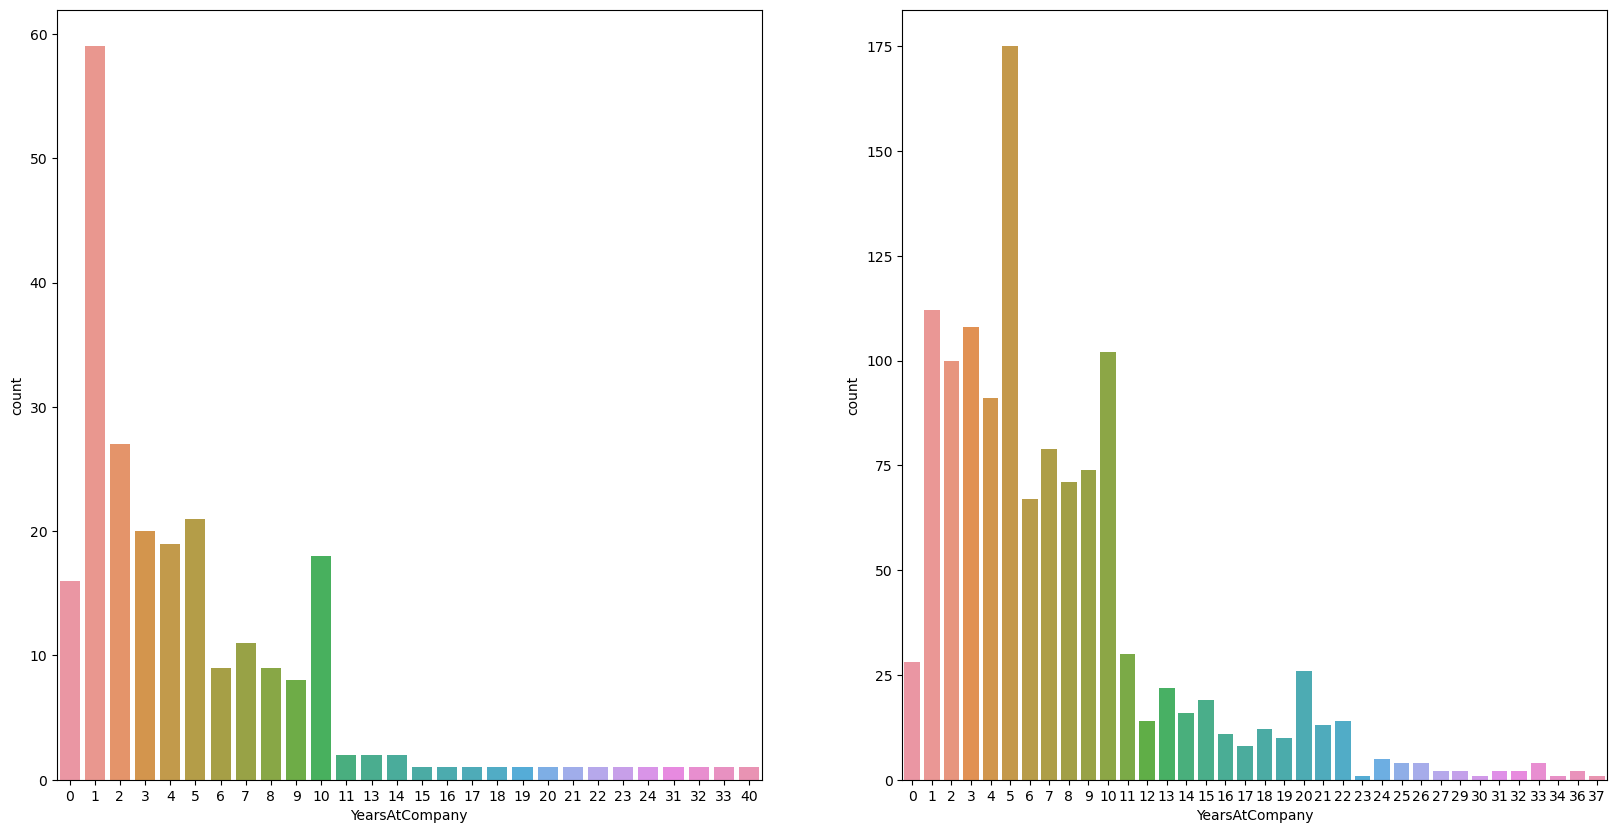

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(20,10))

sns.countplot(data = yes_df, x = 'YearsAtCompany', ax=ax1)
sns.countplot(data = no_df, x = 'YearsAtCompany', ax=ax2)

<Axes: xlabel='YearsAtCompany', ylabel='Count'>

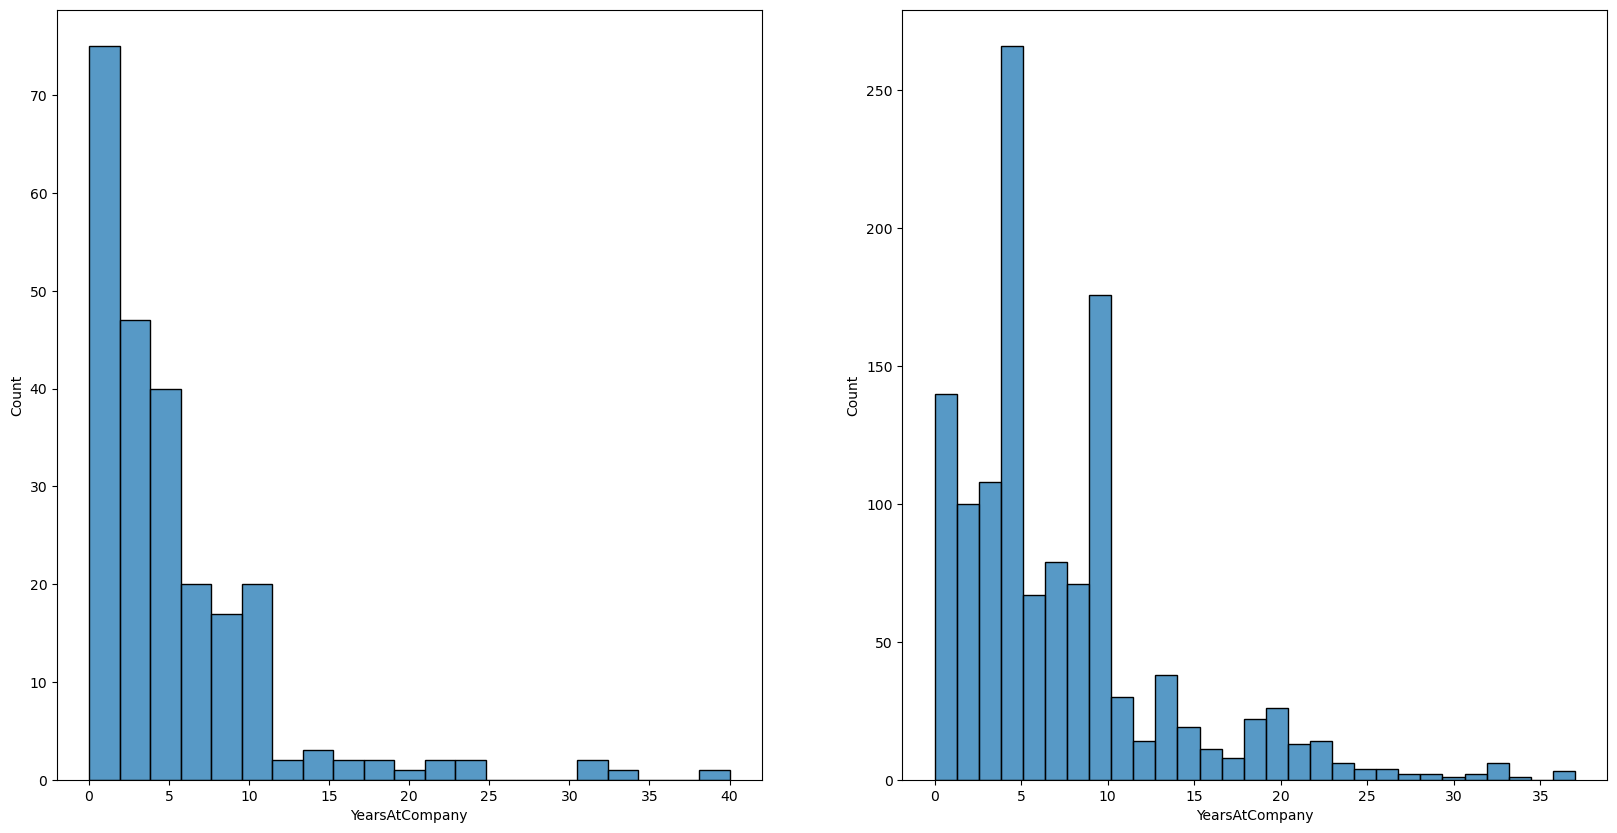

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(20,10))

sns.histplot(data = yes_df, x = 'YearsAtCompany', ax=ax1)
sns.histplot(data = no_df, x = 'YearsAtCompany', ax=ax2)

<Axes: xlabel='YearsSinceLastPromotion', ylabel='count'>

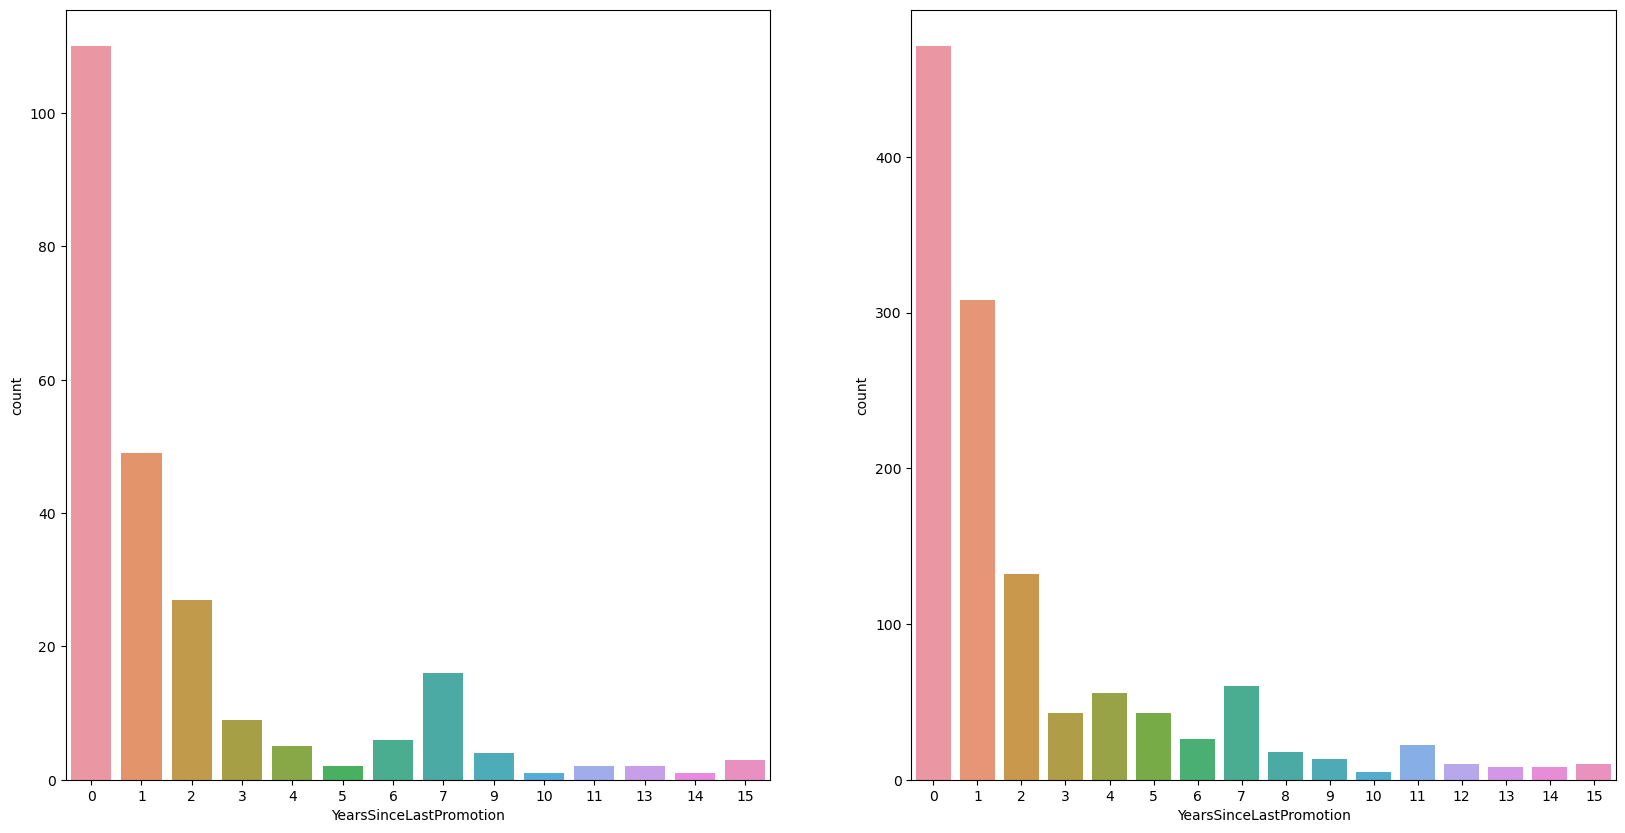

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(20,10))

sns.countplot(data = yes_df, x = 'YearsSinceLastPromotion', ax=ax1)
sns.countplot(data = no_df, x = 'YearsSinceLastPromotion', ax=ax2)

<Axes: xlabel='Age', ylabel='count'>

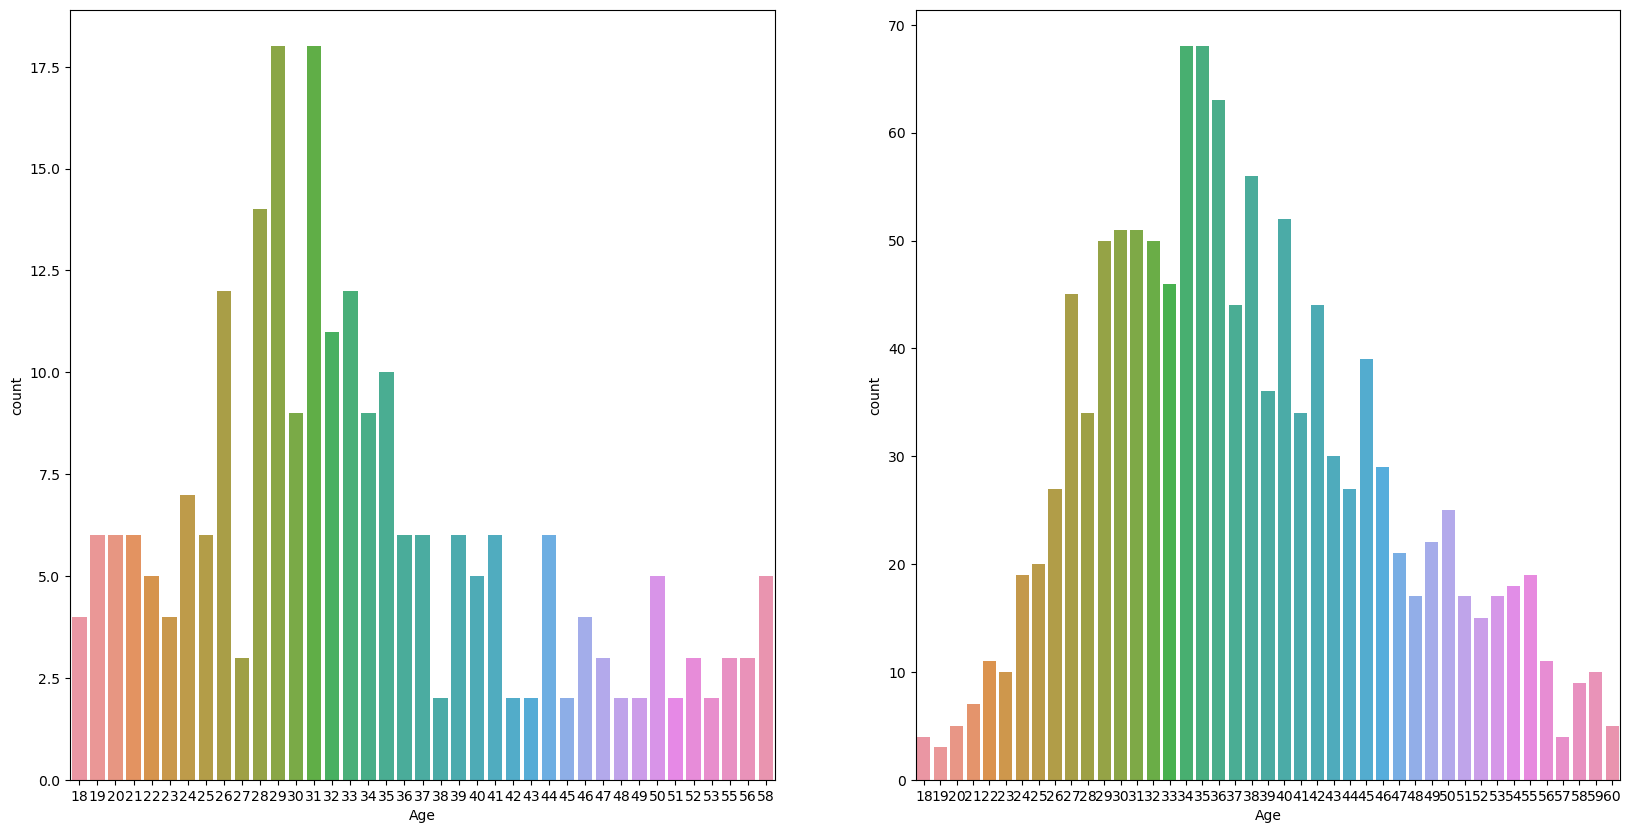

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(20,10))

sns.countplot(data = yes_df, x = 'Age', ax=ax1)
sns.countplot(data = no_df, x = 'Age', ax=ax2)

<Axes: xlabel='Age', ylabel='Count'>

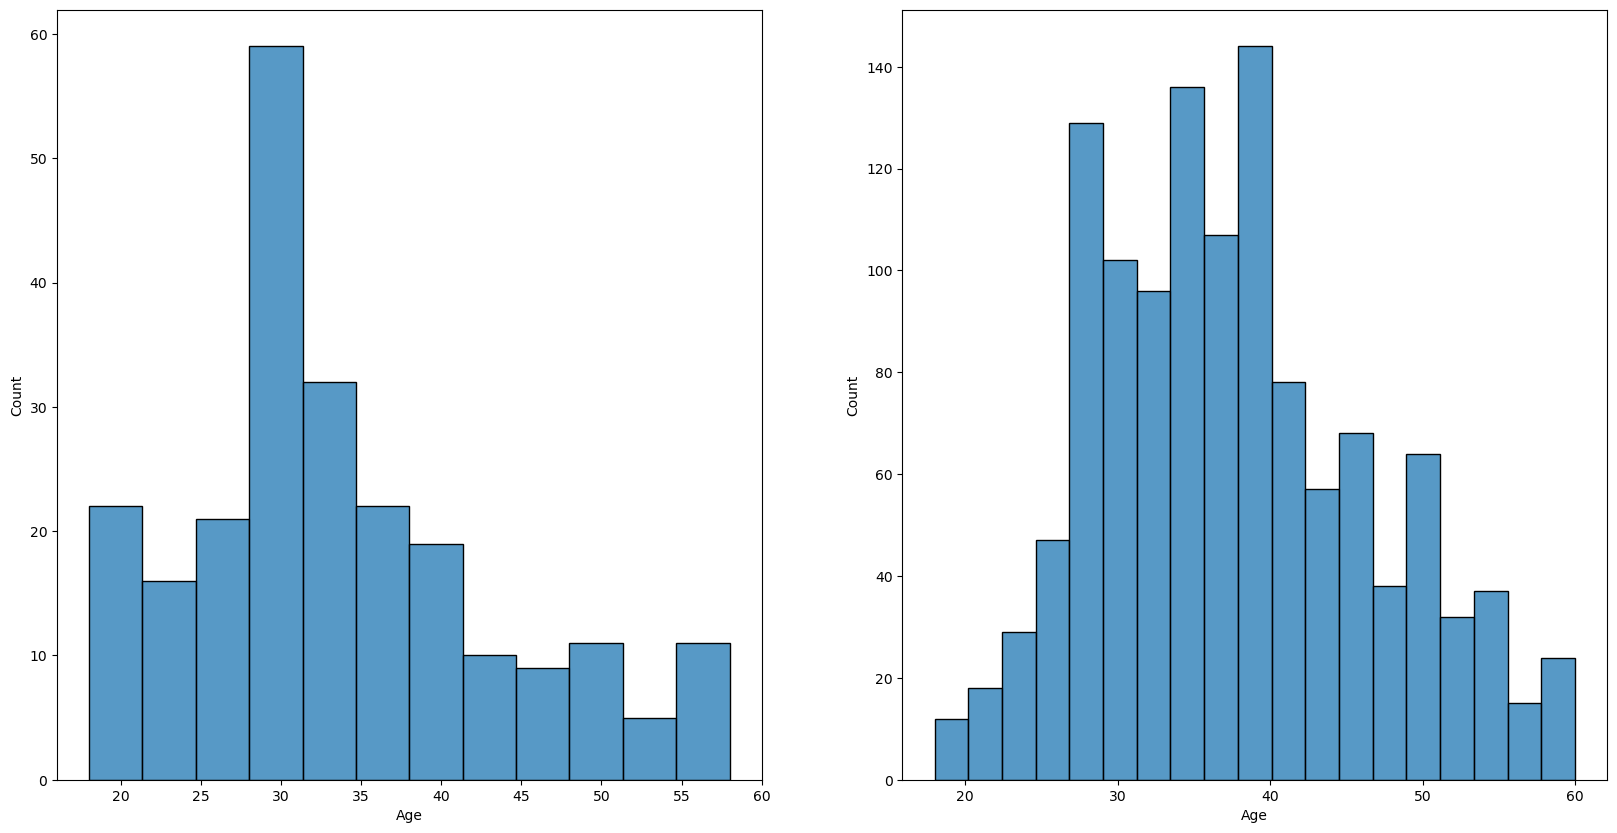

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(20,10))

sns.histplot(data = yes_df, x = 'Age', ax=ax1)
sns.histplot(data = no_df, x = 'Age', ax=ax2)

<Axes: xlabel='Department', ylabel='Count'>

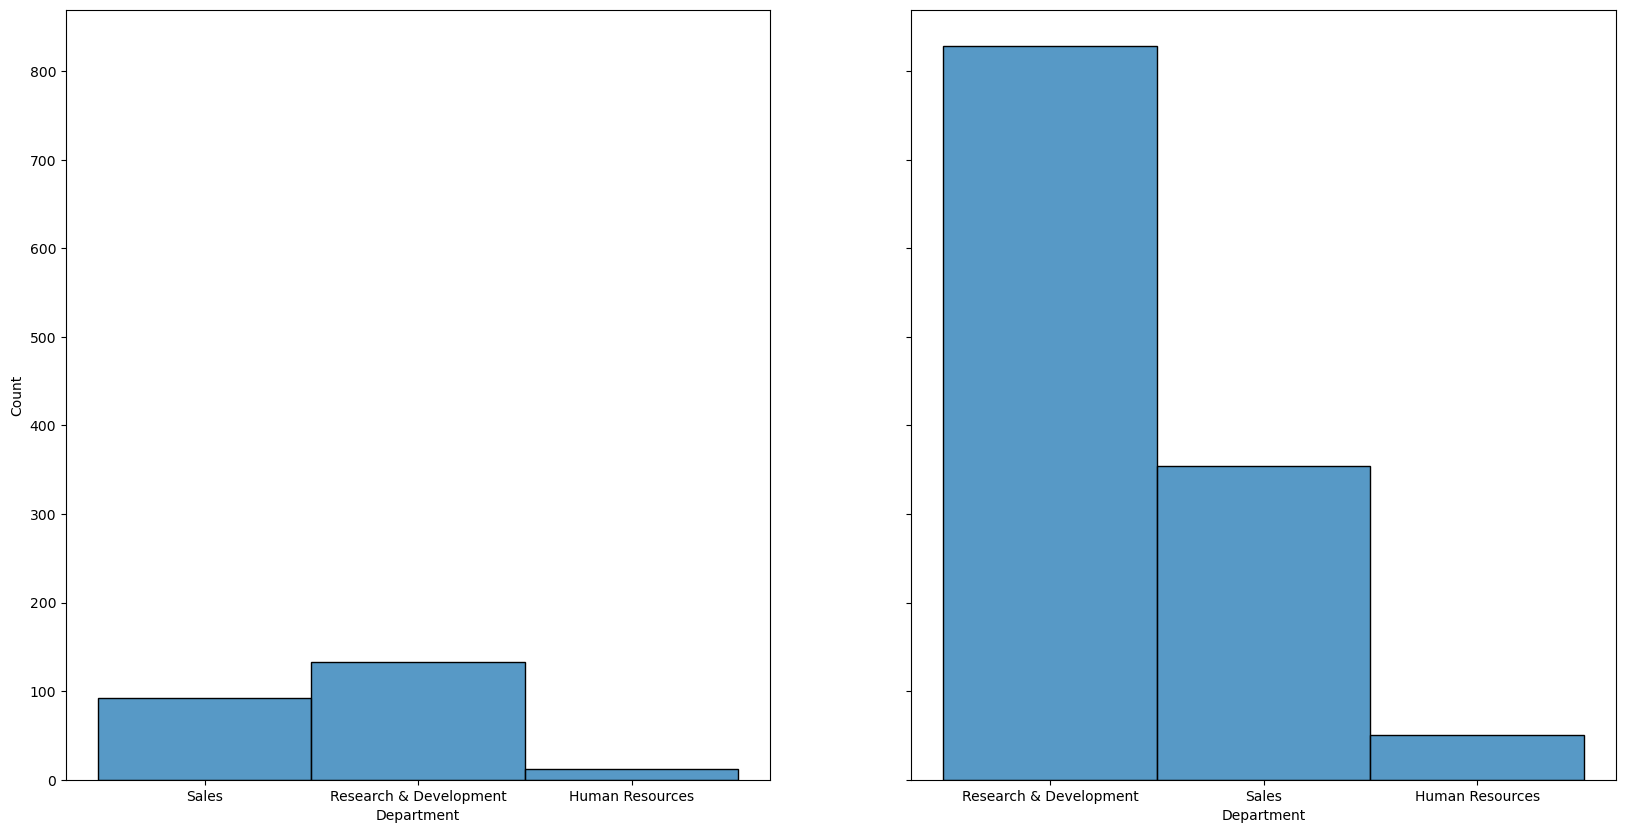

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(20,10), sharey=True)

sns.histplot(data = yes_df, x = 'Department', ax=ax1)
sns.histplot(data = no_df, x = 'Department', ax=ax2)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(20,10), sharey=True)

sns.histplot(data = yes_df, x = 'OverTime', ax=ax1)
sns.histplot(data = no_df, x = 'OverTime', ax=ax2)

In [58]:
# Departmentより分ける
depart_grouped_df = df.groupby('Department')
sales_df = depart_grouped_df.get_group('Sales').reset_index()
sales_df = sales_df.drop(['index'], axis = 1)
rd_df = depart_grouped_df.get_group('Research & Development').reset_index()
rd_df = rd_df.drop(['index'], axis = 1)
hr_df = depart_grouped_df.get_group('Human Resources').reset_index()
hr_df = hr_df.drop(['index'], axis = 1)

<Axes: xlabel='Age', ylabel='Count'>

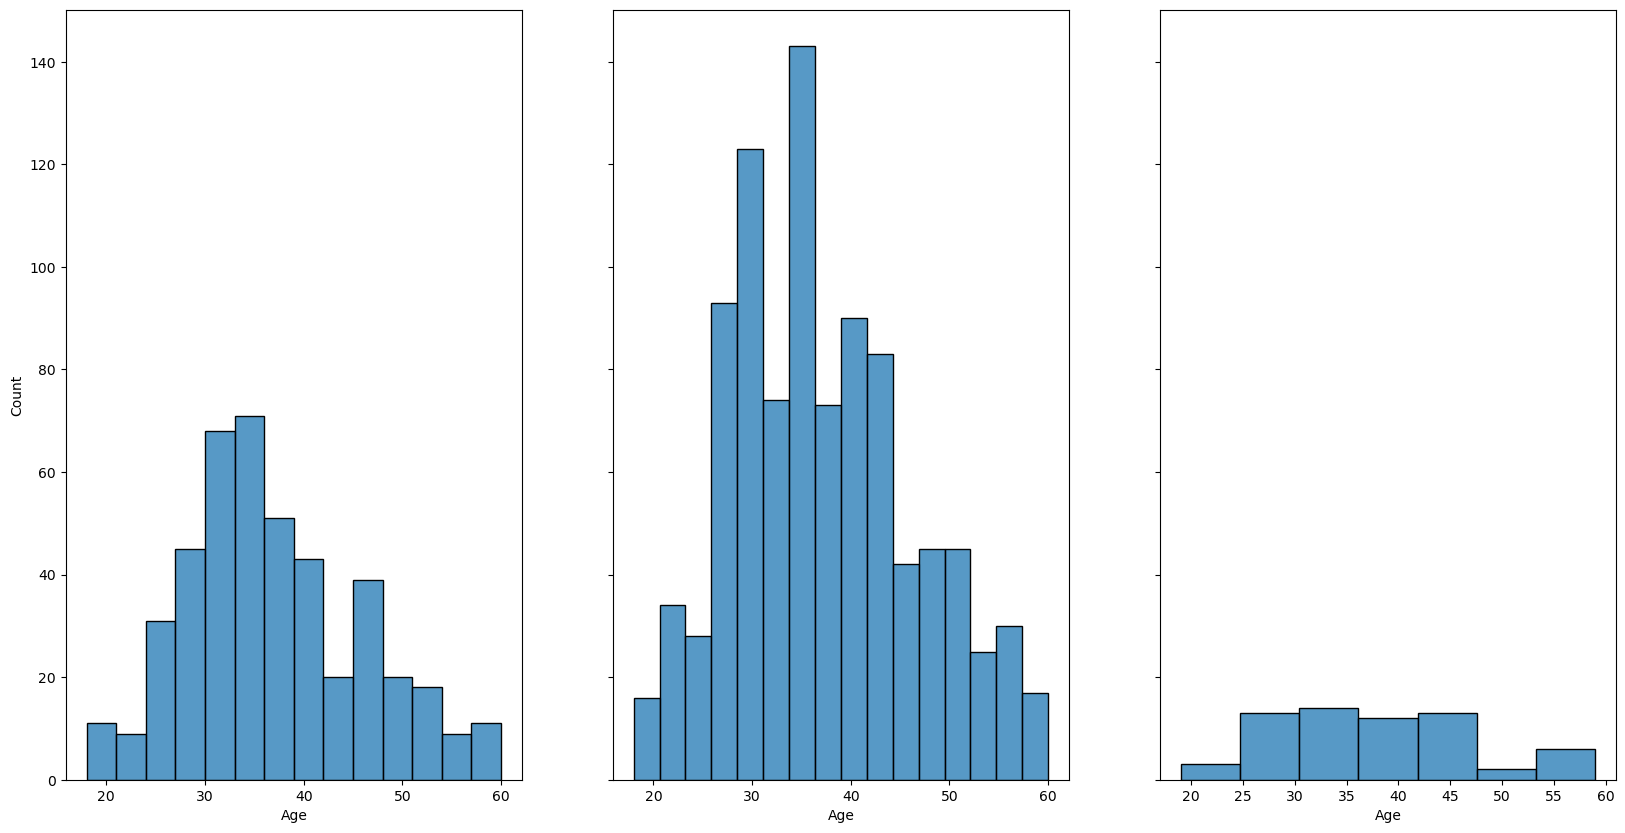

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3 , figsize=(20,10), sharey = True)

sns.histplot(data = sales_df, x = 'Age', ax=ax1)
sns.histplot(data = rd_df, x = 'Age', ax=ax2)
sns.histplot(data = hr_df, x = 'Age', ax=ax3)

In [67]:
print(sales_df['Age'].mean(), rd_df['Age'].mean(), hr_df['Age'].mean())

36.54260089686099 37.0426638917794 37.80952380952381


In [68]:
print(sales_df['Age'].median(), rd_df['Age'].median(), hr_df['Age'].median())

35.0 36.0 37.0


In [69]:
print(statistics.mode(sales_df['Age']), statistics.mode(rd_df['Age']), statistics.mode(hr_df['Age']))

NameError: name 'statistics' is not defined

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

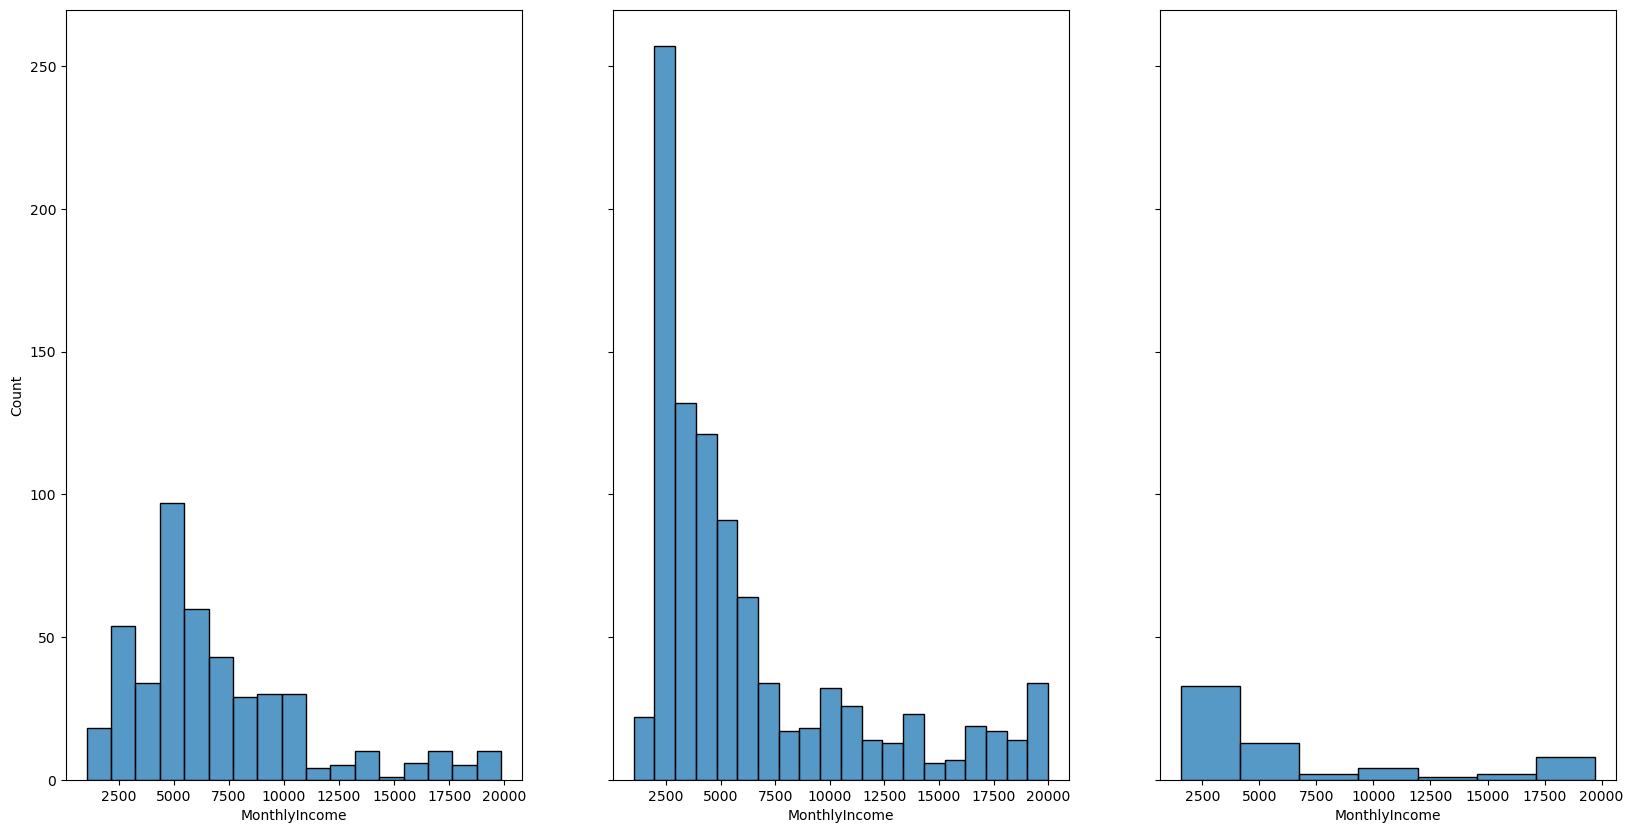

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3 , figsize=(20,10), sharey = True)

sns.histplot(data = sales_df, x = 'MonthlyIncome', ax=ax1)
sns.histplot(data = rd_df, x = 'MonthlyIncome', ax=ax2)
sns.histplot(data = hr_df, x = 'MonthlyIncome', ax=ax3)

In [71]:
print(sales_df['MonthlyIncome'].mean(), rd_df['MonthlyIncome'].mean(), hr_df['MonthlyIncome'].mean())

6959.17264573991 6281.252861602497 6654.507936507936


In [72]:
print(sales_df['MonthlyIncome'].median(), rd_df['MonthlyIncome'].median(), hr_df['MonthlyIncome'].median())

5754.5 4374.0 3886.0


In [73]:
print(sales_df['MonthlyIncome'].sum(), rd_df['MonthlyIncome'].sum(), hr_df['MonthlyIncome'].sum())

3103791 6036284 419234


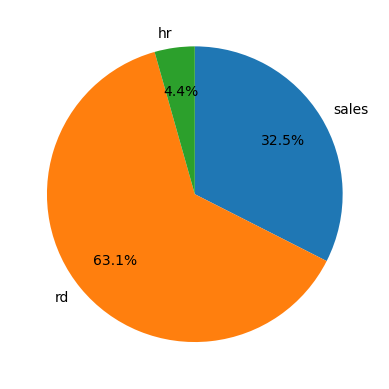

In [74]:
label = ['sales', 'rd', 'hr']
 
plt.pie([sales_df['MonthlyIncome'].sum(), rd_df['MonthlyIncome'].sum(), hr_df['MonthlyIncome'].sum()],
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
 
plt.show()

In [75]:
import statistics


In [76]:
print(statistics.mode(sales_df['MonthlyIncome']), statistics.mode(rd_df['MonthlyIncome']), statistics.mode(hr_df['MonthlyIncome']))

5473 2559 2741


<Axes: xlabel='YearsAtCompany', ylabel='Count'>

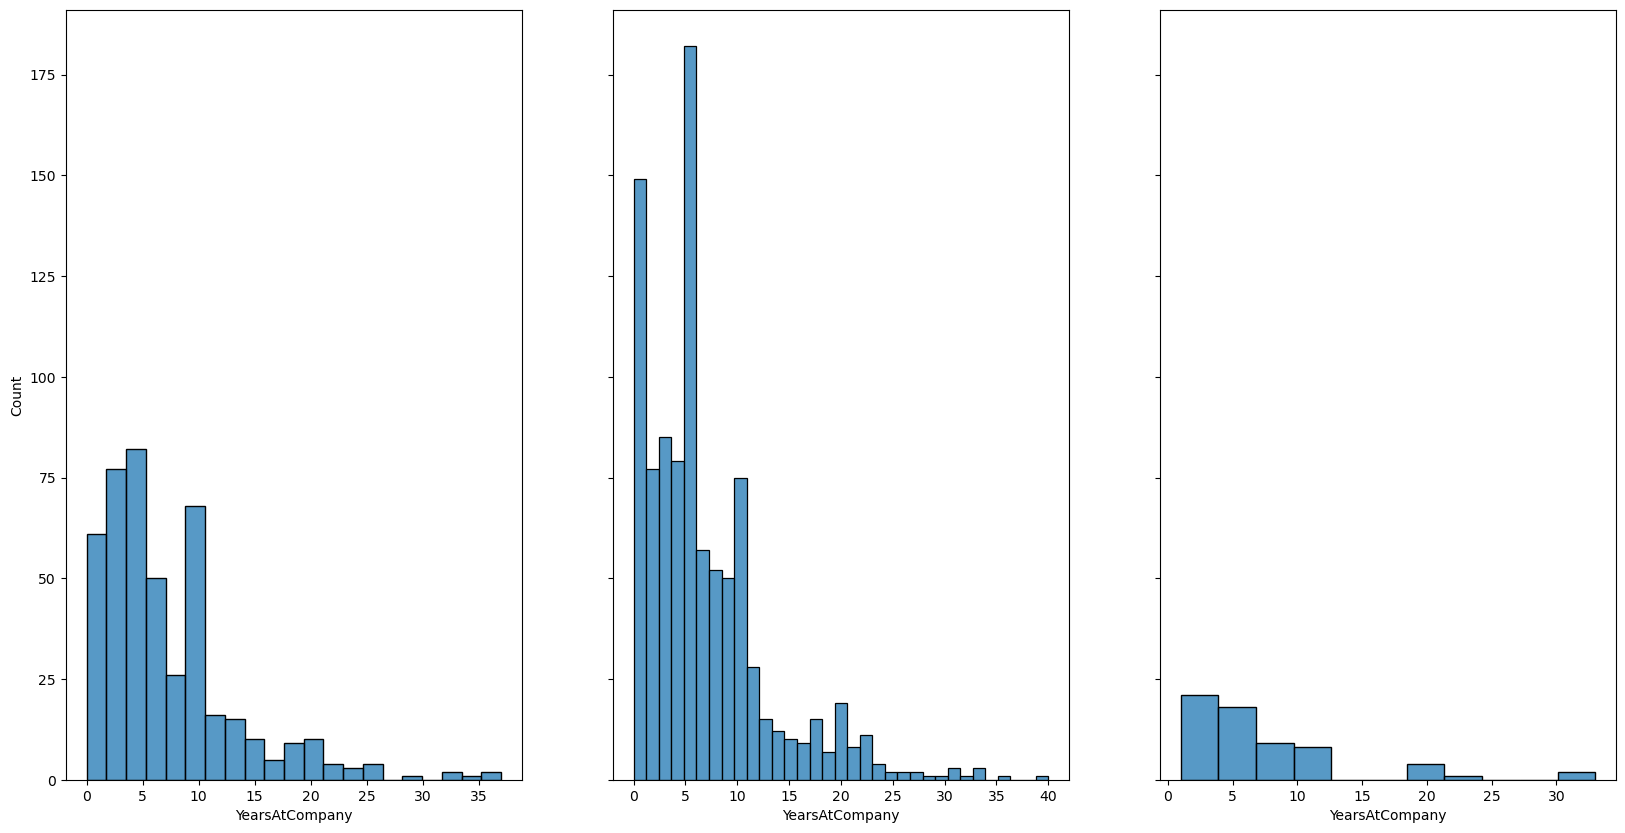

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3 , figsize=(20,10), sharey = True)

sns.histplot(data = sales_df, x = 'YearsAtCompany', ax=ax1)
sns.histplot(data = rd_df, x = 'YearsAtCompany', ax=ax2)
sns.histplot(data = hr_df, x = 'YearsAtCompany', ax=ax3)

In [78]:
print(sales_df['YearsAtCompany'].mean(), rd_df['YearsAtCompany'].mean(), hr_df['YearsAtCompany'].mean())

7.2847533632287 6.8647242455775235 7.238095238095238


In [79]:
print(sales_df['YearsAtCompany'].median(), rd_df['YearsAtCompany'].median(), hr_df['YearsAtCompany'].median())

6.0 5.0 5.0


In [80]:
print(statistics.mode(sales_df['YearsAtCompany']), statistics.mode(rd_df['YearsAtCompany']), statistics.mode(hr_df['YearsAtCompany']))

5 5 5


In [81]:
statistics.mode

<function statistics.mode(data)>

In [82]:
import statistics
import math
print(statistics.mode(sales_df['YearsAtCompany']), statistics.mode(rd_df['YearsAtCompany']), statistics.mode(hr_df['YearsAtCompany']))

5 5 5


In [83]:
#有意義なカラム
df_column = list(df.columns.values)
un_column = ['EmployeeNumber','EmployeeCount','StandardHours','Attrition', 'Over18']
df1_column = [item for item in df_column if item not in un_column]
df1 = df[df1_column]

In [84]:
df1.shape

(1470, 33)

## ラベルエンコーディング

## one-hot

In [253]:
import pandas as pd

def one_hot_encoding(df, columns):
    """
    データフレーム内の複数のカテゴリ変数をワンホットエンコーディングする関数

    Parameters:
        df (pandas.DataFrame): ワンホットエンコーディングを行うデータフレーム
        columns (list): ワンホットエンコーディングを行うカテゴリ変数のリスト

    Returns:
        encoded_df (pandas.DataFrame): ワンホットエンコーディングが適用されたデータフレーム
    """
    encoded_df = pd.get_dummies(df, columns=columns, drop_first = True)
    return encoded_df

In [254]:
a1 = [item for item in a if item not in un_column]
print(len(a))
print(len(a1))
df_int_ob = df_int[a1]

b1 = [item for item in b if item not in un_column]
print(len(b))
print(len(b1))
df_int_co = df_int[b1]

df_object_column = list(df_object.columns.values)
df_object_column1 = [item for item in df_object_column if item not in un_column]
print(len(df_object_column))
print(len(df_object_column1))
df_ob = df_object[df_object_column1]

df_object_one = one_hot_encoding(df_ob, df_object_column1)
df_int_one = one_hot_encoding(df_int_ob, a1)
df2 = pd.concat([df_object_one, df_int_one, df_int_co], axis =1)
print(df2.shape)

11
10
17
15
10
8
(1470, 75)


In [255]:
df2.columns

Index(['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'HowToEmploy_agent_A', 'HowToEmploy_agent_B', 'HowToEmploy_agent_C',
       'HowToEmploy_direct_recruting', 'HowToEmploy_intern', 'Education_2',
       'Education_3', 'Education_4', 'Education_5',
       'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3',
       'EnvironmentSatisfaction_4', 'JobInvolvement_2', 'JobInvolvement_3',
    

In [256]:
df2.head()

BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 0                             1   
2                                 0                             1   
3                                 0                             1   
4                                 0                             1   

   Department_Research & Development  Department_Sales  \
0                                  1                 0   
1                                  1                 0   
2                                  0                 1   
3                                  1                 0   
4                                  1                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             0                         0   
1                             1                         0   
2                             0                         1   
3                             0                         0   
4                             1                         0   

   EducationField_Medical  EducationField_Other  \
0                       1                     0   
1                       0                     0   
2                       0                     0   
3                       1                     0   
4                       0                     0   

   EducationField_Technical Degree  Gender_Male  ...  MonthlyAchievement  \
0                                0            1  ...               26897   
1                                0            1  ...                3208   
2                                0            1  ...               26959   
3                                0            1  ...                6672   
4                                0            1  ...               14935   

   NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                   1                  5                  2   
1                   1                  5                  5   
2                   1                  5                  6   
3                   1                  5                  5   
4                   2                  5                  5   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                      2               2                   2   
1                      2               5                   3   
2                      1               6                   4   
3                      2               5                   2   
4                      5               0                   0   

   YearsSinceLastPromotion  YearsWithCurrManager  Incentive  
0                        2                     1          0  
1                        0                     3          0  
2                        0                     3          0  
3                        0                     2          0  
4                        0                     0          0  

[5 rows x 75 columns]

In [89]:
import pandas as pd

def label_encoding(df, columns):
    """
    データフレーム中の複数のカテゴリ変数をラベルエンコーディングする関数

    Parameters:
        df (pandas.DataFrame): ラベルエンコーディングを行うデータフレーム
        columns (list): ラベルエンコーディングを行うカテゴリ変数のリスト

    Returns:
        labeled_df (pandas.DataFrame): ラベルエンコーディングが適用されたデータフレーム
    """
    labeled_df = df.copy()
    for col in columns:
        labeled_df[col] = pd.factorize(labeled_df[col])[0]
    return labeled_df


In [257]:
df_y = df['Attrition']
df2 = pd.concat([df2, df_y], axis = 1)
df2 = label_encoding(df2, ['Attrition'])

In [258]:
df2.shape

(1470, 76)

In [92]:
df_object_label = label_encoding(df_ob, df_object_column1)
df_int_label = label_encoding(df_int_ob, a1)
df3 = pd.concat([df_object_label, df_int_label, df_int_co], axis =1)
print(df3.shape)

(1470, 33)


In [77]:
df3.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'HowToEmploy', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'WorkLifeBalance', 'RemoteWork', 'Age',
       'DailyAchievement', 'DistanceFromHome', 'HourlyAchievement',
       'MonthlyIncome', 'MonthlyAchievement', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Incentive'],
      dtype='object')

In [283]:
percent = df2['Incentive']/df2['MonthlyIncome']
percent.describe()
percent = pd.DataFrame(percent, columns = ['in_percent'])

In [280]:
df2.columns

Index(['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'HowToEmploy_agent_A', 'HowToEmploy_agent_B', 'HowToEmploy_agent_C',
       'HowToEmploy_direct_recruting', 'HowToEmploy_intern', 'Education_2',
       'Education_3', 'Education_4', 'Education_5',
       'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3',
       'EnvironmentSatisfaction_4', 'JobInvolvement_2', 'JobInvolvement_3',
    

In [336]:
import pandas as pd
#, 'DailyAchievement', 'MonthlyAchievement',
df4 = df2.drop(['HourlyAchievement', 'Incentive'], axis=1)
df4 = pd.concat([df4, percent], axis=1)


# ベイスラインモデル

In [94]:
df1.head()

Age BusinessTravel  DailyAchievement              Department  \
0   25  Travel_Rarely              1280  Research & Development   
1   27  Travel_Rarely              1167  Research & Development   
2   25  Travel_Rarely               240                   Sales   
3   28  Travel_Rarely               440  Research & Development   
4   28  Travel_Rarely               529  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction Gender  \
0                 7          1        Medical                        4   Male   
1                 4          2  Life Sciences                        1   Male   
2                 5          3      Marketing                        3   Male   
3                21          3        Medical                        3   Male   
4                 2          4  Life Sciences                        1   Male   

   HourlyAchievement  ...  TotalWorkingYears  TrainingTimesLastYear  \
0                 64  ...                  2                      2   
1                 76  ...                  5                      2   
2                 46  ...                  6                      1   
3                 42  ...                  5                      2   
4                 79  ...                  5                      5   

  WorkLifeBalance  YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               3               2                  2                        2   
1               3               5                  3                        0   
2               3               6                  4                        0   
3               1               5                  2                        0   
4               1               0                  0                        0   

   YearsWithCurrManager               HowToEmploy Incentive  RemoteWork  
0                     1                    intern         0           4  
1                     3                    intern         0           1  
2                     3                   agent_A         0           2  
3                     2  New_graduate_recruitment         0           5  
4                     0  New_graduate_recruitment         0           1  

[5 rows x 33 columns]

In [79]:
#!pip install --upgrade scikit-learn

In [80]:
#pip install scikit-learn==0.24.2 

In [95]:
# ライブラリの読み込み
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [259]:
# 目的変数と説明変数に分割
X = df2.drop("Attrition", axis=1).values
y = df2["Attrition"].values

In [260]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [261]:
# 目的変数と説明変数に分割
X1 = df3.drop("Attrition", axis=1).values
y1 = df3["Attrition"].values

In [337]:
# 目的変数と説明変数に分割
X2 = df4.drop("Attrition", axis=1).values
y2 = df4["Attrition"].values

In [99]:
y1

array([0, 0, 1, ..., 0, 0, 0])

In [315]:
# 標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [330]:
# 標準化
sc = StandardScaler()
sc.fit(X2)
X_std = sc.transform(X2)

In [263]:
# 訓練データと評価データに分割
X_train, X_valid, y_train, y_valid, X1_train, X1_valid, y1_train, y1_valid = train_test_split(X, y,
                                                          X1, y1,
                                                          test_size=0.3, stratify=y, random_state=0)

In [338]:
# 訓練データと評価データに分割
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2,
                                                          test_size=0.3, random_state=0)

In [101]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)



/Users/suxuanrong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [102]:
lr_train_pred = lr.predict_proba(X_train)[:, 1]
lr_valid_pred = lr.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lr_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lr_valid_pred)}")

Train Score: 0.7150246408577532
Valid Score: 0.7262657023220402


In [267]:
#ランダムフォレスト 完全dummy
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion="gini", max_leaf_nodes= i, random_state = 0)
model.fit(X_train,y_train)
print(model.score(X_train, y_train))
print(model.score(X_valid, y_valid))


0.8571428571428571
0.8503401360544217


In [228]:
#ランダムフォレスト 没有完全dummy
from sklearn.ensemble import RandomForestClassifier

model２ = RandomForestClassifier(criterion="gini", max_leaf_nodes= i, random_state = 0)
model2.fit(X1_train,y1_train)
print(model2.score(X1_train, y1_train))
print(model2.score(X1_valid, y1_valid))


0.8979591836734694
0.8480725623582767


In [339]:
#ランダムフォレスト 没有完全dummy, in_percent
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(criterion="gini", max_leaf_nodes= i, random_state = 0)
model3.fit(X2_train,y2_train)
print(model3.score(X2_train, y2_train))
print(model3.score(X2_valid, y2_valid))


0.847424684159378
0.8321995464852607


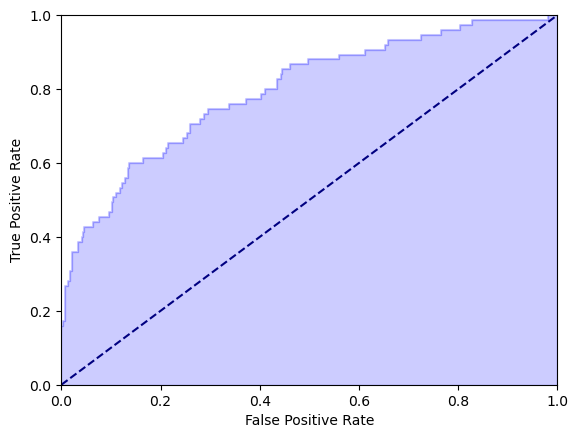

In [340]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y2_valid, model3.predict_proba(X2_valid)[:, 1])
plt.step(fpr, tpr, color='b', alpha=0.2, where='post')
plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='b')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.show()

In [341]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.7958469945355192

[24 22 30 39 12 58 44 46 29 41 37 40 10  7 54 32 21 47 27  5 57 35 45 48
 51 25 56 26 38 50 11 14  1 59 53 13 15  6 28 52 16 43 23 18  9 31 42 55
  4  2 34 71 68 36 33  3  8 66 17 49 65 70 19 61 64 62  0 73 72 67 69 60
 63 20]


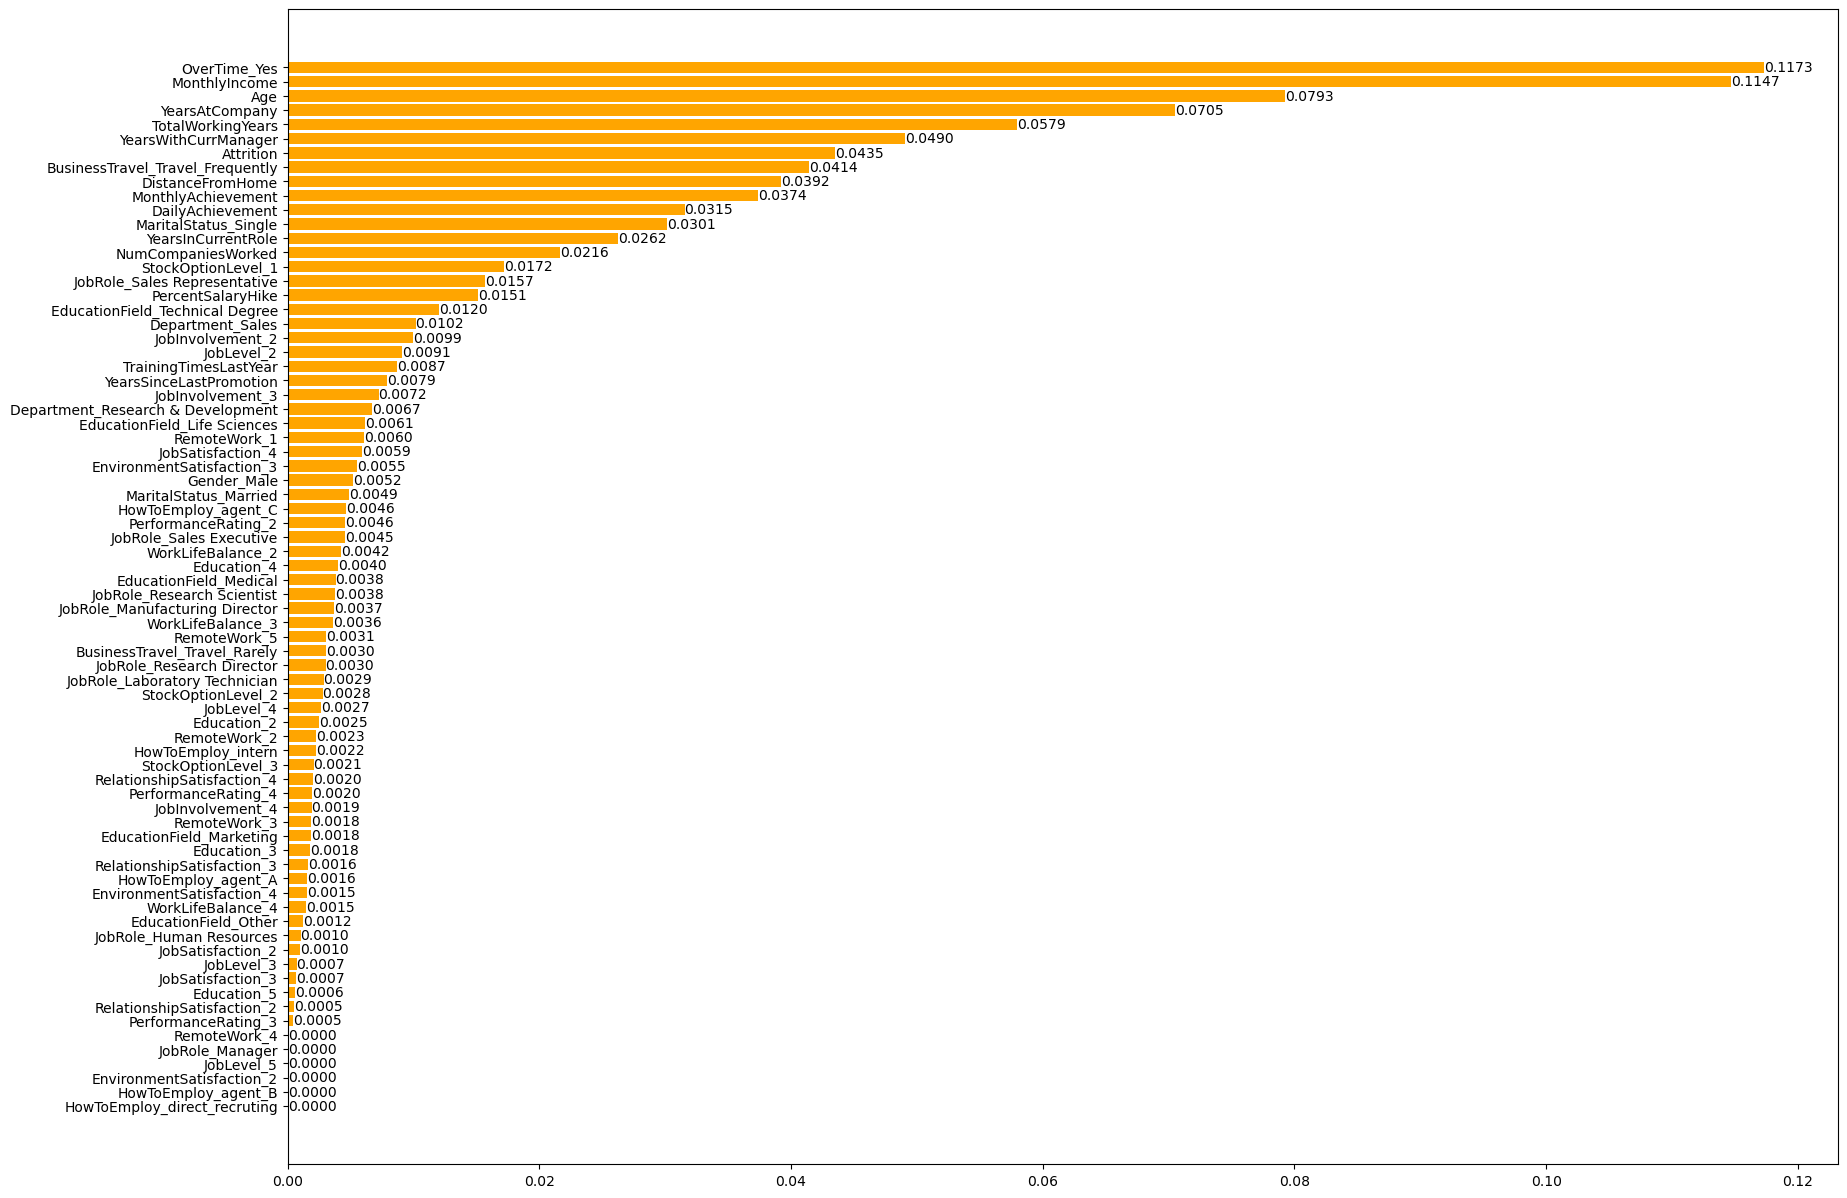

In [345]:
import matplotlib.pyplot as plt

labels = df4.columns
importances = model3.feature_importances_

# 重要度の高い順にインデックスをソート
top_indices= importances.argsort()[::1]
#print(top_indices)
#top_indices = top_indices[:10][::-1]

print(top_indices)
plt.figure(figsize=(20, 15))

bars = plt.barh(y=range(len(top_indices)), width=importances[top_indices], color = 'orange')
plt.yticks(ticks=range(len(top_indices)), labels=labels[top_indices])

# 各棒の上に値を表示する
#top_indices1 = np.argsort(importances)[::-1]
#top_indices1 = top_indices1[:10]
for i, v in enumerate(importances[top_indices]):
    plt.text(v, i, f"{v:.4f}", va='center')

plt.show()


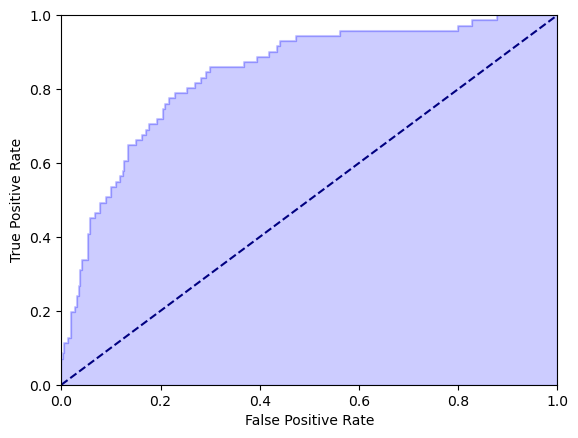

In [136]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_valid, model.predict_proba(X_valid)[:, 1])
plt.step(fpr, tpr, color='b', alpha=0.2, where='post')
plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='b')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.show()

In [137]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8400456794822991

[Text(0.4444444444444444, 0.875, 'TotalWorkingYears <= 1.5\ngini = 0.271\nsamples = 1029\nvalue = [863, 166]'),
 Text(0.2222222222222222, 0.625, 'MaritalStatus_Single <= 0.5\ngini = 0.497\nsamples = 61\nvalue = [28, 33]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.444\nsamples = 33\nvalue = [22, 11]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.337\nsamples = 28\nvalue = [6, 22]'),
 Text(0.6666666666666666, 0.625, 'OverTime_Yes <= 0.5\ngini = 0.237\nsamples = 968\nvalue = [835, 133]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.163\nsamples = 704\nvalue = [641, 63]'),
 Text(0.7777777777777778, 0.375, 'MonthlyIncome <= 2469.5\ngini = 0.39\nsamples = 264\nvalue = [194, 70]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.467\nsamples = 35\nvalue = [13, 22]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.331\nsamples = 229\nvalue = [181, 48]')]

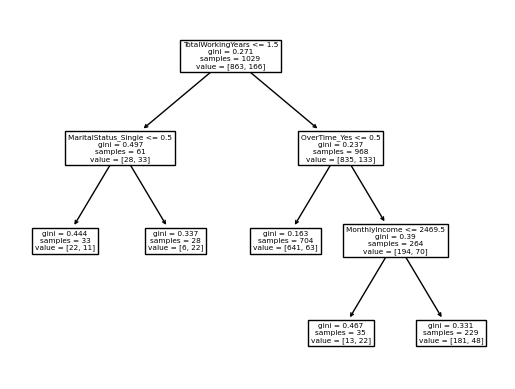

In [129]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
model1 = DecisionTreeClassifier(criterion="gini", max_leaf_nodes=5)
model1.fit(X_train,y_train)
tree.plot_tree(model1, feature_names= df2.columns.values)

In [130]:
model1.score(X_valid, y_valid)

0.8458049886621315

[Text(0.4444444444444444, 0.875, 'TotalWorkingYears <= 1.5\ngini = 0.271\nsamples = 1029\nvalue = [863, 166]'),
 Text(0.2222222222222222, 0.625, 'MaritalStatus <= 1.5\ngini = 0.497\nsamples = 61\nvalue = [28, 33]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.444\nsamples = 33\nvalue = [22, 11]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.337\nsamples = 28\nvalue = [6, 22]'),
 Text(0.6666666666666666, 0.625, 'OverTime <= 0.5\ngini = 0.237\nsamples = 968\nvalue = [835, 133]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.163\nsamples = 704\nvalue = [641, 63]'),
 Text(0.7777777777777778, 0.375, 'MonthlyIncome <= 2469.5\ngini = 0.39\nsamples = 264\nvalue = [194, 70]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.467\nsamples = 35\nvalue = [13, 22]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.331\nsamples = 229\nvalue = [181, 48]')]

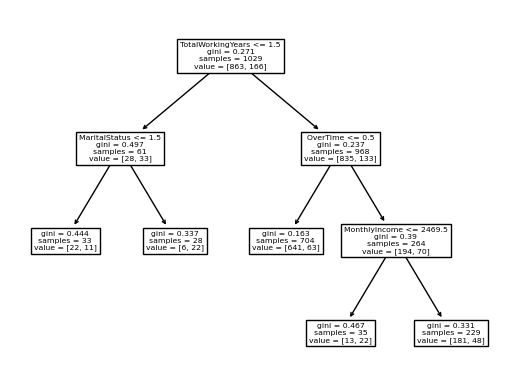

In [220]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
model1 = DecisionTreeClassifier(criterion="gini", max_leaf_nodes=5)
model1.fit(X1_train,y1_train)
tree.plot_tree(model1, feature_names= df3.columns.values)

In [133]:
model1.score(X1_valid, y1_valid)

0.8458049886621315

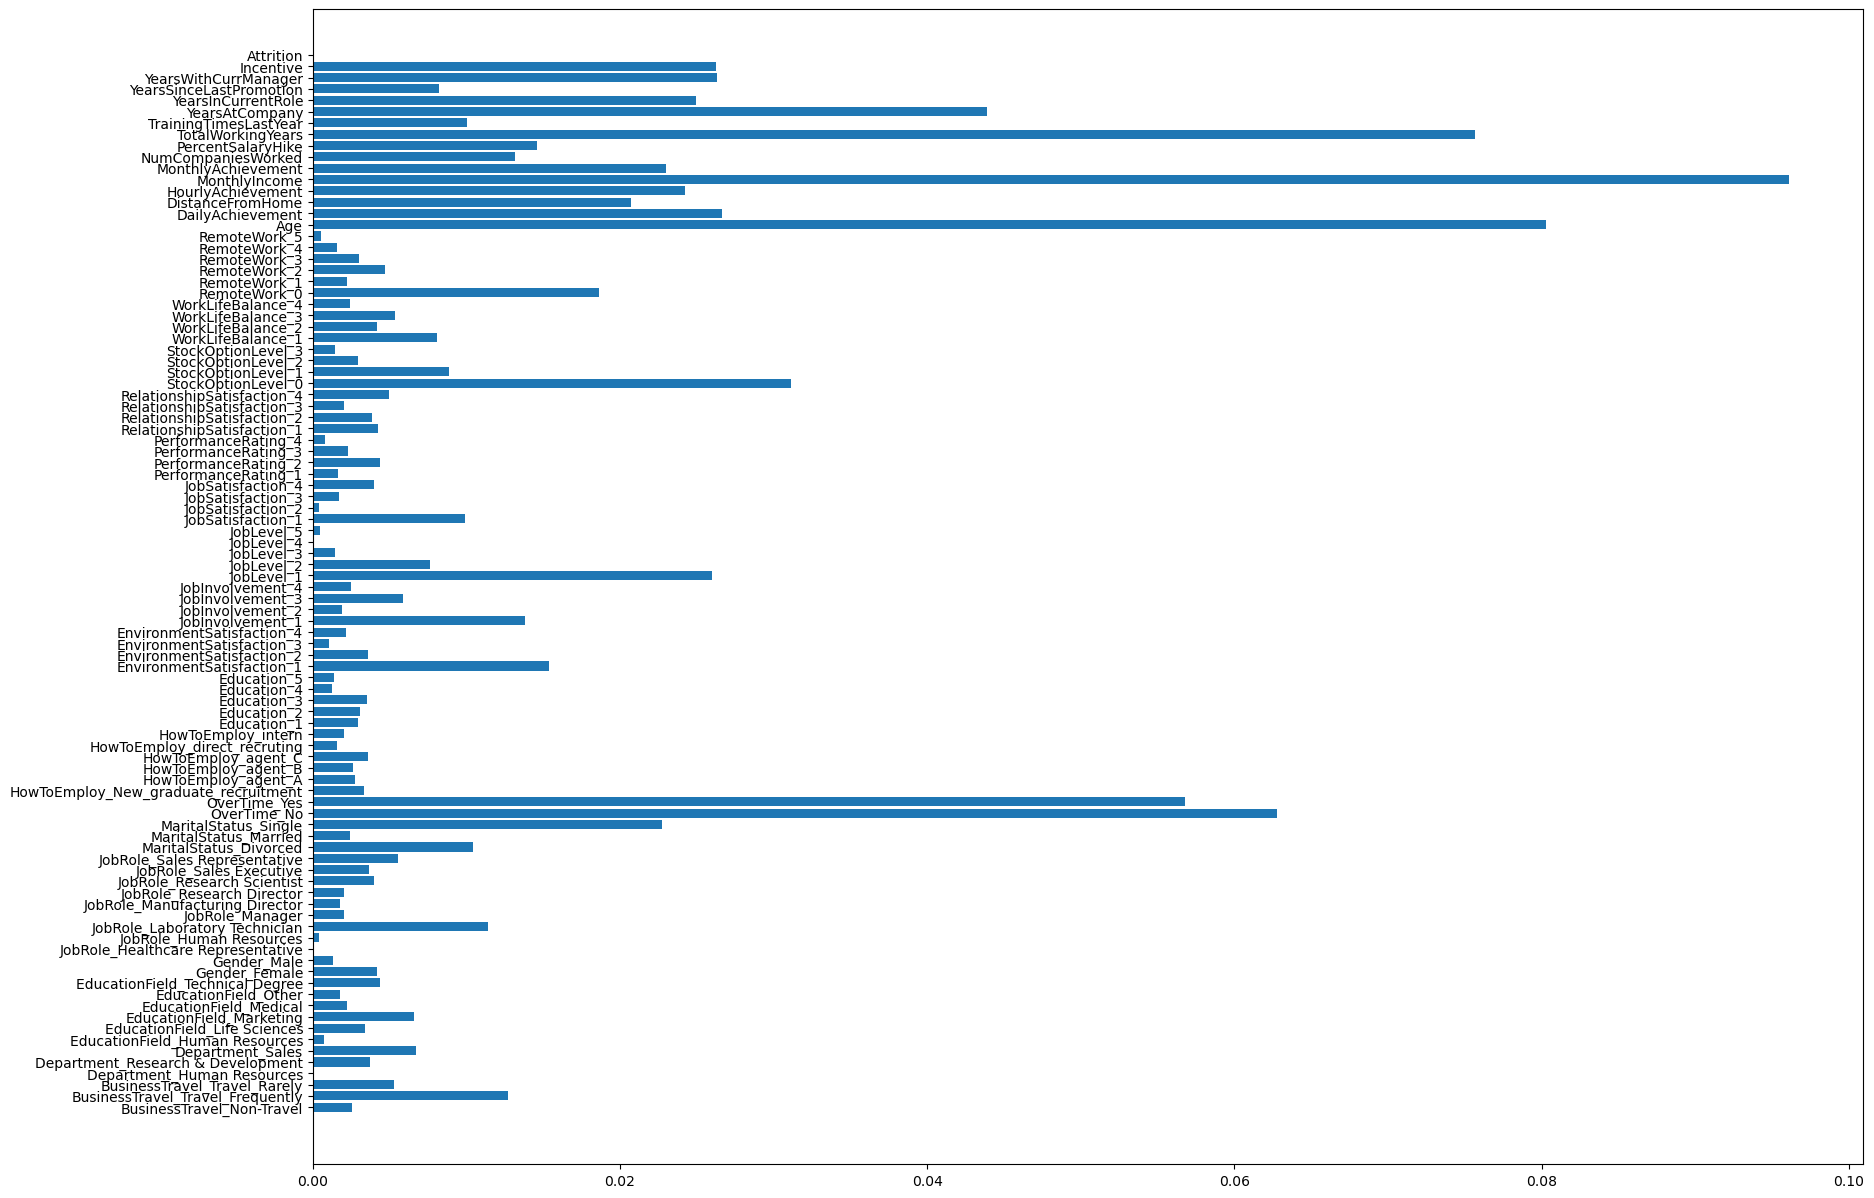

In [93]:
import matplotlib.pyplot as plt

labels = df2.columns
importances = model.feature_importances_

plt.figure(figsize = (20,15))
plt.barh(y = range(len(importances)), width = importances)
plt.yticks(ticks = range(len(labels)), labels = labels)
plt.show()

In [148]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion="gini", max_leaf_nodes= i, random_state = 0)
model.fit(X1_train,y1_train)
print(model.score(X1_train, y1_train))
print(model.score(X1_valid, y1_valid))


0.8629737609329446
0.8390022675736961


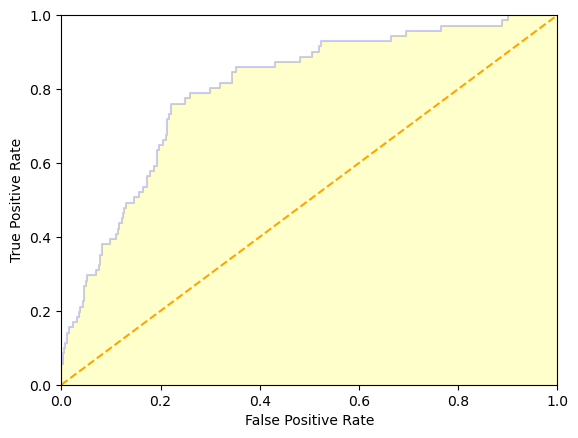

In [268]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_valid, model.predict_proba(X_valid)[:, 1])
plt.step(fpr, tpr, color='b', alpha=0.2, where='post')
plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='yellow')
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.show()

In [269]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8017129805862201

In [142]:
labels

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'HowToEmploy', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'WorkLifeBalance', 'RemoteWork', 'Age',
       'DailyAchievement', 'DistanceFromHome', 'HourlyAchievement',
       'MonthlyIncome', 'MonthlyAchievement', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Incentive', 'Attrition'],
      dtype='object')

In [ ]:
df4_column = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'HowToEmploy', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'WorkLifeBalance', 'RemoteWork', 'Age',
       'DailyAchievement', 'DistanceFromHome', 'HourlyAchievement',
       'MonthlyIncome', 'MonthlyAchievement', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Incentive', 'Attrition']

In [191]:
df３.corr()

BusinessTravel  Department  EducationField  \
BusinessTravel                  1.000000   -0.000935       -0.016398   
Department                     -0.000935    1.000000        0.276457   
EducationField                 -0.016398    0.276457        1.000000   
Gender                         -0.032981    0.000488       -0.026014   
JobRole                        -0.020506   -0.101635       -0.029469   
MaritalStatus                   0.039548   -0.021989       -0.028873   
OverTime                       -0.016543    0.000340        0.010272   
HowToEmploy                     0.020619    0.011305        0.001710   
Education                      -0.000757    0.019636        0.065595   
EnvironmentSatisfaction        -0.012004    0.053709       -0.027523   
JobInvolvement                  0.035695    0.000461       -0.031213   
JobLevel                       -0.010945    0.084557       -0.011784   
JobSatisfaction                -0.033962    0.006231        0.013973   
PerformanceRating              -0.002228   -0.023424        0.010351   
RelationshipSatisfaction        0.007312    0.007243        0.023885   
StockOptionLevel                0.003780    0.009105        0.056639   
WorkLifeBalance                 0.028930   -0.005872       -0.018946   
RemoteWork                     -0.005462   -0.018482       -0.015679   
Age                            -0.024751   -0.007652       -0.023108   
DailyAchievement                0.004086   -0.021959       -0.035624   
DistanceFromHome                0.024469    0.002196       -0.007609   
HourlyAchievement              -0.026528   -0.021528       -0.024055   
MonthlyIncome                  -0.034319    0.056573       -0.010716   
MonthlyAchievement              0.014107   -0.004124       -0.019993   
NumCompaniesWorked             -0.020875   -0.011261       -0.014072   
PercentSalaryHike               0.029377   -0.034933       -0.033869   
TotalWorkingYears              -0.034226   -0.006602       -0.035772   
TrainingTimesLastYear          -0.015240   -0.008549       -0.050800   
YearsAtCompany                  0.014575    0.029752       -0.025164   
YearsInCurrentRole              0.011497    0.009204        0.000189   
YearsSinceLastPromotion         0.032591    0.008394       -0.037647   
YearsWithCurrManager            0.022636    0.002874       -0.006705   
Incentive                       0.020216    0.006830       -0.034274   
Attrition                      -0.000074    0.077351        0.069516   

                            Gender   JobRole  MaritalStatus  OverTime  \
BusinessTravel           -0.032981 -0.020506       0.039548 -0.016543   
Department                0.000488 -0.101635      -0.021989  0.000340   
EducationField           -0.026014 -0.029469      -0.028873  0.010272   
Gender                    1.000000  0.039462       0.013074  0.041924   
JobRole                   0.039462  1.000000      -0.074512 -0.027755   
MaritalStatus             0.013074 -0.074512       1.000000  0.004244   
OverTime                  0.041924 -0.027755       0.004244  1.000000   
HowToEmploy               0.018110 -0.138174       0.022243  0.057566   
Education                 0.016547  0.031667       0.003299 -0.020322   
EnvironmentSatisfaction   0.008242 -0.001093      -0.061656 -0.012793   
JobInvolvement           -0.032906 -0.010794      -0.011287  0.008737   
JobLevel                  0.052175  0.632859      -0.075332  0.006413   
JobSatisfaction           0.033252  0.016238      -0.019059 -0.024539   
PerformanceRating        -0.024179 -0.012959       0.014471 -0.006158   
RelationshipSatisfaction  0.002505 -0.046554      -0.015849 -0.019845   
StockOptionLevel          0.019292  0.057589      -0.143637  0.011001   
WorkLifeBalance          -0.022282 -0.009683      -0.015884 -0.012570   
RemoteWork                0.018667  0.018568      -0.045990  0.016954   
Age                       0.036311  0.332776      -0.111831  0.028062   
DailyAchievement          0.011716  0.007792 

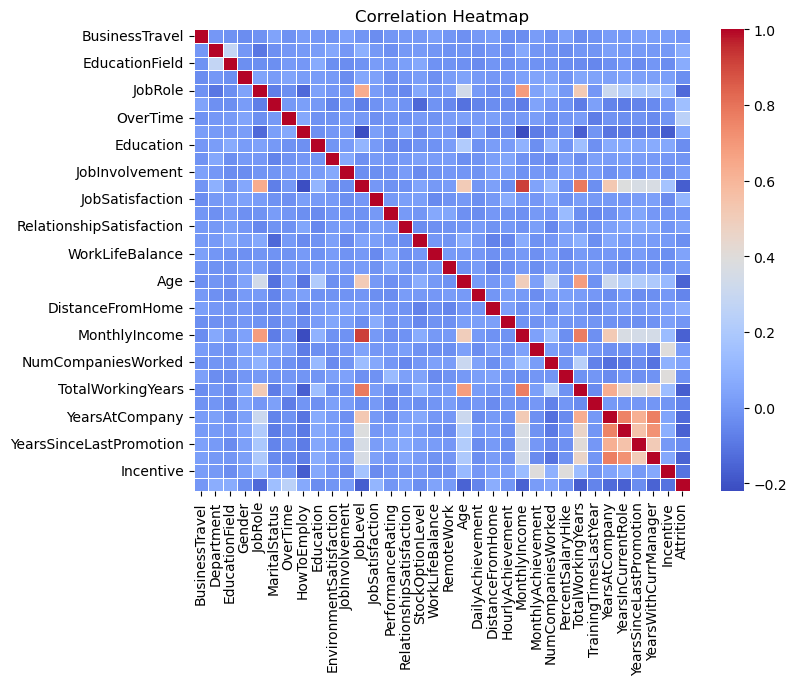

In [193]:
# 行列間の相関を計算
correlation_matrix = df３.corr()

# ヒートマップを描画
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

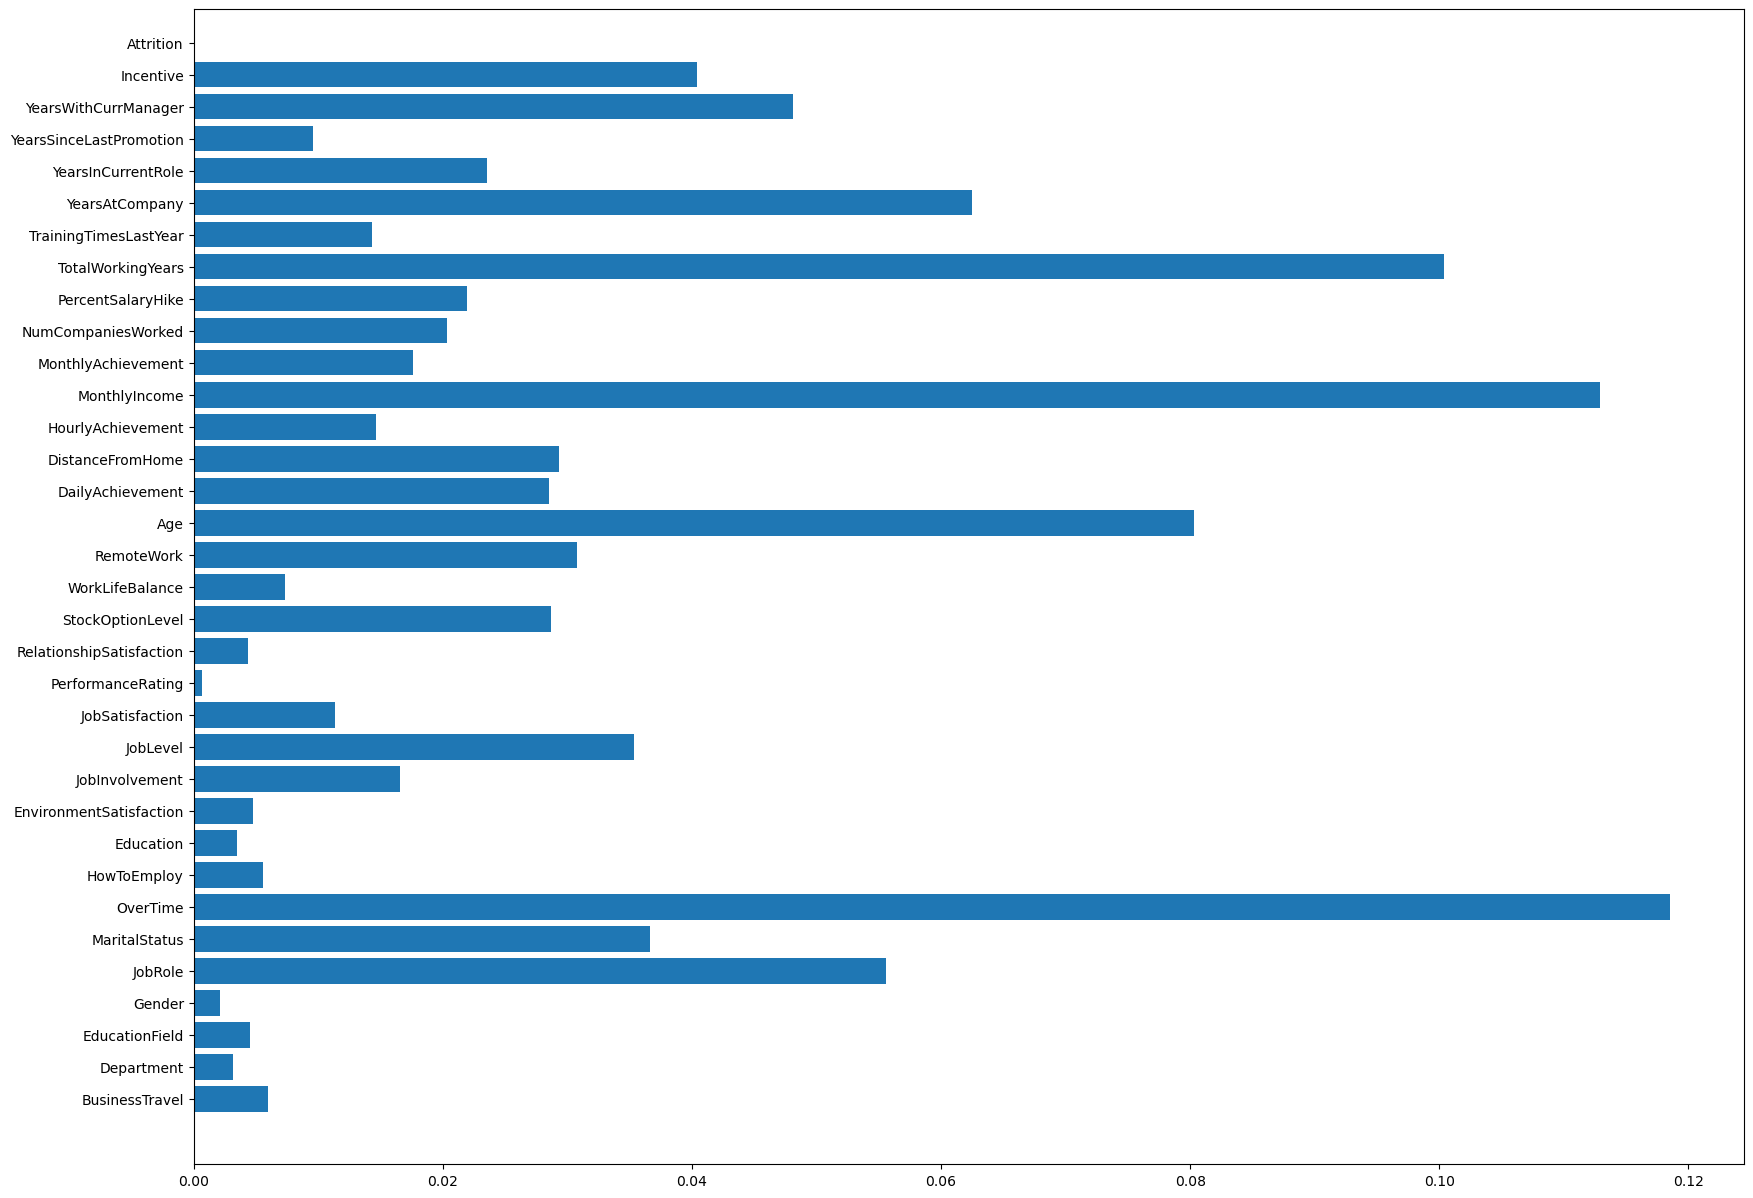

In [149]:
import matplotlib.pyplot as plt

labels = df3.columns

importances = model.feature_importances_

plt.figure(figsize = (20,15))
plt.barh(y = range(len(importances)), width = importances)
plt.yticks(ticks = range(len(labels)), labels = labels)
plt.show()


In [159]:
top_indices

array([13,  3,  1,  8, 14,  2,  9,  7,  0, 16, 30, 12, 27, 21, 10, 23, 24,
       25, 29, 19, 15, 20, 17, 11,  5, 32, 31,  4, 28, 18, 26, 22,  6])

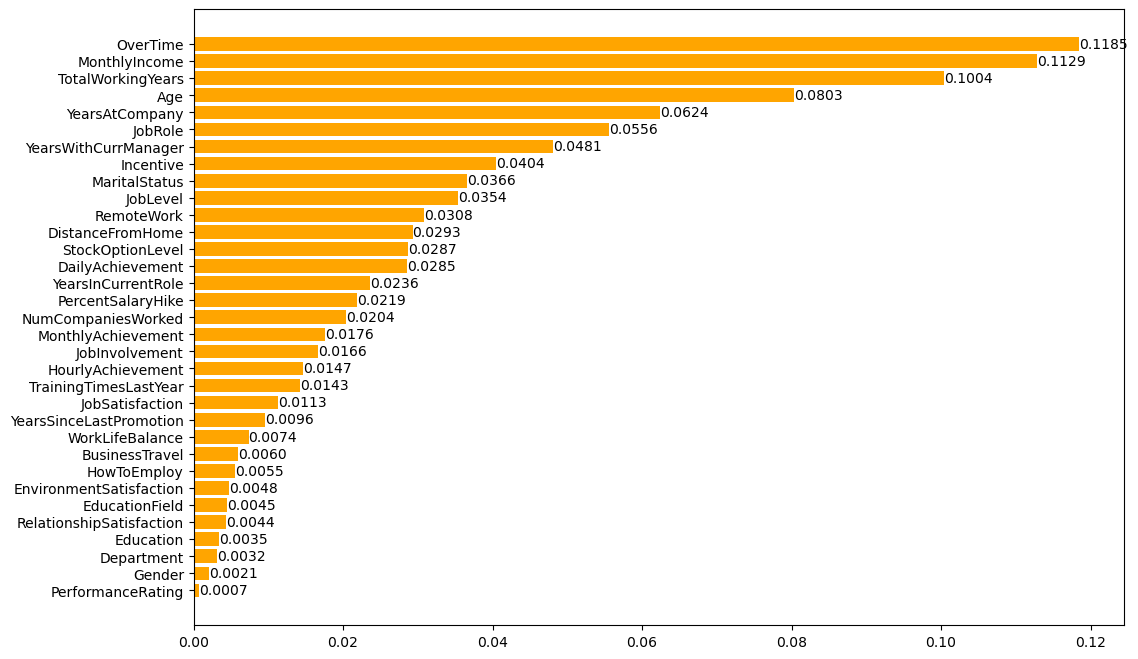

In [165]:
import matplotlib.pyplot as plt

labels = df3.columns
importances = model.feature_importances_

# 重要度の高い順にインデックスをソート
top_indices= importances.argsort()[::1]
#top_indices = sorted_indices[:10]

plt.figure(figsize=(12, 8))
bars = plt.barh(y=range(len(top_indices)), width=importances[top_indices], color = 'orange')
plt.yticks(ticks=range(len(top_indices)), labels=labels[top_indices])

# 各棒の上に値を表示する
for i, v in enumerate(importances[top_indices]):
    plt.text(v, i, f"{v:.4f}", va='center')

plt.show()


In [223]:
df2.head()

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                          0                                 0   
1                          0                                 0   
2                          0                                 0   
3                          0                                 0   
4                          0                                 0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                             1                           0   
1                             1                           0   
2                             1                           0   
3                             1                           0   
4                             1                           0   

   Department_Research & Development  Department_Sales  \
0                                  1                 0   
1                                  1                 0   
2                                  0                 1   
3                                  1                 0   
4                                  1                 0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                               0                             0   
1                               0                             1   
2                               0                             0   
3                               0                             0   
4                               0                             1   

   EducationField_Marketing  EducationField_Medical  ...  NumCompaniesWorked  \
0                         0                       1  ...                   1   
1                         0                       0  ...                   1   
2                         1                       0  ...                   1   
3                         0                       1  ...                   1   
4                         0                       0  ...                   2   

   PercentSalaryHike  TotalWorkingYears  TrainingTimesLastYear  \
0                  5                  2                      2   
1                  5                  5                      2   
2                  5                  6                      1   
3                  5                  5                      2   
4                  5                  5                      5   

   YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0               2                   2                        2   
1               5                   3                        0   
2               6                   4                        0   
3               5                   2                        0   
4               0                   0                        0   

   YearsWithCurrManager  Incentive  Attrition  
0                     1          0          0  
1                     3          0          0  
2                     3          0          1  
3                     2          0          0  
4                     0          0          1  

[5 rows x 94 columns]

In [224]:
df3.head()

BusinessTravel  Department  EducationField  Gender  JobRole  MaritalStatus  \
0               0           0               0       0        0              0   
1               0           0               1       0        0              1   
2               0           1               2       0        1              2   
3               0           0               0       0        0              0   
4               0           0               1       0        2              2   

   OverTime  HowToEmploy  Education  EnvironmentSatisfaction  ...  \
0         0            0          0                        0  ...   
1         0            0          1                        1  ...   
2         1            1          2                        2  ...   
3         0            2          2                        2  ...   
4         0            2          3                        1  ...   

   NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                   1                  5                  2   
1                   1                  5                  5   
2                   1                  5                  6   
3                   1                  5                  5   
4                   2                  5                  5   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                      2               2                   2   
1                      2               5                   3   
2                      1               6                   4   
3                      2               5                   2   
4                      5               0                   0   

   YearsSinceLastPromotion  YearsWithCurrManager  Incentive  Attrition  
0                        2                     1          0          0  
1                        0                     3          0          0  
2                        0                     3          0          1  
3                        0                     2          0          0  
4                        0                     0          0          1  

[5 rows x 34 columns]

In [222]:
import matplotlib.pyplot as plt

labels = df2.columns
importances = model2.feature_importances_

# 重要度の高い順にインデックスをソート
top_indices= importances.argsort()[::1]
#top_indices = sorted_indices[:10]

plt.figure(figsize=(12, 8))
bars = plt.barh(y=range(len(top_indices)), width=importances[top_indices], color = 'orange')
plt.yticks(ticks=range(len(top_indices)), labels=labels[top_indices])

# 各棒の上に値を表示する
for i, v in enumerate(importances[top_indices]):
    plt.text(v, i, f"{v:.4f}", va='center')

plt.show()


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

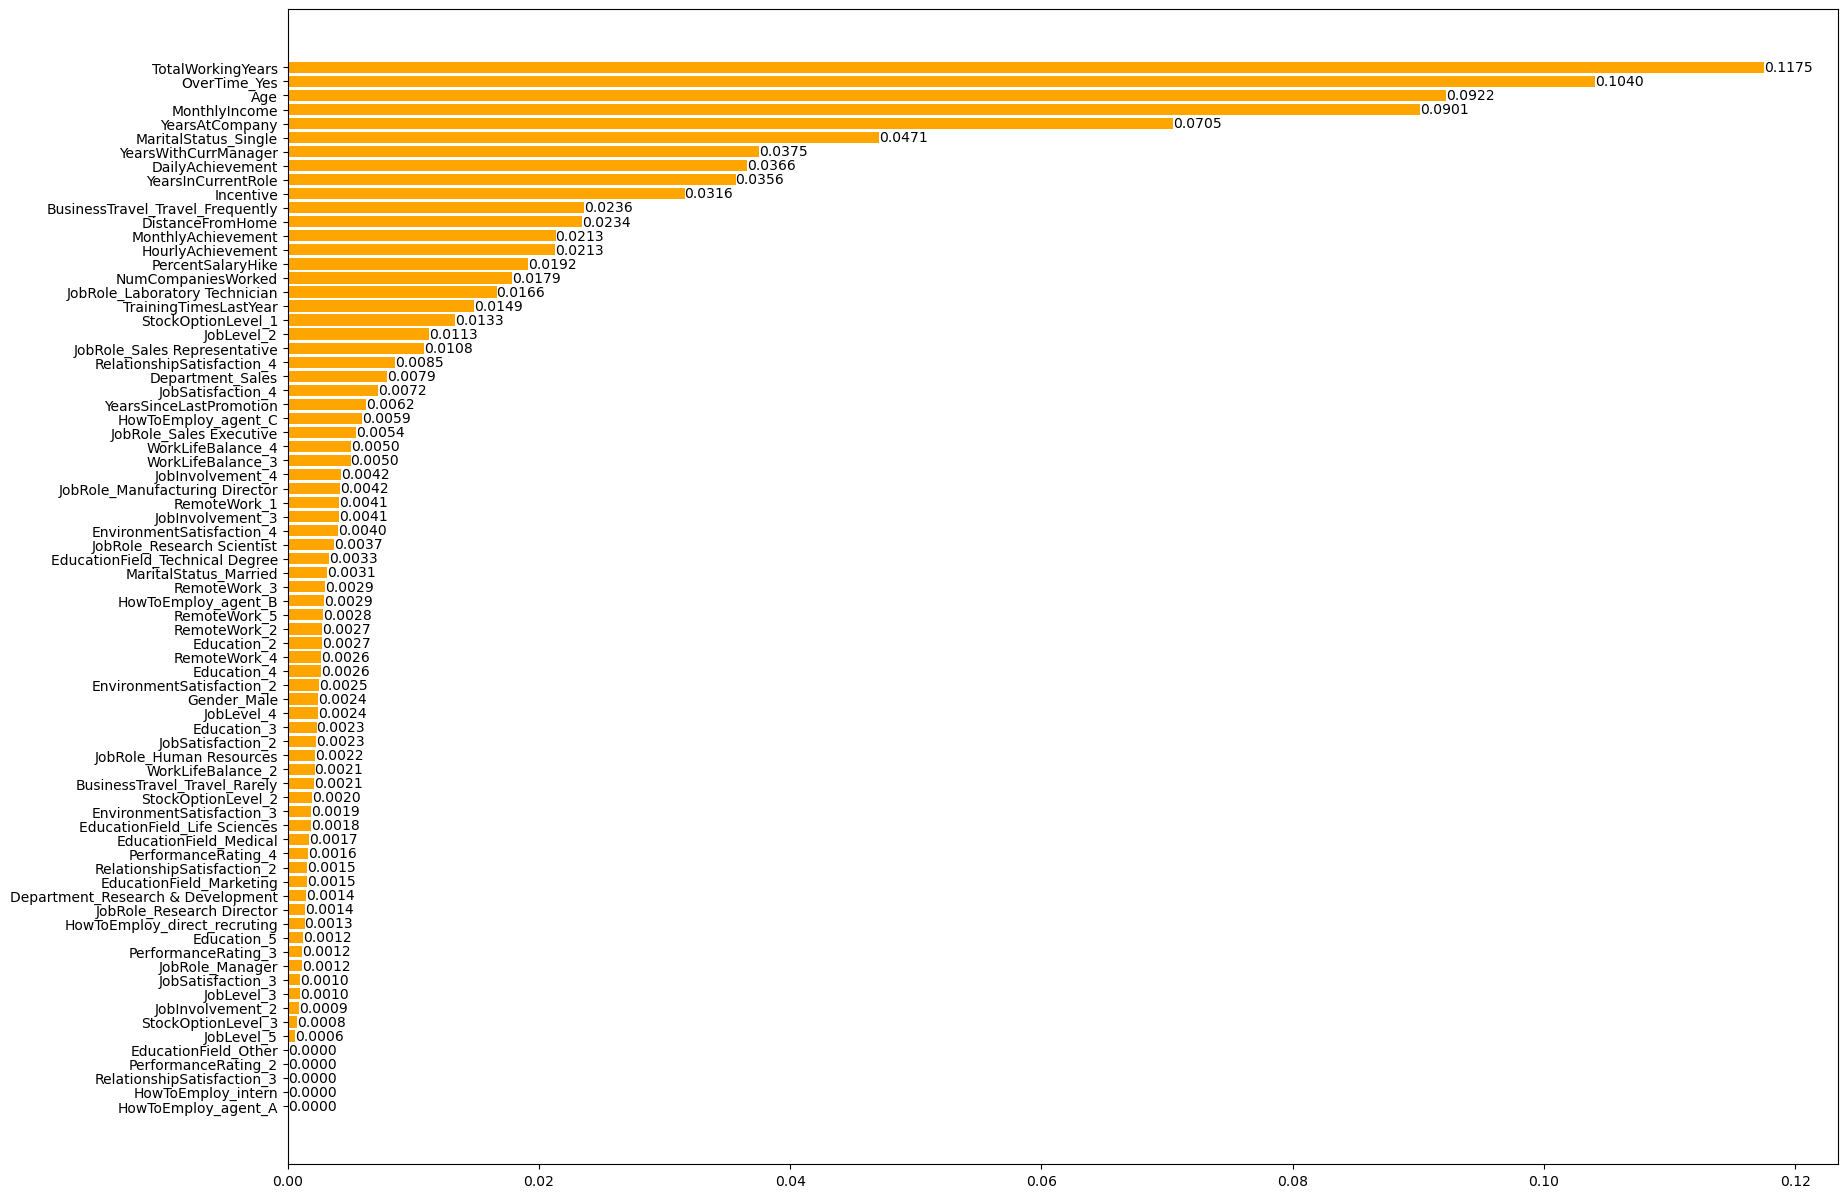

In [346]:
import matplotlib.pyplot as plt

labels = df2.columns
importances = model.feature_importances_

# 重要度の高い順にインデックスをソート
top_indices= importances.argsort()[::1]
#top_indices = sorted_indices[:10]

plt.figure(figsize=(20, 15))
bars = plt.barh(y=range(len(top_indices)), width=importances[top_indices], color = 'orange')
plt.yticks(ticks=range(len(top_indices)), labels=labels[top_indices])

# 各棒の上に値を表示する
for i, v in enumerate(importances[top_indices]):
    plt.text(v, i, f"{v:.4f}", va='center')

plt.show()

In [232]:
top_indices[:10]

array([18, 51,  6,  3, 17, 50, 15, 19, 38, 30])

In [233]:
importances[top_indices]

array([0.00011989, 0.00019396, 0.00039673, 0.00042416, 0.00082296,
       0.00085969, 0.0009443 , 0.00105404, 0.00111216, 0.00115256])

In [242]:
try1 = importances.argsort()[::-1]
print(try1)
try1[:10]

[82 78 86 27 26 88 79 47 83 89 92 80 64 81 91 90 25 85 84 87 72  1 39 43
 16 65 52  4 68 22  5 63 11 24 71  2 48 73 69 45 13 60 12 58 23  9 74  7
 70 57 44 31 35 61 37 40 21 55 20 75 42 28 54  8 62  0 41 77 59 56 33 10
 29 76 66 34 36 46 32 67 53 49 14 30 38 19 15 50 17  3  6 51 18]


array([82, 78, 86, 27, 26, 88, 79, 47, 83, 89])

In [245]:
importances[try1[:10]]

array([0.07527338, 0.06779643, 0.05309175, 0.04746776, 0.04737641,
       0.04133728, 0.03300293, 0.02896397, 0.02862867, 0.02836817])

In [246]:
importances.argsort()

array([18, 51,  6,  3, 17, 50, 15, 19, 38, 30, 14, 49, 53, 67, 32, 46, 36,
       34, 66, 76, 29, 10, 33, 56, 59, 77, 41,  0, 62,  8, 54, 28, 42, 75,
       20, 55, 21, 40, 37, 61, 35, 31, 44, 57, 70,  7, 74,  9, 23, 58, 12,
       60, 13, 45, 69, 73, 48,  2, 71, 24, 11, 63,  5, 22, 68,  4, 52, 65,
       16, 43, 39,  1, 72, 87, 84, 85, 25, 90, 91, 81, 64, 80, 92, 89, 83,
       47, 79, 88, 26, 27, 86, 78, 82])

In [247]:
importances

array([0.00287992, 0.01490246, 0.0057017 , 0.00042416, 0.00804793,
       0.00707496, 0.00039673, 0.00421609, 0.00330748, 0.00436617,
       0.00222429, 0.00601825, 0.00479706, 0.00492022, 0.00118196,
       0.0009443 , 0.0104276 , 0.00082296, 0.00011989, 0.00105404,
       0.00376379, 0.00381455, 0.00717723, 0.00450901, 0.00594505,
       0.02119028, 0.04737641, 0.04746776, 0.00341555, 0.00220594,
       0.00115256, 0.0038996 , 0.00158788, 0.00238399, 0.00197058,
       0.00385663, 0.00183241, 0.0038281 , 0.00111216, 0.01426648,
       0.00381587, 0.00265427, 0.00345492, 0.01266638, 0.00390952,
       0.00502988, 0.00160181, 0.02896397, 0.0052461 , 0.00142707,
       0.00085969, 0.00019396, 0.00854365, 0.00146227, 0.00335559,
       0.00380135, 0.00239107, 0.00395597, 0.00464431, 0.00255545,
       0.00491256, 0.00384135, 0.00330129, 0.00629238, 0.02784316,
       0.00944328, 0.00216368, 0.00152843, 0.00762572, 0.00507189,
       0.00417709, 0.00593888, 0.01532297, 0.00520871, 0.00432

[68 20 60 64 70 19 73 61 71 74  0 62 65 63 67 66 11 69 49 36 17 48  3 42
 72 23 16 54 53 35 13 55 34 32 15  8 18 57 22 59 56 26 58 28 30  9 38 27
 40 10 52  1 50 31  4  6 45 46  5  2 14 24 29 44 12 41 37 33 51 39  7 43
 47 25 21]
[74 71 61 73 19 70 64 60 20 68]


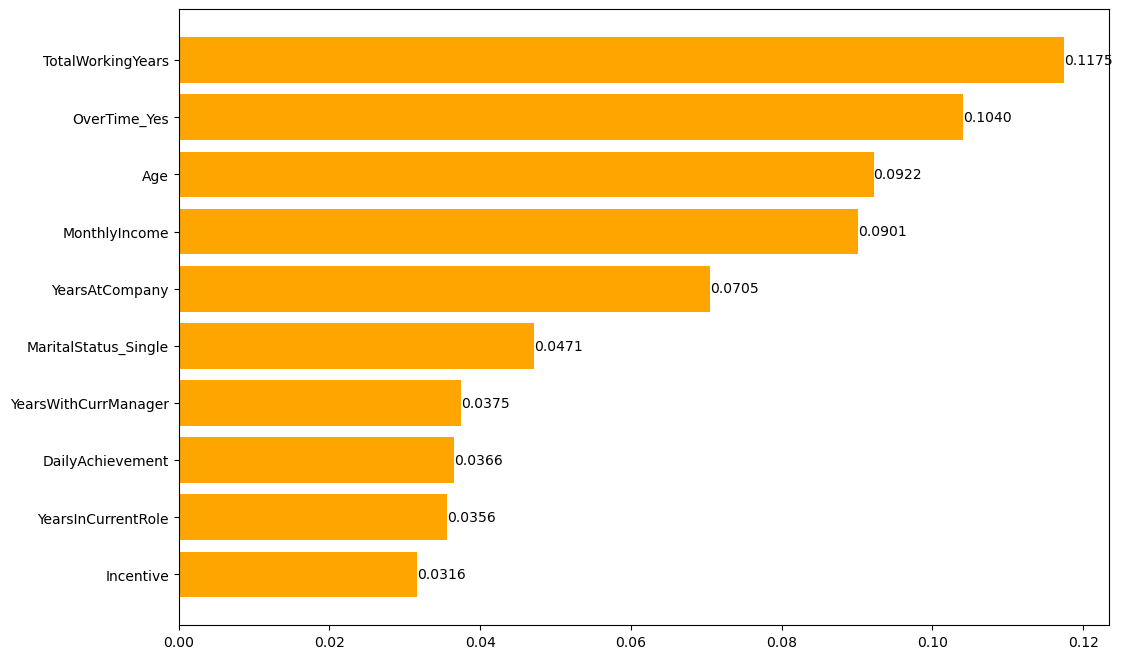

In [270]:
import matplotlib.pyplot as plt

labels = df2.columns
importances = model.feature_importances_

# 重要度の高い順にインデックスをソート
top_indices= importances.argsort()[::-1]
print(top_indices)
top_indices = top_indices[:10][::-1]

print(top_indices)
plt.figure(figsize=(12, 8))

bars = plt.barh(y=range(len(top_indices)), width=importances[top_indices], color = 'orange')
plt.yticks(ticks=range(len(top_indices)), labels=labels[top_indices])

# 各棒の上に値を表示する
#top_indices1 = np.argsort(importances)[::-1]
#top_indices1 = top_indices1[:10]
for i, v in enumerate(importances[top_indices]):
    plt.text(v, i, f"{v:.4f}", va='center')

plt.show()


In [211]:
from sklearn.ensemble import RandomForestClassifier
def feature_evaluation(X_train,Y_train,f_labels):
    forest = RandomForestClassifier(n_estimators=100,
                                    random_state=0)
    forest.fit(X_train, Y_train)
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]

    for f in range(X_train.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 30, 
                                f_labels[indices[f]], 
                                importances[indices[f]]))

    plt.title('Feature Importance')
    plt.bar(range(X_train.shape[1]), 
            importances[indices],
            align='center')

    plt.xticks(range(X_train.shape[1]), 
               f_label[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.tight_layout()
    plt.show()

 1) MonthlyIncome                  0.057964
 2) Age                            0.052069
 3) TotalWorkingYears              0.042840
 4) DailyAchievement               0.038623
 5) YearsAtCompany                 0.036275
 6) MonthlyAchievement             0.035190
 7) HourlyAchievement              0.031244
 8) DistanceFromHome               0.029939
 9) OverTime_Yes                   0.029396
10) Incentive                      0.029316
11) YearsInCurrentRole             0.027397
12) OverTime_No                    0.026990
13) PercentSalaryHike              0.026409
14) NumCompaniesWorked             0.026115
15) YearsWithCurrManager           0.024246
16) YearsSinceLastPromotion        0.020335
17) TrainingTimesLastYear          0.018581
18) MaritalStatus_Single           0.017417
19) RemoteWork_0                   0.016361
20) JobLevel_1                     0.014708
21) EnvironmentSatisfaction_1      0.014379
22) StockOptionLevel_0             0.014122
23) JobInvolvement_1            

NameError: name 'f_label' is not defined

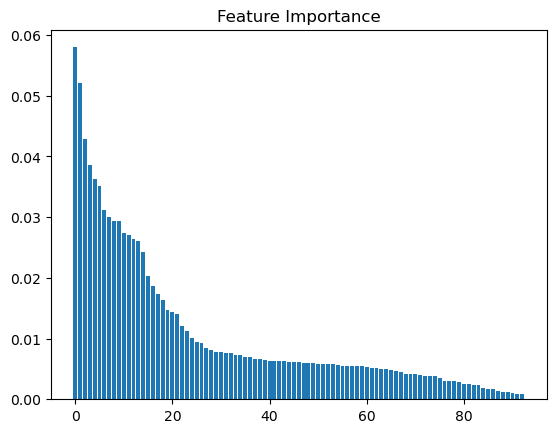

In [212]:
feature_evaluation(X_train, y_train, labels)

In [198]:
importances[top_indices]

array([0.00069522, 0.00208785, 0.00317841, 0.00346047, 0.00438424,
       0.00451153, 0.00478524, 0.00553964, 0.00598774, 0.00736092])

In [200]:
importances[top_indices]

array([0.00069522, 0.00208785, 0.00317841, 0.00346047, 0.00438424,
       0.00451153, 0.00478524, 0.00553964, 0.00598774, 0.00736092,
       0.00960612, 0.01133826, 0.01428952, 0.01468081, 0.01660404,
       0.01764184, 0.02035509, 0.02192784, 0.02356043, 0.02854412,
       0.02872901, 0.02929853, 0.03077772, 0.03537248, 0.03663286,
       0.04044726, 0.04808439, 0.05557313, 0.06244625, 0.08033866,
       0.1003587 , 0.11290367, 0.11849801])

In [201]:
top_indices1 = np.argsort(importances)[::-1]
importances[top_indices1]

array([0.11849801, 0.11290367, 0.1003587 , 0.08033866, 0.06244625,
       0.05557313, 0.04808439, 0.04044726, 0.03663286, 0.03537248,
       0.03077772, 0.02929853, 0.02872901, 0.02854412, 0.02356043,
       0.02192784, 0.02035509, 0.01764184, 0.01660404, 0.01468081,
       0.01428952, 0.01133826, 0.00960612, 0.00736092, 0.00598774,
       0.00553964, 0.00478524, 0.00451153, 0.00438424, 0.00346047,
       0.00317841, 0.00208785, 0.00069522])

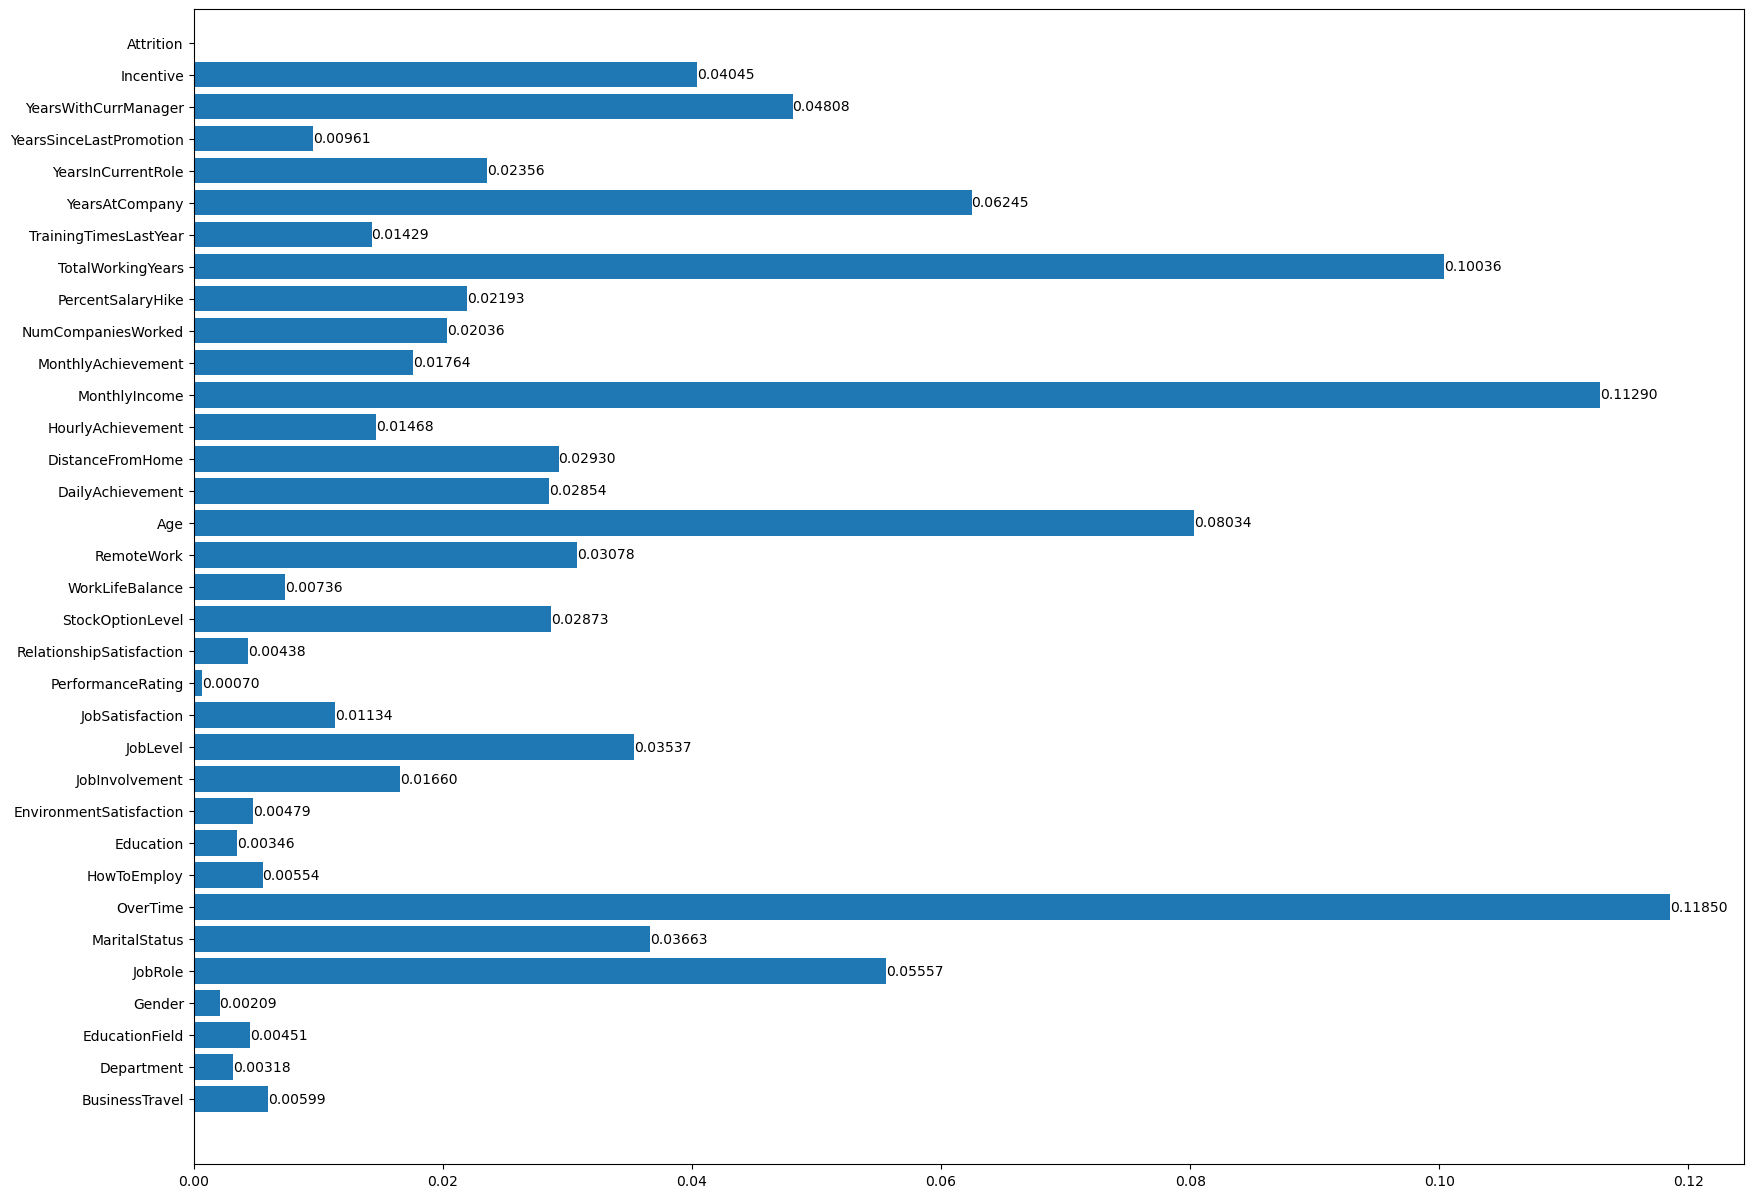

In [196]:
import matplotlib.pyplot as plt

labels = df3.columns
importances = model.feature_importances_

top_indices= importances.argsort()[::1]


plt.figure(figsize=(20, 15))
bars = plt.barh(y=range(len(importances)), width=importances)
plt.yticks(ticks=range(len(labels)), labels=labels)

# 各棒の上に値を表示する
for i, v in enumerate(importances):
    plt.text(v, i, f"{v:.5f}", va='center')

plt.show()

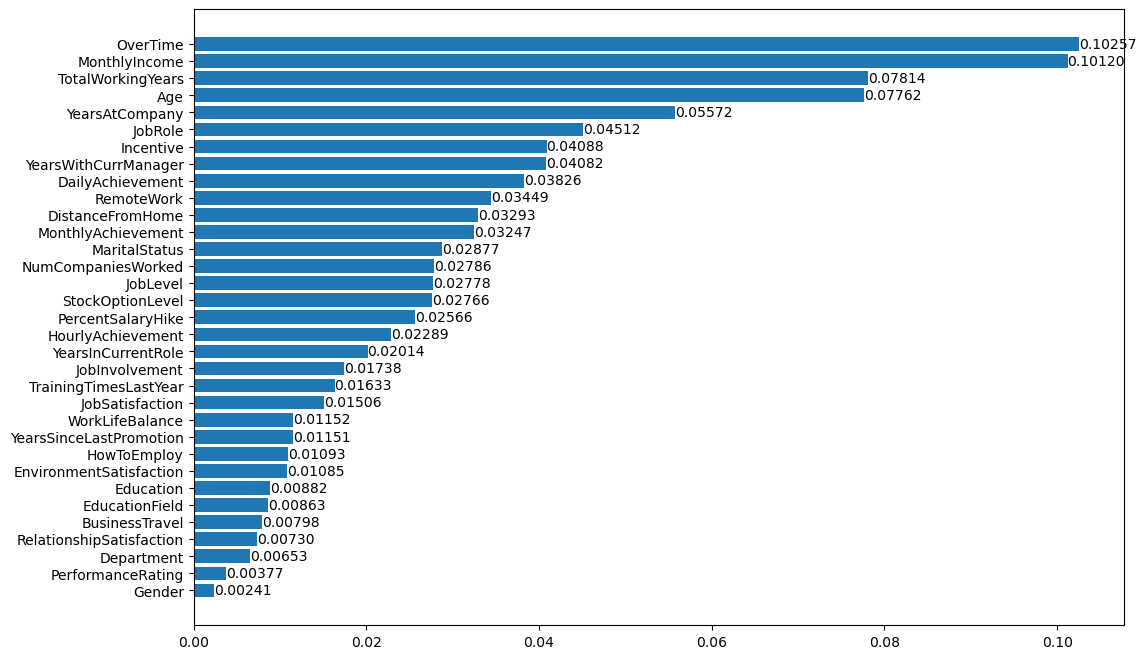

In [146]:
import matplotlib.pyplot as plt

labels = df3.columns
importances = model.feature_importances_

# 重要度の高い順にインデックスをソート
sorted_indices = importances.argsort()[::1]
sorted_labels = labels[sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(12, 8))
bars = plt.barh(y=range(len(sorted_labels)), width=sorted_importances)
plt.yticks(ticks=range(len(sorted_labels)), labels=sorted_labels)

# 各棒の上に値を表示する
for i, v in enumerate(sorted_importances):
    plt.text(v, i, f"{v:.5f}", va='center')

plt.show()


In [213]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

lr_train_pred = lr.predict_proba(X_train)[:, 1]
lr_valid_pred = lr.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lr_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lr_valid_pred)}")

Train Score: 0.7150246408577532
Valid Score: 0.7262657023220402


/Users/suxuanrong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [214]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X1_train, y1_train)

lr_train_pred = lr.predict_proba(X1_train)[:, 1]
lr_valid_pred = lr.predict_proba(X1_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y1_train, lr_train_pred)}")
print(f"Valid Score: {roc_auc_score(y1_valid, lr_valid_pred)}")

Train Score: 0.7118276117215094
Valid Score: 0.7235629996193376


/Users/suxuanrong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [215]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)

mlp_train_pred = mlp.predict_proba(X_train)[:, 1]
mlp_valid_pred = mlp.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, mlp_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, mlp_valid_pred)}")

Train Score: 0.7150735037484818
Valid Score: 0.694975256947088


In [216]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0)
mlp.fit(X1_train, y1_train)

mlp_train_pred = mlp.predict_proba(X1_train)[:, 1]
mlp_valid_pred = mlp.predict_proba(X1_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y1_train, mlp_train_pred)}")
print(f"Valid Score: {roc_auc_score(y1_valid, mlp_valid_pred)}")

Train Score: 0.6955632495218417
Valid Score: 0.7227636086791017


In [217]:
# XGBClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict_proba(X_train)[:, 1]
xgb_valid_pred = xgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, xgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, xgb_valid_pred)}")

Train Score: 1.0
Valid Score: 0.8159116863342215


In [218]:
# XGBClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0)
xgb.fit(X1_train, y1_train)

xgb_train_pred = xgb.predict_proba(X1_train)[:, 1]
xgb_valid_pred = xgb.predict_proba(X1_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y1_train, xgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y1_valid, xgb_valid_pred)}")

Train Score: 1.0
Valid Score: 0.8476969927674154


In [ ]:
# LGBMClassifier
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=0)
lgb.fit(X_train, y_train)

lgb_train_pred = lgb.predict_proba(X_train)[:, 1]
lgb_valid_pred = lgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lgb_valid_pred)}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb

model = lgb.LGBMClassifier()

param_dist = {
    'num_leaves': [20, 30, 40, 50],  # 葉の数の候補
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # 学習率の候補
    'n_estimators': [50, 100, 200],  # 決定木の数の候補
    'max_depth': [5, 10, 15],  # 決定木の深さの候補
    'min_child_samples': [10, 20, 30],  # 葉の最小サンプル数の候補
    'subsample': [0.8, 0.9, 1.0],  # サンプルの割合の候補
    'colsample_bytree': [0.8, 0.9, 1.0]  # 特徴量の割合の候補
}

# ランダムサーチを実行
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# 最適なハイパーパラメータを表示
print("Best hyperparameters:", random_search.best_params_)

In [ ]:
train_accuracy = random_search.score(X_train,y_train)
test_accuracy = random_search.score(X_valid,y_valid)
print("Test accuracy:", test_accuracy)
print("Train accuracy:", train_accuracy)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# データの読み込み（適宜データを用意してください）
data = df2

# 特徴量とターゲットを分割
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# トレーニングデータとバリデーションデータに分割（適宜データを用意してください）
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# ロジスティック回帰モデルを定義
lr = LogisticRegression(random_state=0)

# モデルの学習
lr.fit(X_train, y_train)

# 特徴量の重要度（係数）を取得
feature_importance = lr.coef_[0]

# 特徴量の名前を取得
feature_names = X.columns

# 特徴量の重要度をデータフレームにして表示
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# 特徴量の重要度をプロット
plt.figure(figsize=(20, 15))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# データの読み込み（適宜データを用意してください）
data = df3

# 特徴量とターゲットを分割
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# トレーニングデータとバリデーションデータに分割（適宜データを用意してください）
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# ロジスティック回帰モデルを定義
lr = LogisticRegression(random_state=0)

# モデルの学習
lr.fit(X_train, y_train)

# 特徴量の重要度（係数）を取得
feature_importance = lr.coef_[0]

# 特徴量の名前を取得
feature_names = X.columns

# 特徴量の重要度をデータフレームにして表示
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# 特徴量の重要度をプロット
plt.figure(figsize=(20, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

# データの読み込み（適宜データを用意してください）
data = df2

# 特徴量とターゲットを分割
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# トレーニングデータとバリデーションデータに分割（適宜データを用意してください）
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# LightGBMモデルを定義
lgb = LGBMClassifier(random_state=0)

# モデルの学習
lgb.fit(X_train, y_train)

# 特徴量の重要度を取得
feature_importance = lgb.feature_importances_

# 特徴量の名前を取得
feature_names = X.columns

# 特徴量の重要度をデータフレームにして表示
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# 特徴量の重要度をプロット
plt.figure(figsize=(20, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('LightGBM Feature Importance')
plt.show()



In [ ]:
import pandas as pd

# データの読み込み（適宜データを用意してください）
data = df3

# 特徴量名の重複をチェック
duplicated_features = data.columns[data.columns.duplicated()]
print(duplicated_features)

# 重複している特徴量を削除
data = data.loc[:, ~data.columns.duplicated()]

# モデルの学習など、以降の処理を行う


In [ ]:
df3.columns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

# データの読み込み（適宜データを用意してください）
data = df3

# 特徴量とターゲットを分割
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# トレーニングデータとバリデーションデータに分割（適宜データを用意してください）
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# LightGBMモデルを定義
lgb = LGBMClassifier(random_state=0)

# モデルの学習
lgb.fit(X_train, y_train)

# 特徴量の重要度を取得
feature_importance = lgb.feature_importances_

# 特徴量の名前を取得
feature_names = X.columns

# 特徴量の重要度をデータフレームにして表示
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# 特徴量の重要度をプロット
plt.figure(figsize=(20, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('LightGBM Feature Importance')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

# データの読み込み（適宜データを用意してください）
data = df2

# 特徴量とターゲットを分割
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# トレーニングデータとバリデーションデータに分割（適宜データを用意してください）
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# LightGBMモデルを定義
lgb = LGBMClassifier(random_state=0)

# モデルの学習
lgb.fit(X_train, y_train)

# 特徴量の重要度をプロット
plt.figure(figsize=(20, 15))
lgb.plot_importance(lgb, importance_type='gain', max_num_features=10, height=0.5, show_values=False)
plt.xlabel('Feature Importance (Gain)')
plt.title('LGBMClassifier Feature Importance')
plt.show()


### HR

In [ ]:
df_hr = df1[df1['JobRole']=='Human Resources']

In [ ]:
df_hr.shape

In [ ]:
df2.columns

In [ ]:
df2_hr = df2[df2['JobRole_Human Resources'] == 1]
df2_hr.shape

In [ ]:
df2_hr.columns

In [ ]:
df2_lt = df2[df2['JobRole_Laboratory Technician'] == 1]
df2_lt.shape

In [ ]:
df2_sr = df2[df2['JobRole_Sales Representative'] == 1]
df2_sr.shape

In [ ]:
X_hr = df2_hr.drop("Attrition", axis=1).values

In [ ]:
# 目的変数と説明変数に分割
X_hr = df2_hr.drop("Attrition", axis=1).values
y_hr = df2_hr["Attrition"].values
X_lt = df2_lt.drop("Attrition", axis=1).values
y_lt = df2_lt["Attrition"].values
X_sr = df2_sr.drop("Attrition", axis=1).values
y_sr = df2_sr["Attrition"].values


In [ ]:
# 標準化
#sc = StandardScaler()
#sc.fit(X)
#X_std = sc.transform(X)

# 訓練データと評価データに分割
X_hr_train, X_hr_valid, y_hr_train, y_hr_valid, X_lt_train, X_lt_valid, y_lt_train, y_lt_valid,X_sr_train, X_sr_valid, y_sr_train, y_sr_valid= train_test_split(X_hr, y_hr,
                                                          X_lt, y_lt,
                                                          X_sr, y_sr,
                                                          test_size=0.3,  random_state=0)

In [ ]:
X_sr_train, X_sr_valid = train_test_split(X_sr, y_sr,  
                                                          test_size=0.3,  random_state=0)

/Users/suxuanrong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27531 (\N{CJK UNIFIED IDEOGRAPH-6B8B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/suxuanrong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26989 (\N{CJK UNIFIED IDEOGRAPH-696D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/suxuanrong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/suxuanrong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/suxuanrong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38626 (\N{CJK

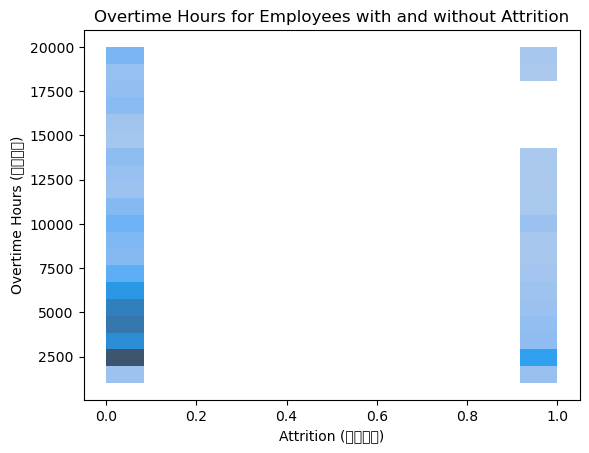

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# 仮想のデータを作成

# データフレームに変換

# Boxプロットを作成
sns.histplot(x='Attrition', y='MonthlyIncome', data=df3)

# グラフを表示
plt.xlabel('Attrition (離職有無)')
plt.ylabel('Overtime Hours (残業時間)')
plt.title('Overtime Hours for Employees with and without Attrition')
plt.show()


/Users/suxuanrong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0     True
1     True
2    False
3     True
4    False
Name: Attrition, dtype: bool

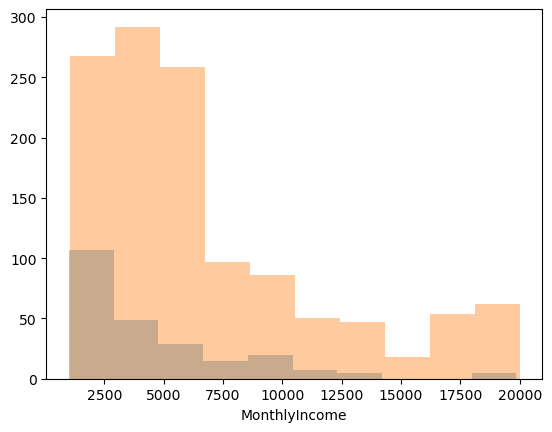

In [186]:
malelist_y = df3['Attrition'] == 1
malelist_n = df3['Attrition'] == 0

sns.distplot(df3[malelist_y]['MonthlyIncome'],bins = 10,kde=False, rug=False )

sns.distplot(df3[malelist_n]['MonthlyIncome'],bins = 10,kde=False, rug=False )


In [353]:
print(plt.rcParams['font.family'])


['IPAexGothic']


In [354]:
! pip install japanize-matplotlib


Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



In [359]:
import matplotlib.pyplot as plt

import japanize_matplotlib
import seaborn as sns


Text(0.5, 1.0, 'I社の月収分布')

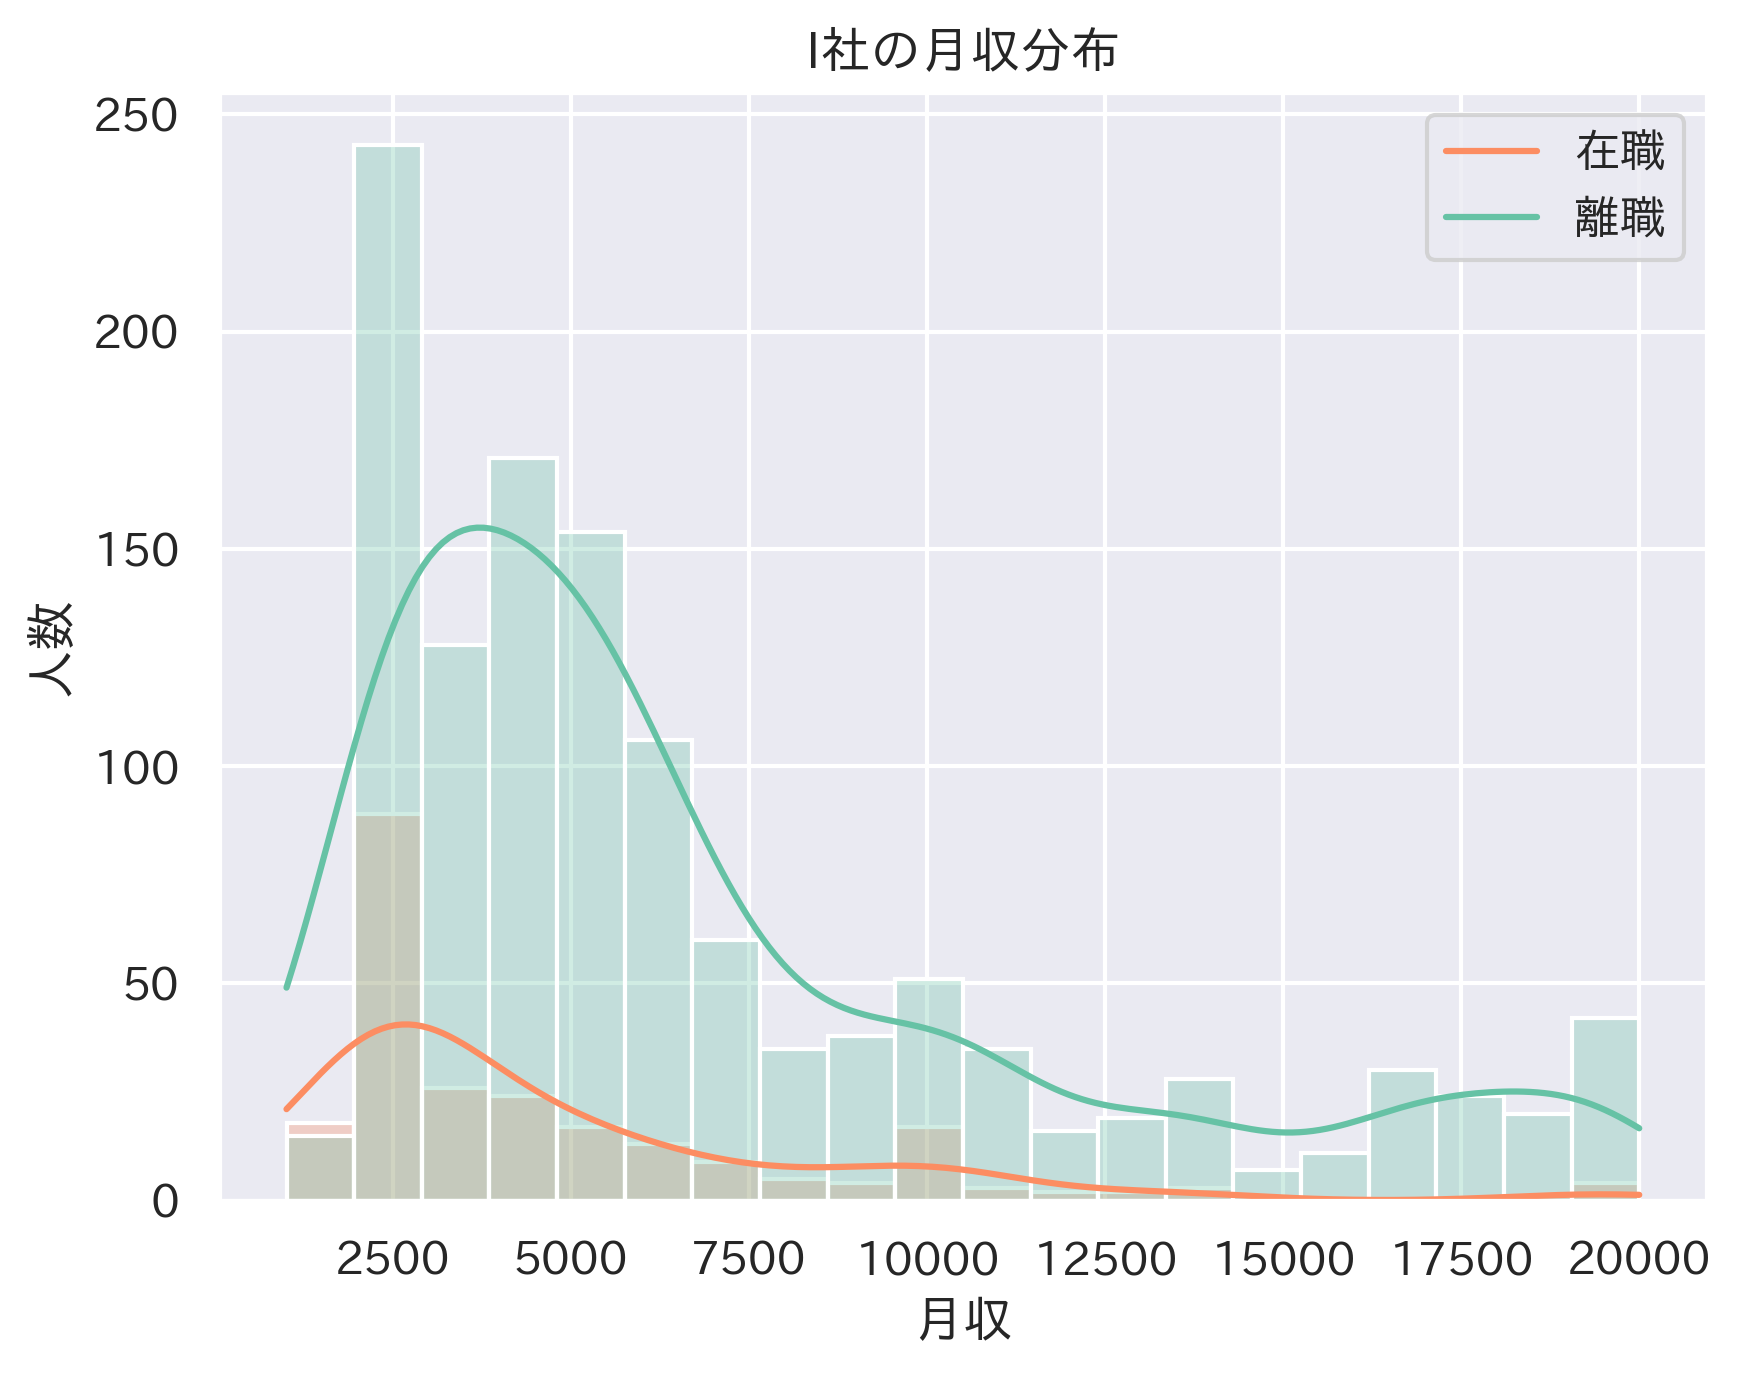

In [375]:

fig, ax = plt.subplots(1,1,dpi = 300)
ax = sns.histplot(
  data = df2,
  x = "MonthlyIncome",
  hue="Attrition",
  palette="Set2",
  alpha = 0.3,
    kde = True
)
ax.set_xlabel("月収")
ax.set_ylabel("人数")
ax.legend( ["在職","離職"])
ax.set_title("I社の月収分布")

Text(0.5, 1.0, 'I社の月収分布')

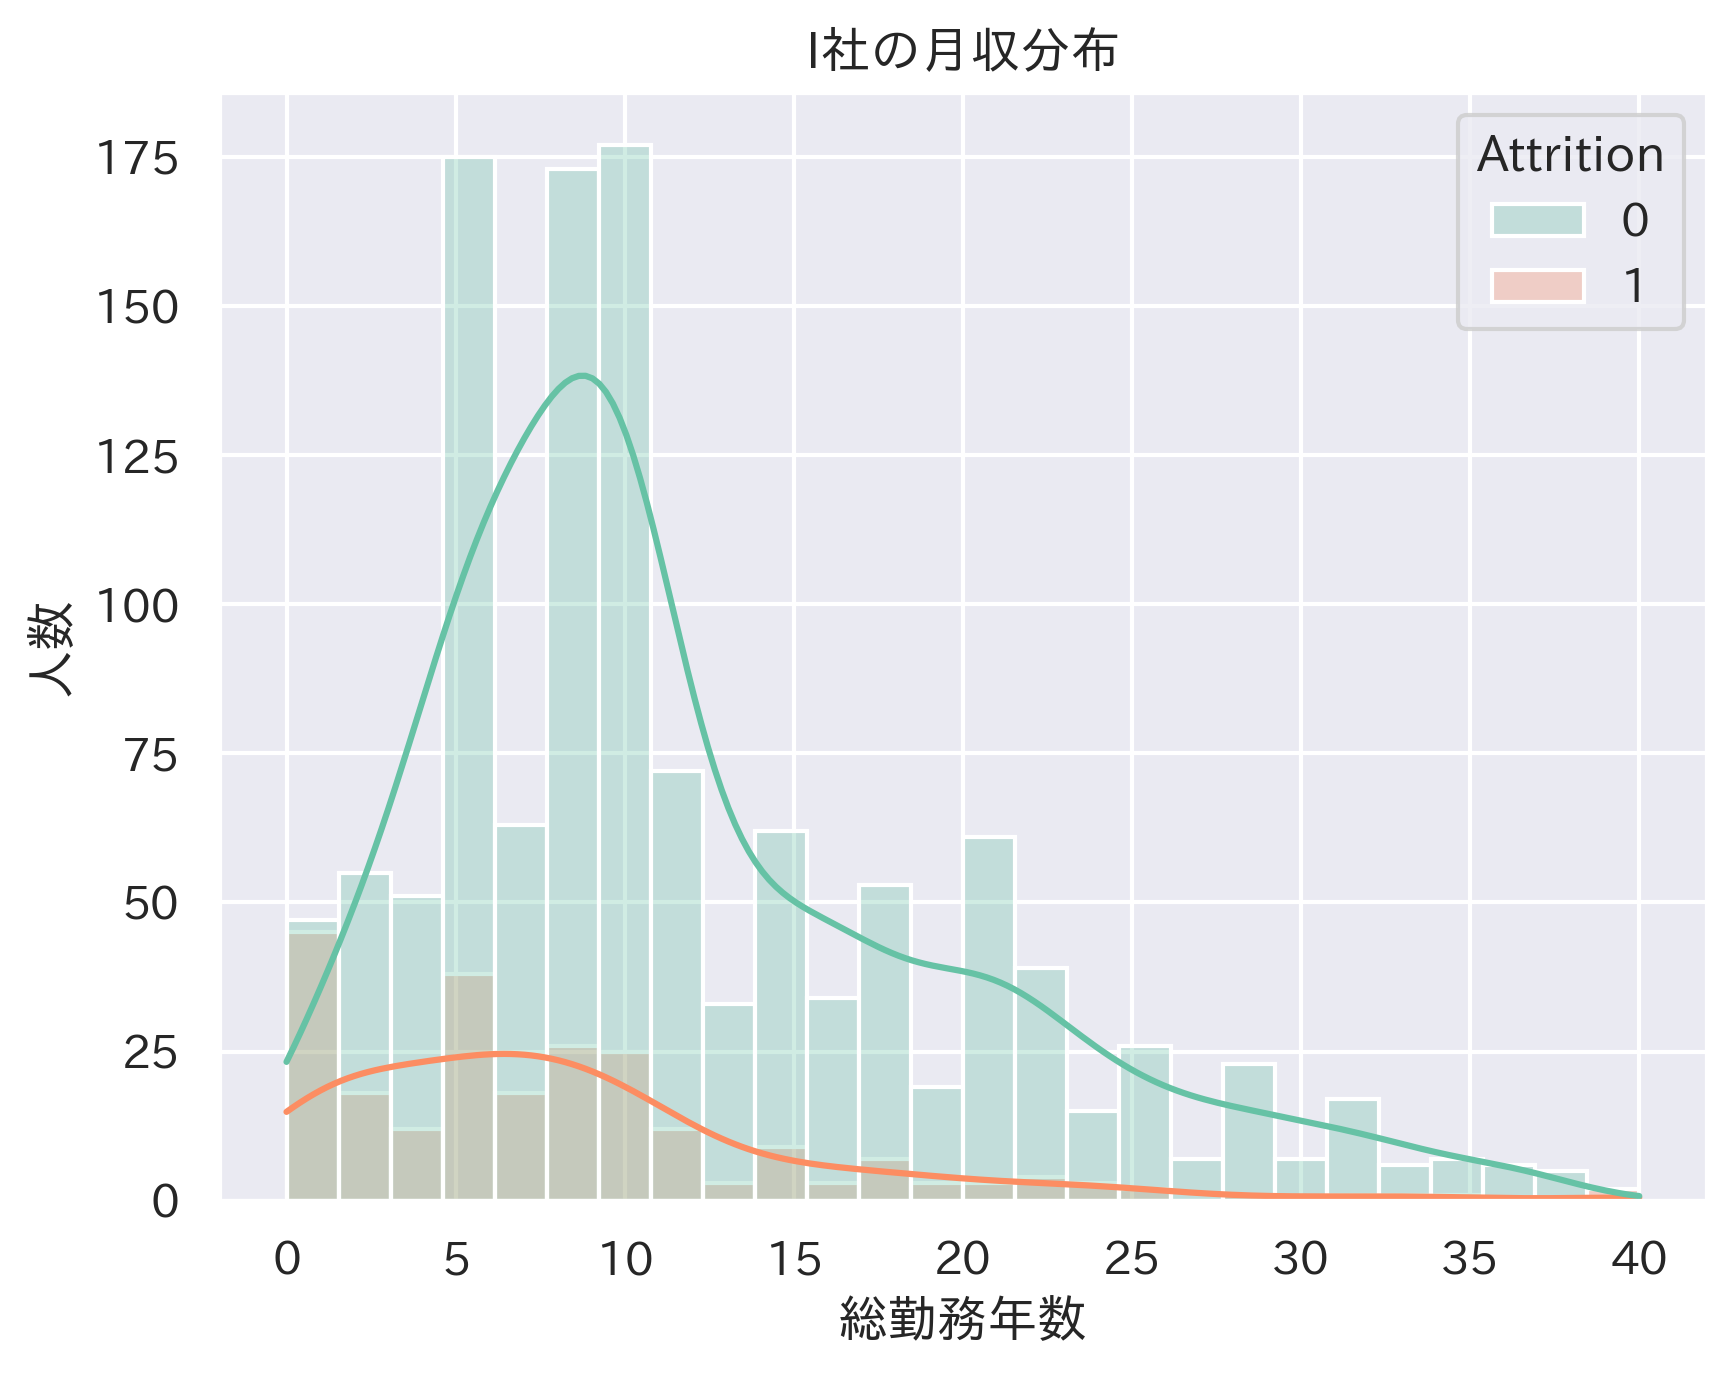

In [363]:
fig, ax = plt.subplots(1,1,dpi = 300)
ax = sns.histplot(
  data = df2,
  x = "TotalWorkingYears",
  hue="Attrition",
  palette="Set2",
  alpha = 0.3,
    kde = True
)
ax.set_xlabel("総勤務年数")
ax.set_ylabel("人数")
ax.set_title("I社の月収分布")

Text(0.5, 1.0, 'I社の残業有無分布')

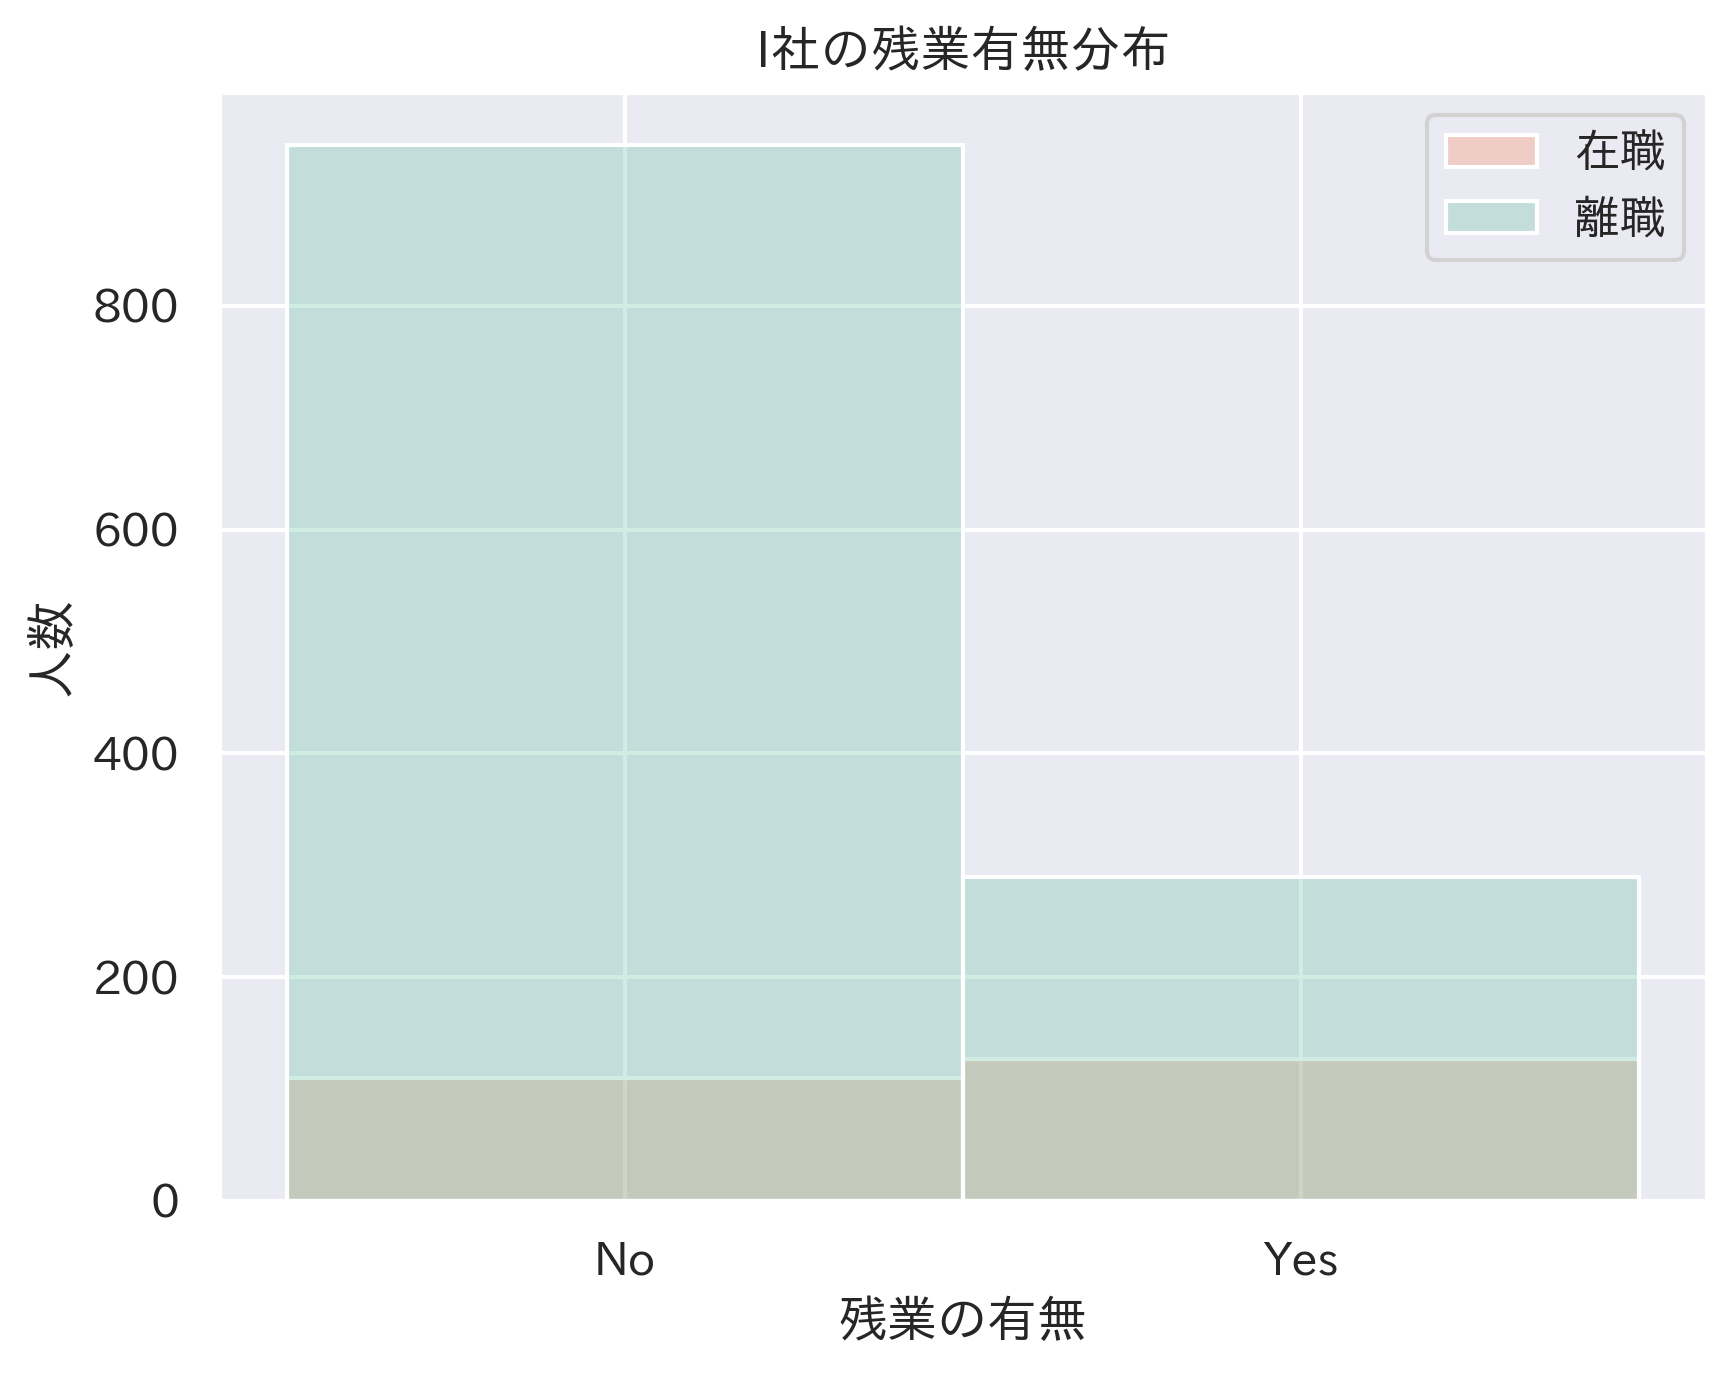

In [376]:
fig, ax = plt.subplots(1,1,dpi = 300)
ax = sns.histplot(
  data = df,
  x = "OverTime",
  hue="Attrition",
  palette="Set2",
  alpha = 0.3
)
ax.set_xlabel("残業の有無")
ax.set_ylabel("人数")
ax.legend( ["在職","離職"])
ax.set_title("I社の残業有無分布")

Text(0.5, 1.0, '職位レベルより月収の分布')

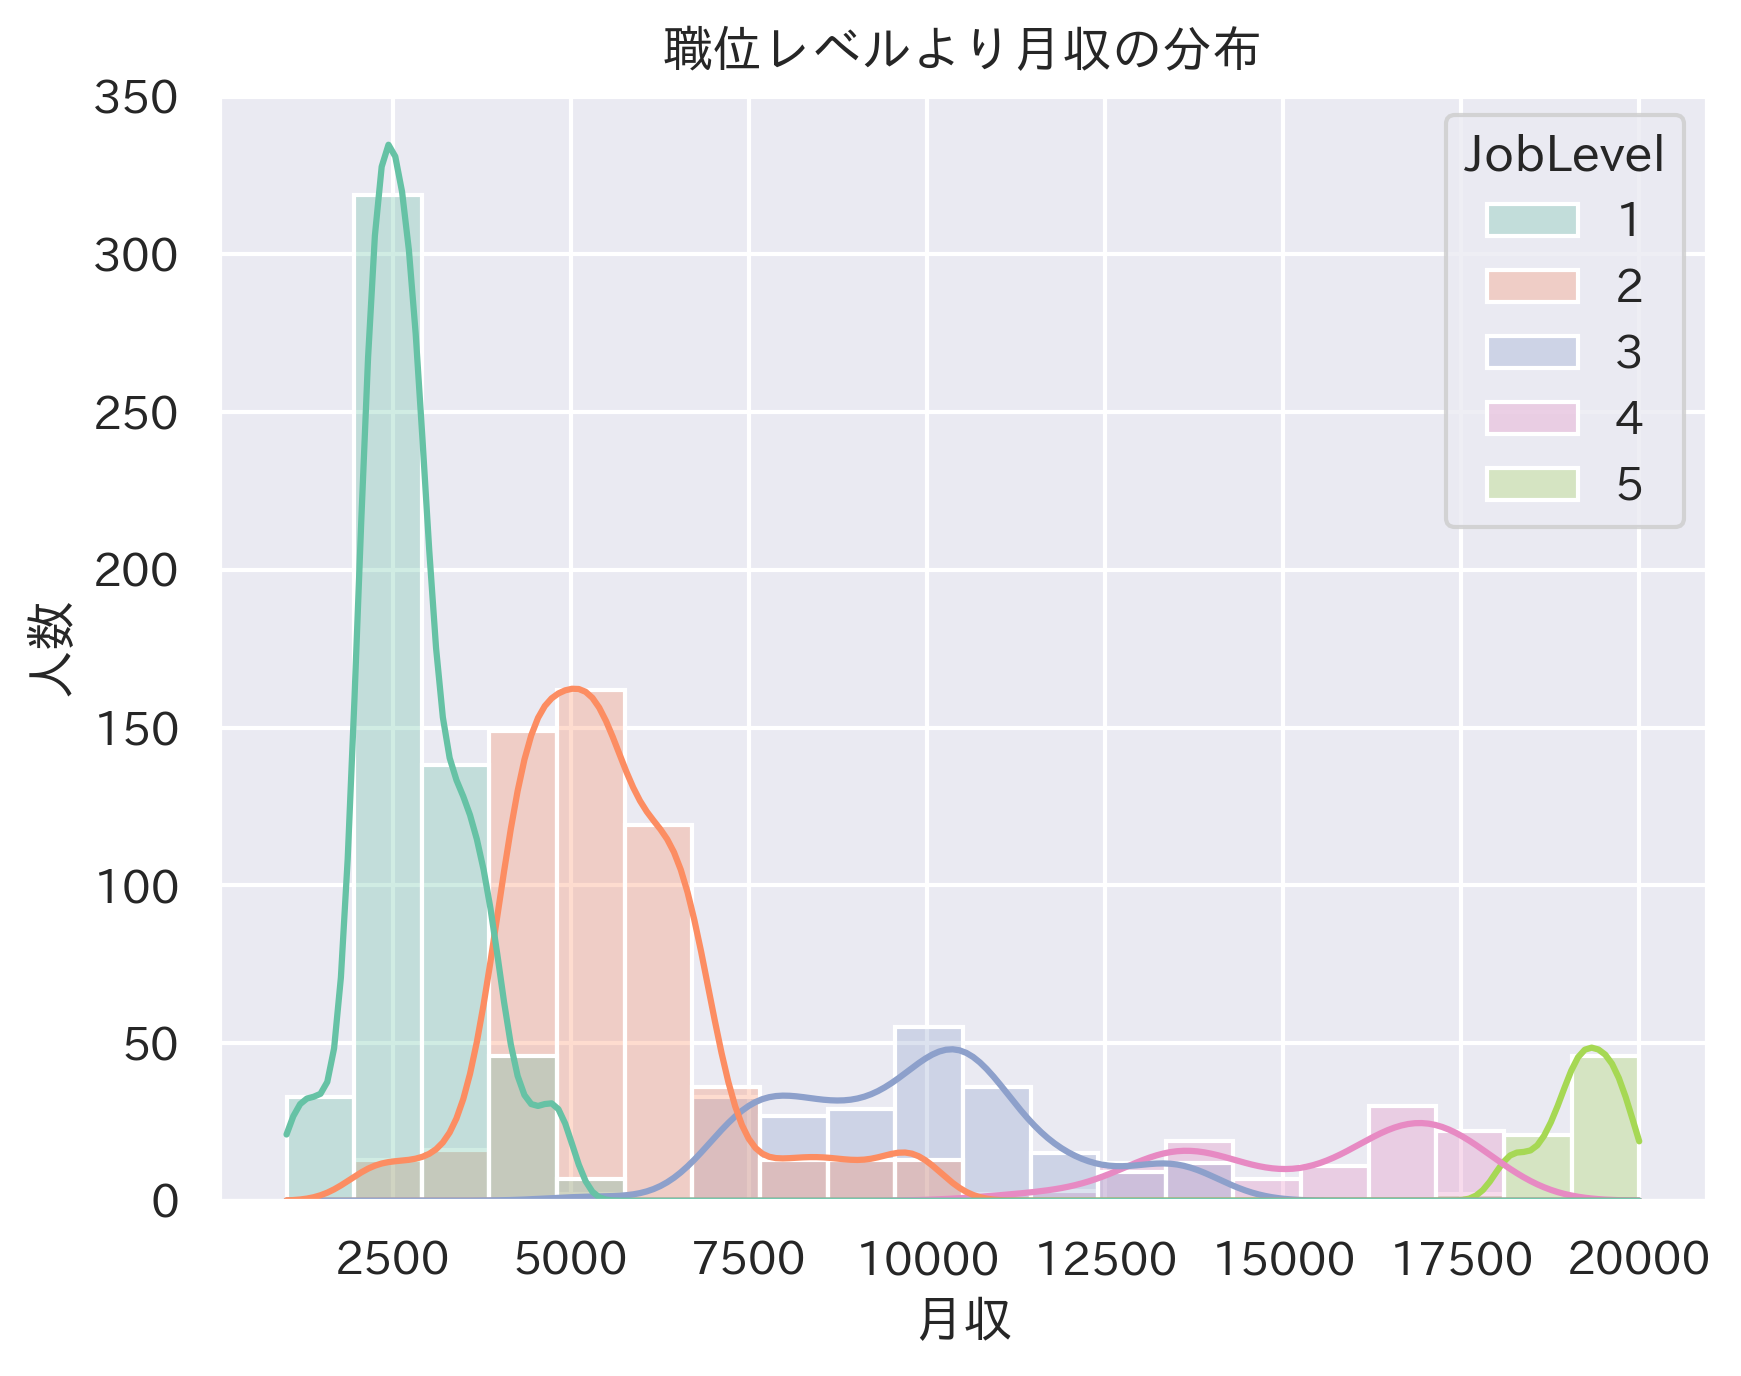

In [383]:
fig, ax = plt.subplots(1,1,dpi = 300)
ax = sns.histplot(
  data = df,
  x = "MonthlyIncome",
  hue="JobLevel",
  palette="Set2",
  alpha = 0.3,
    kde = True
)
ax.set_xlabel("月収")
ax.set_ylabel("人数")
#ax.legend( ["level1","level2",'level3'])
ax.set_title("職位レベルより月収の分布")

Text(0.5, 1.0, 'I社の月収とインセンティブの分布')

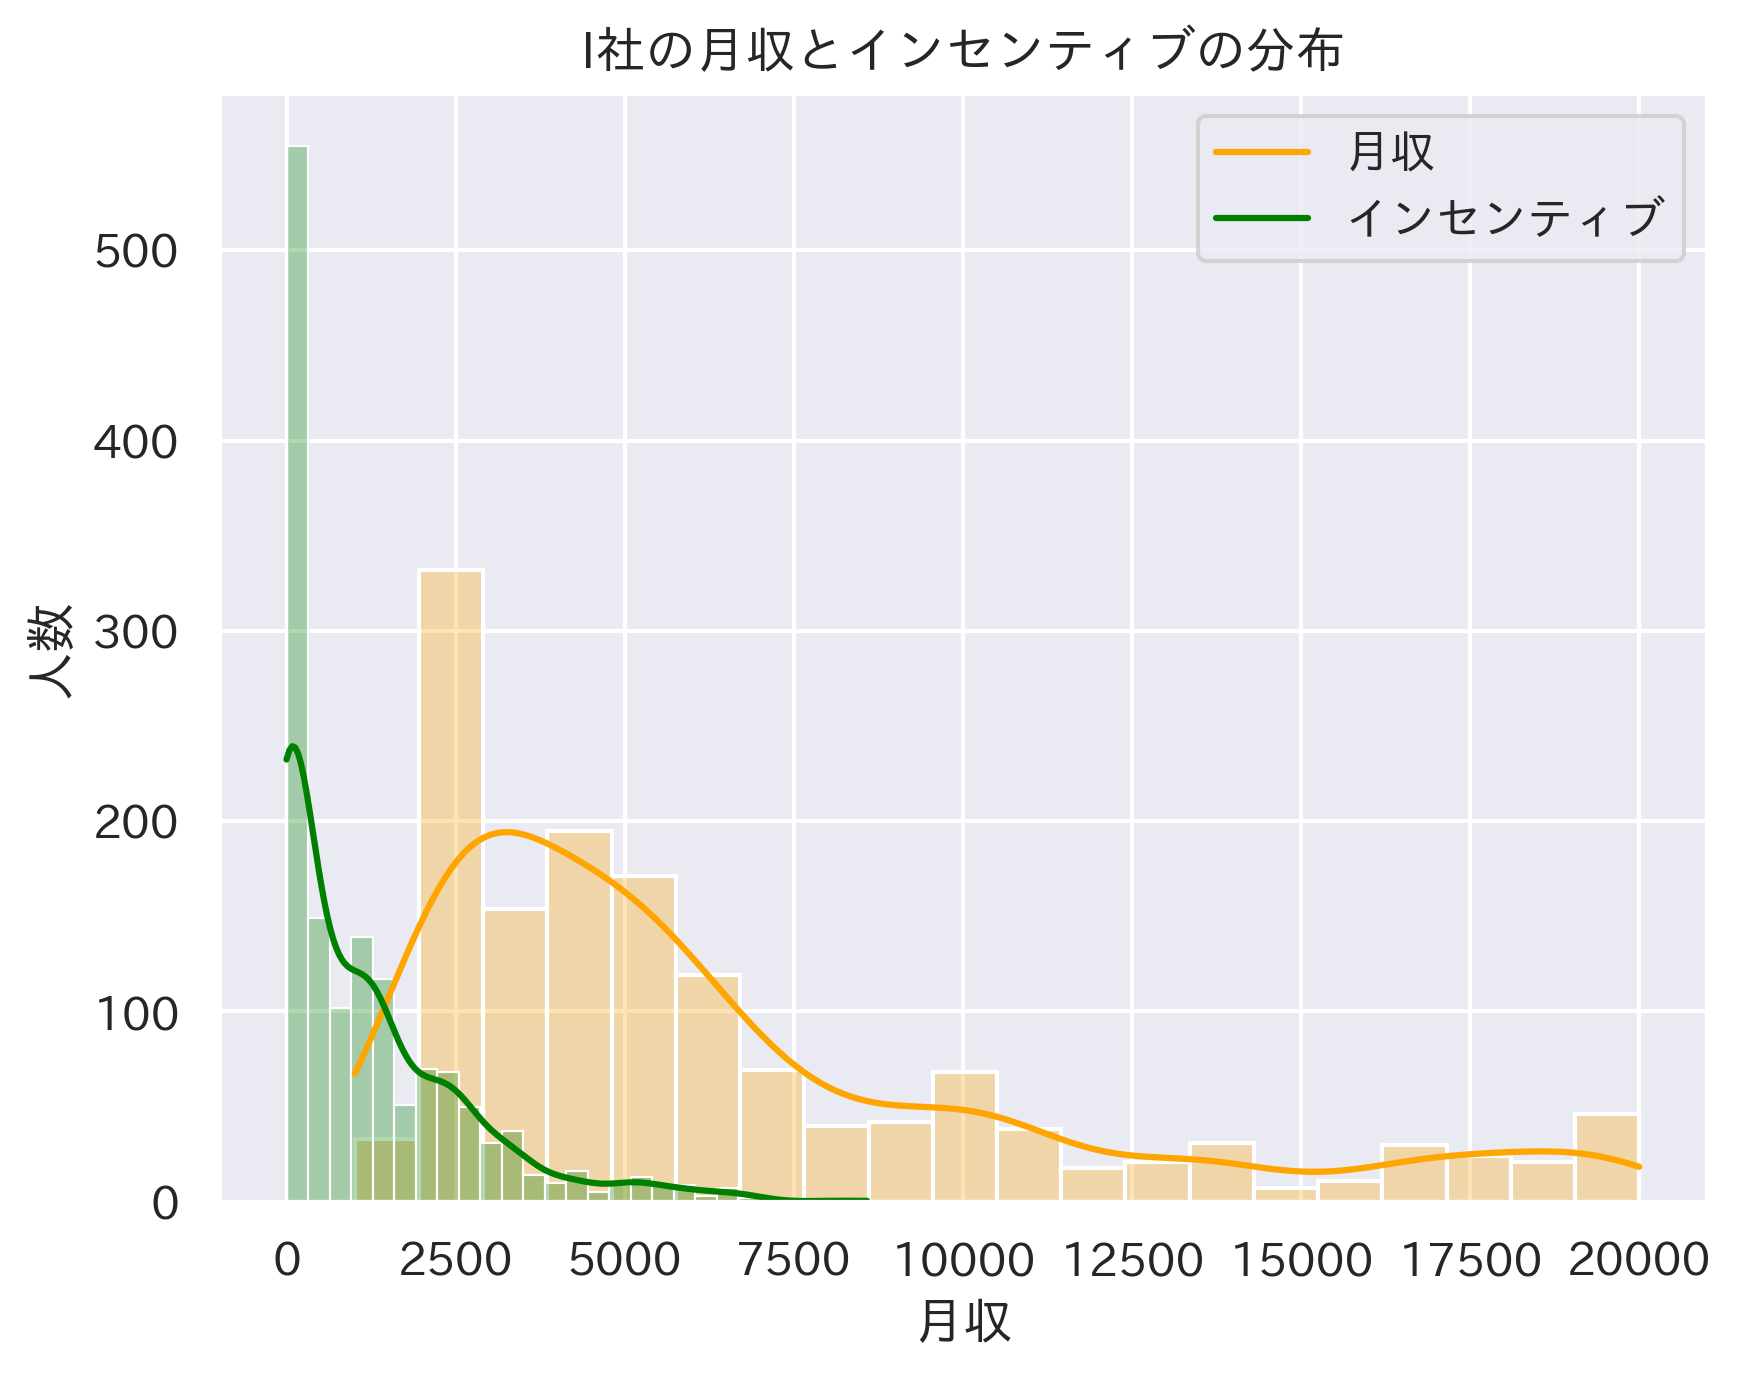

In [394]:
fig, ax = plt.subplots(1,1,dpi = 300)
ax1 = sns.histplot(
  data = df,
  x = "MonthlyIncome",
  color = 'orange',
  alpha = 0.3,
    kde = True
)
ax1.set_xlabel("月収")
ax1.set_ylabel("人数")
ax2 = sns.histplot(
  data = df,
  x = "Incentive",
  color = 'green',
  alpha = 0.3,
    kde = True
)


ax.legend( ["月収","インセンティブ"])
ax.set_title("I社の月収とインセンティブの分布")

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

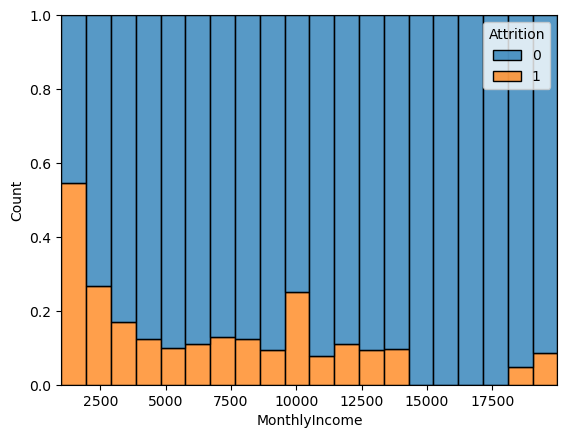

In [188]:
sns.histplot(df3, x='MonthlyIncome', hue='Attrition', multiple='fill') 


In [183]:
df3.head()

BusinessTravel  Department  EducationField  Gender  JobRole  MaritalStatus  \
0               0           0               0       0        0              0   
1               0           0               1       0        0              1   
2               0           1               2       0        1              2   
3               0           0               0       0        0              0   
4               0           0               1       0        2              2   

   OverTime  HowToEmploy  Education  EnvironmentSatisfaction  ...  \
0         0            0          0                        0  ...   
1         0            0          1                        1  ...   
2         1            1          2                        2  ...   
3         0            2          2                        2  ...   
4         0            2          3                        1  ...   

   NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                   1                  5                  2   
1                   1                  5                  5   
2                   1                  5                  6   
3                   1                  5                  5   
4                   2                  5                  5   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                      2               2                   2   
1                      2               5                   3   
2                      1               6                   4   
3                      2               5                   2   
4                      5               0                   0   

   YearsSinceLastPromotion  YearsWithCurrManager  Incentive  Attrition  
0                        2                     1          0          0  
1                        0                     3          0          0  
2                        0                     3          0          1  
3                        0                     2          0          0  
4                        0                     0          0          1  

[5 rows x 34 columns]

In [172]:
df3['OverTime']

0       0
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    1
Name: OverTime, Length: 1470, dtype: int64